In [44]:
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets

In [45]:
from utils import Logger

In [46]:
def mnist_data():
    compose = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((.5,), (.5,))
        ])
    out_dir = './dataset'
    return datasets.MNIST(root=out_dir, train=True, transform=compose, download=True)
# Load data
data = mnist_data()
# Create loader with data, so that we can iterate over it
data_loader = torch.utils.data.DataLoader(data, batch_size=100, shuffle=True)
# Num batches
num_batches = len(data_loader)

In [47]:
class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 784
        n_out = 1
        
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
discriminator = DiscriminatorNet()

In [48]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

In [49]:
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 784
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
generator = GeneratorNet()

In [50]:
def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(size, 100))
    return n

In [51]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

In [52]:
loss = nn.BCELoss()

In [53]:
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    return data

In [54]:
def train_discriminator(optimizer, real_data, fake_data):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, ones_target(N) )
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, zeros_target(N))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

In [55]:
def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, ones_target(N))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [56]:
num_test_samples = 16
test_noise = noise(num_test_samples)

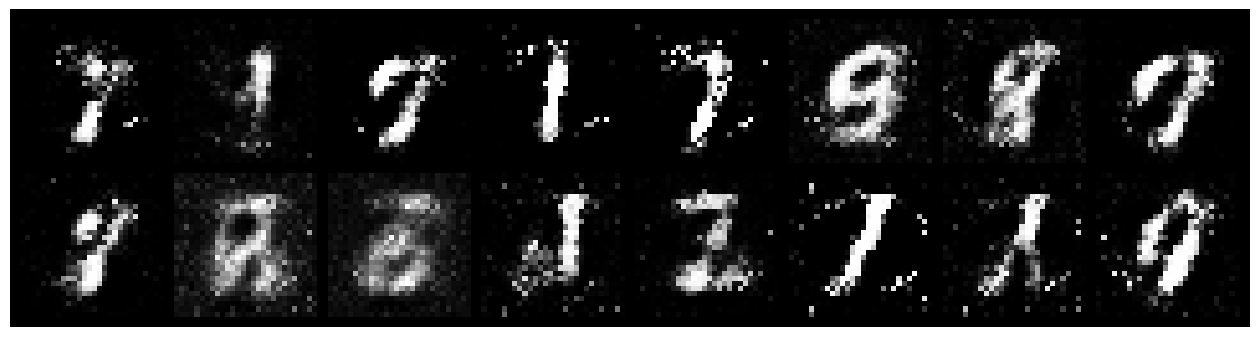

Epoch: [0/200], Batch Num: [599/600]
Discriminator Loss: 0.6671, Generator Loss: 2.5389
D(x): 0.7335, D(G(z)): 0.1952


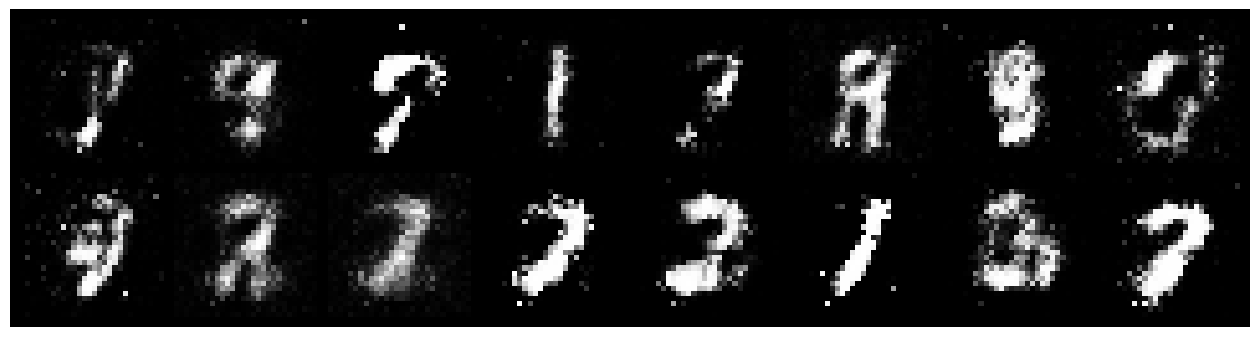

Epoch: [1/200], Batch Num: [599/600]
Discriminator Loss: 0.6666, Generator Loss: 1.8515
D(x): 0.8189, D(G(z)): 0.2546


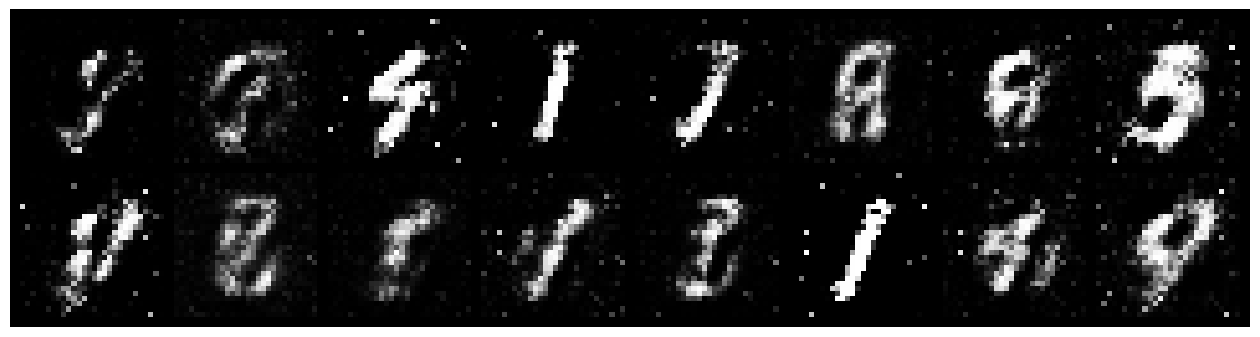

Epoch: [2/200], Batch Num: [599/600]
Discriminator Loss: 0.5239, Generator Loss: 2.5148
D(x): 0.8248, D(G(z)): 0.1910


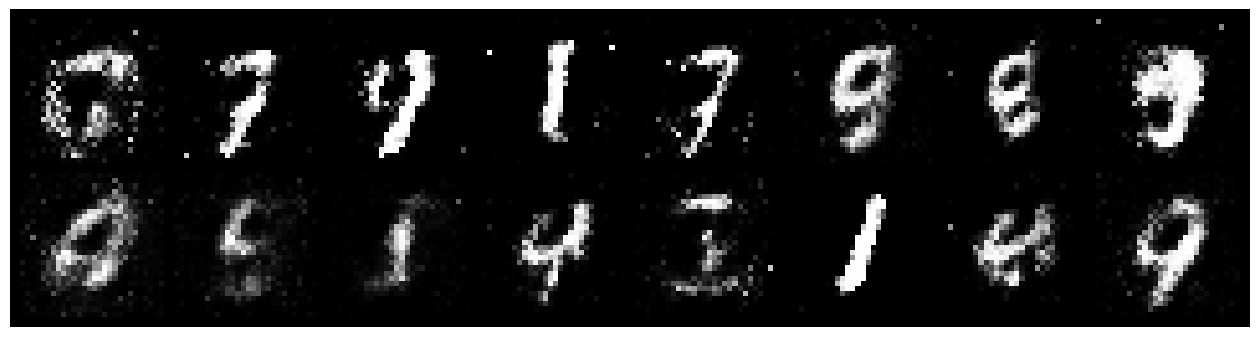

Epoch: [3/200], Batch Num: [599/600]
Discriminator Loss: 0.7888, Generator Loss: 1.6574
D(x): 0.7458, D(G(z)): 0.2505


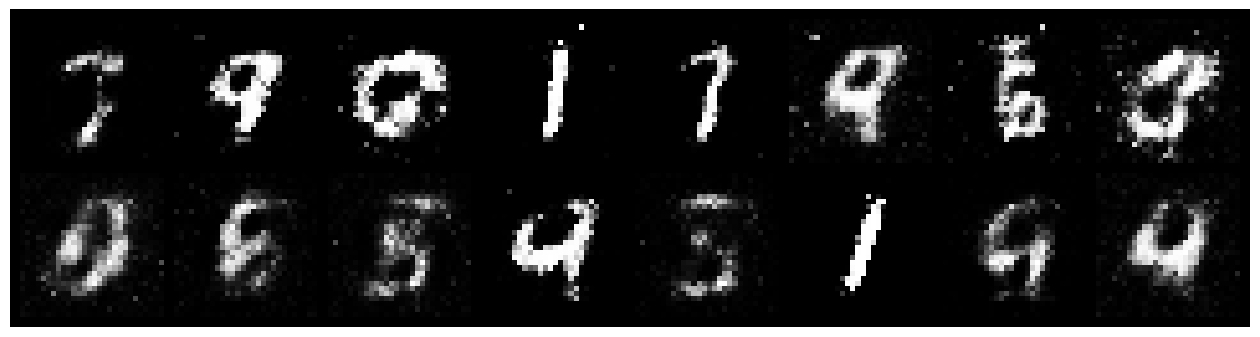

Epoch: [4/200], Batch Num: [599/600]
Discriminator Loss: 0.7026, Generator Loss: 1.9621
D(x): 0.7804, D(G(z)): 0.2498


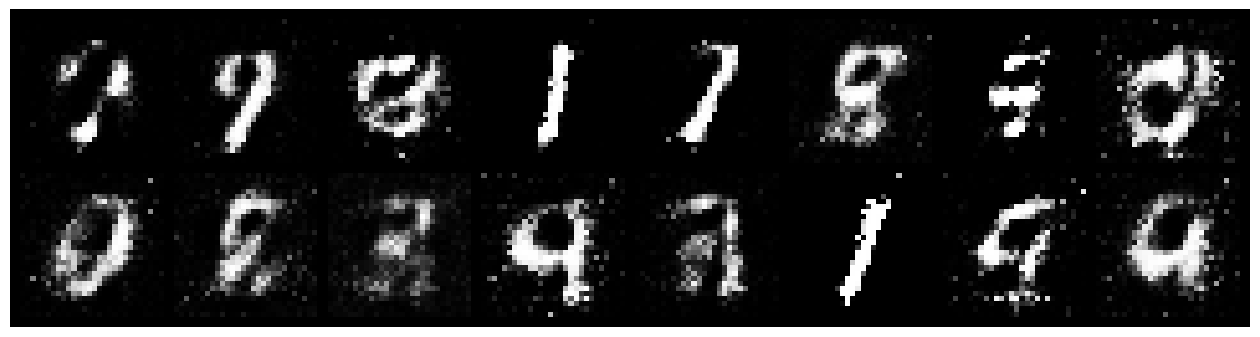

Epoch: [5/200], Batch Num: [599/600]
Discriminator Loss: 0.8229, Generator Loss: 1.4195
D(x): 0.6772, D(G(z)): 0.2360


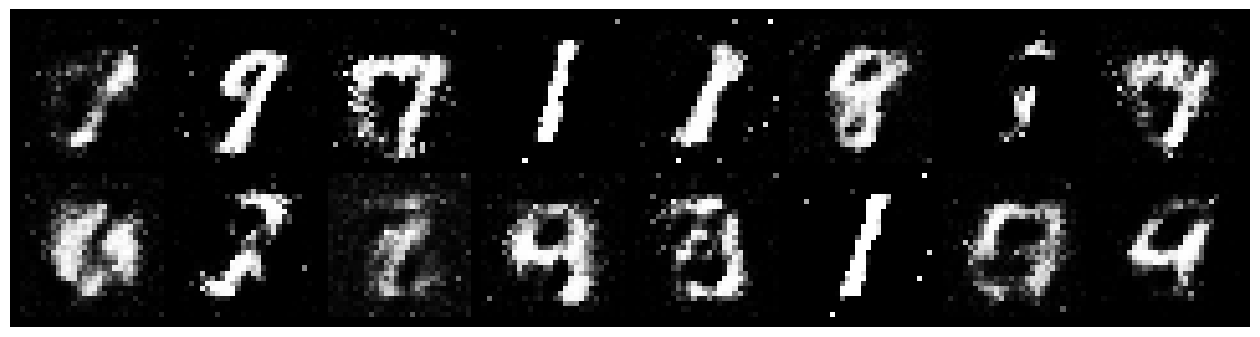

Epoch: [6/200], Batch Num: [599/600]
Discriminator Loss: 0.7426, Generator Loss: 1.5951
D(x): 0.7967, D(G(z)): 0.3079


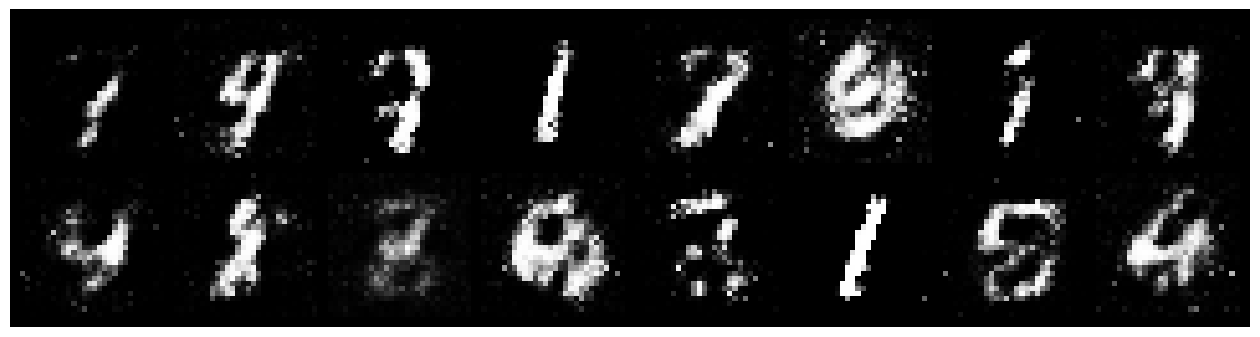

Epoch: [7/200], Batch Num: [599/600]
Discriminator Loss: 0.7978, Generator Loss: 1.7392
D(x): 0.7389, D(G(z)): 0.2573


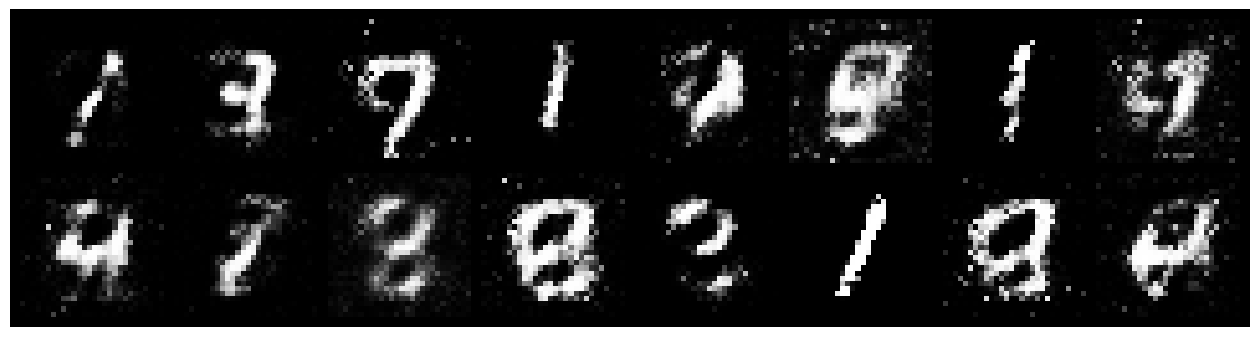

Epoch: [8/200], Batch Num: [599/600]
Discriminator Loss: 0.9953, Generator Loss: 1.4652
D(x): 0.6963, D(G(z)): 0.3117


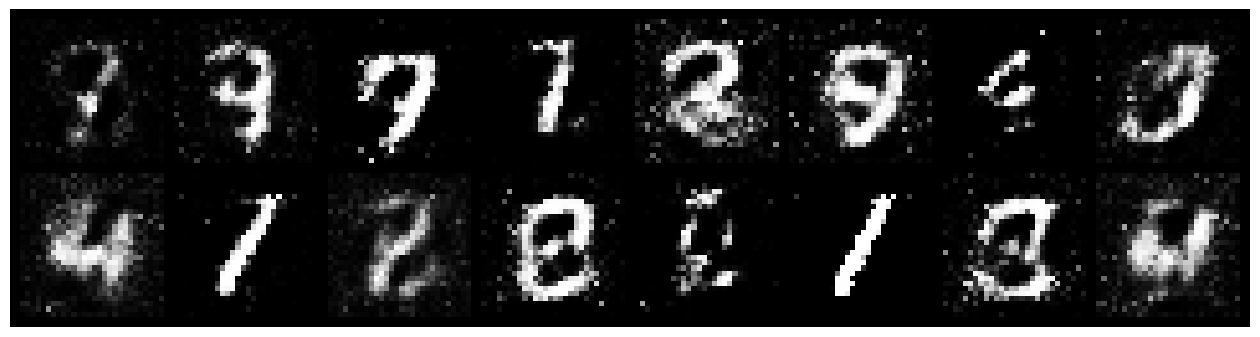

Epoch: [9/200], Batch Num: [599/600]
Discriminator Loss: 0.8801, Generator Loss: 1.9883
D(x): 0.6710, D(G(z)): 0.2219


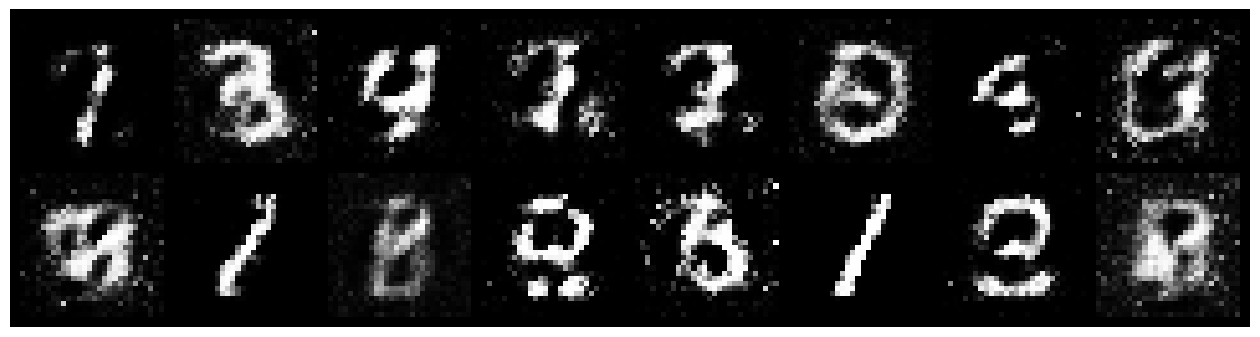

Epoch: [10/200], Batch Num: [599/600]
Discriminator Loss: 0.9077, Generator Loss: 2.1424
D(x): 0.7418, D(G(z)): 0.3164


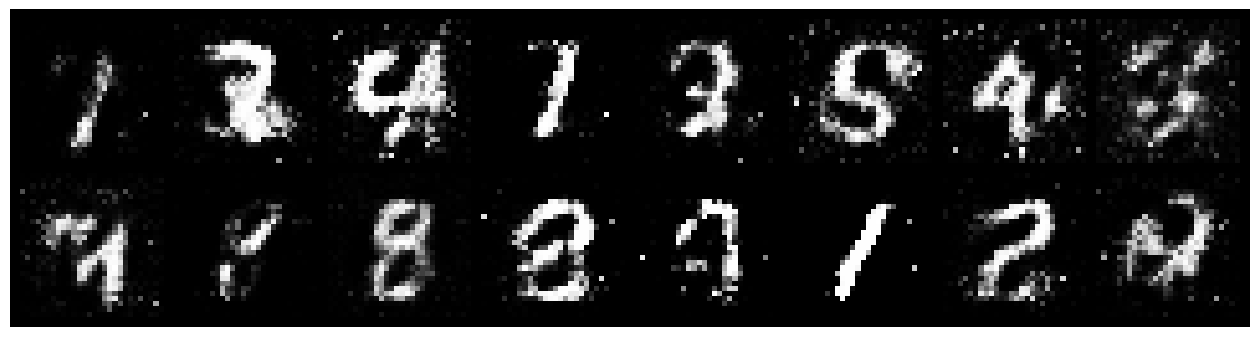

Epoch: [11/200], Batch Num: [599/600]
Discriminator Loss: 0.8052, Generator Loss: 1.7707
D(x): 0.7924, D(G(z)): 0.3472


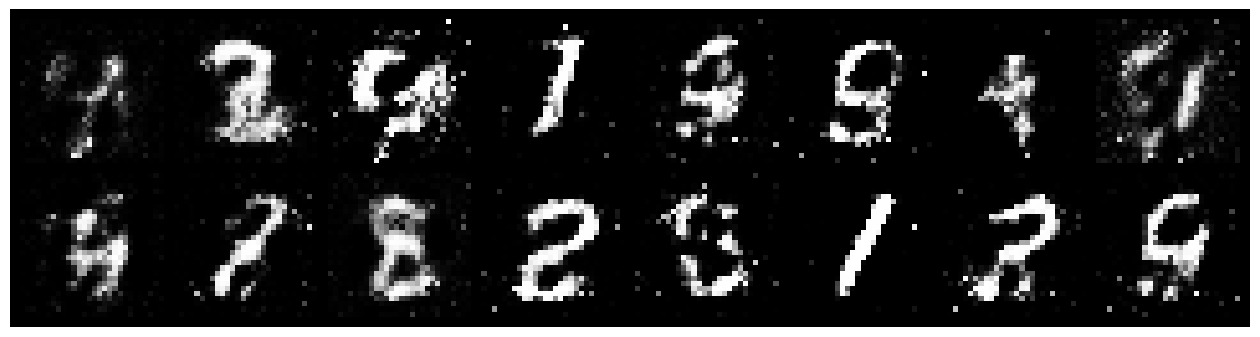

Epoch: [12/200], Batch Num: [599/600]
Discriminator Loss: 1.0782, Generator Loss: 1.1246
D(x): 0.6436, D(G(z)): 0.3987


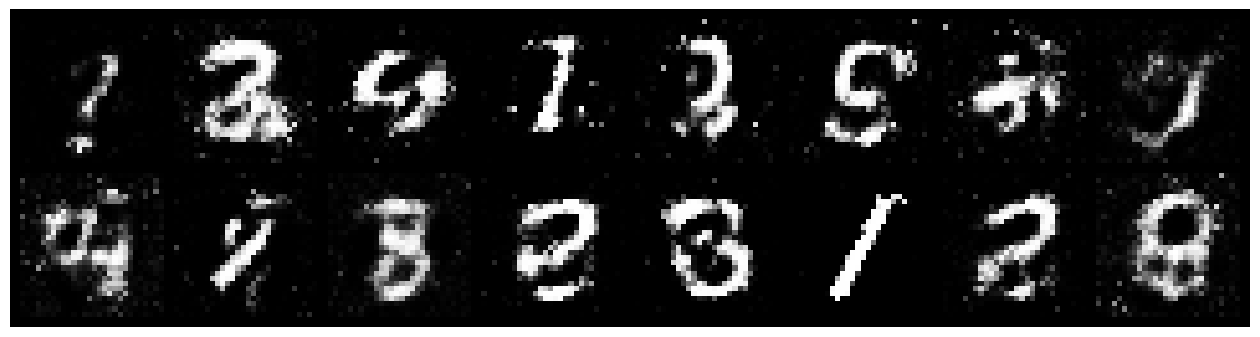

Epoch: [13/200], Batch Num: [599/600]
Discriminator Loss: 0.9970, Generator Loss: 1.5433
D(x): 0.6813, D(G(z)): 0.3252


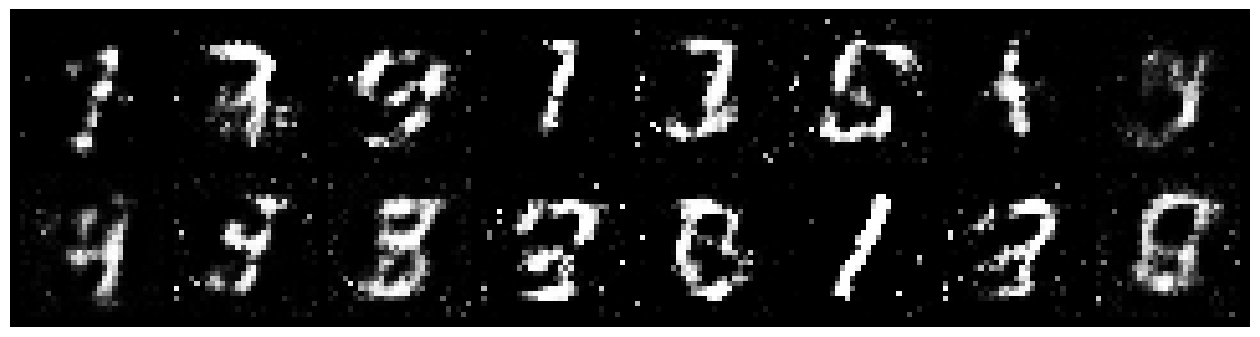

Epoch: [14/200], Batch Num: [599/600]
Discriminator Loss: 0.9637, Generator Loss: 1.2850
D(x): 0.7052, D(G(z)): 0.3582


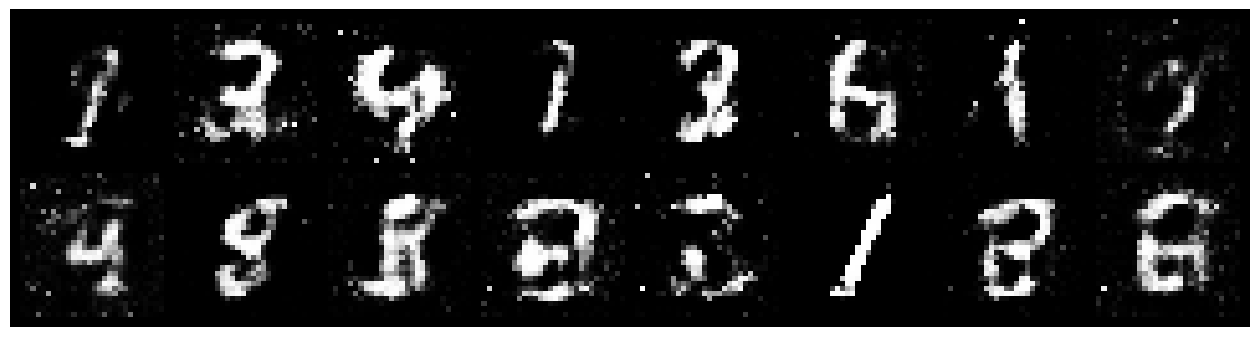

Epoch: [15/200], Batch Num: [599/600]
Discriminator Loss: 1.0110, Generator Loss: 1.6180
D(x): 0.6770, D(G(z)): 0.3177


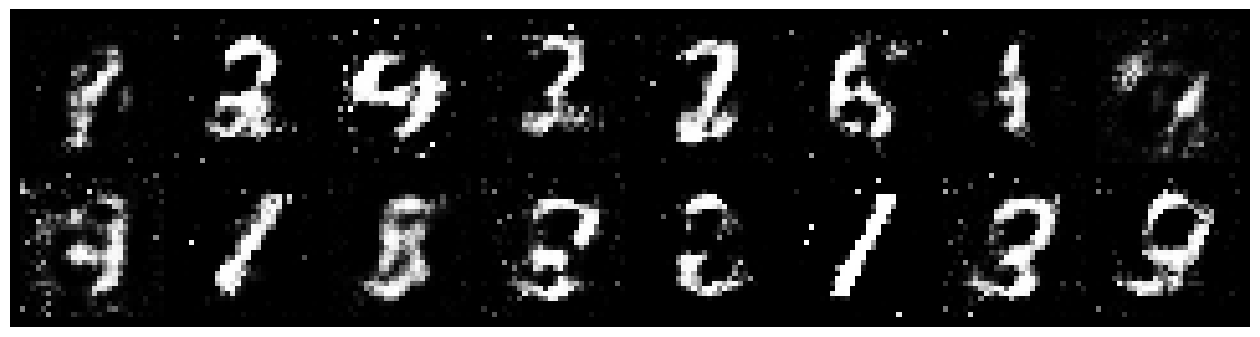

Epoch: [16/200], Batch Num: [599/600]
Discriminator Loss: 1.0900, Generator Loss: 1.4035
D(x): 0.6407, D(G(z)): 0.3738


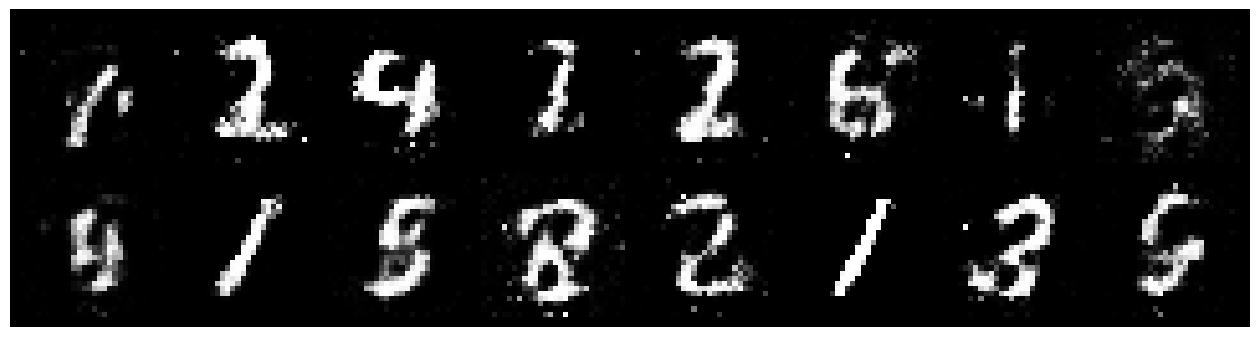

Epoch: [17/200], Batch Num: [599/600]
Discriminator Loss: 0.9857, Generator Loss: 1.2731
D(x): 0.6369, D(G(z)): 0.2840


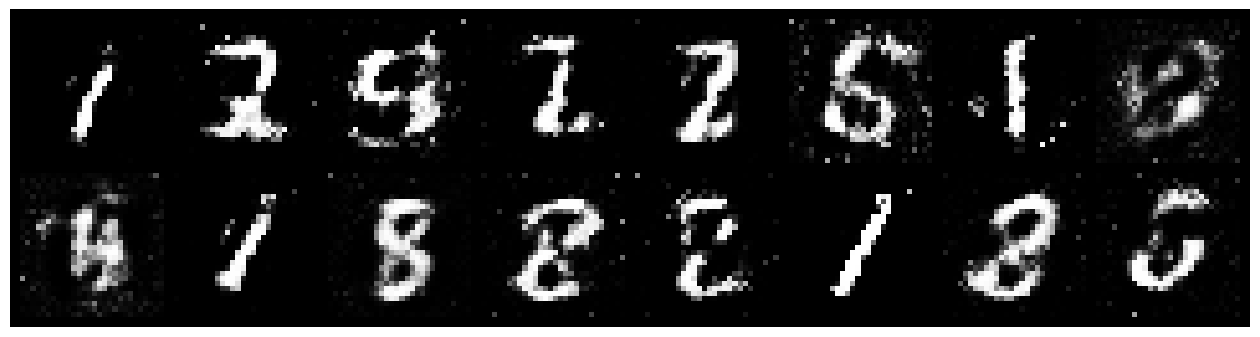

Epoch: [18/200], Batch Num: [599/600]
Discriminator Loss: 1.1126, Generator Loss: 1.3977
D(x): 0.6792, D(G(z)): 0.3758


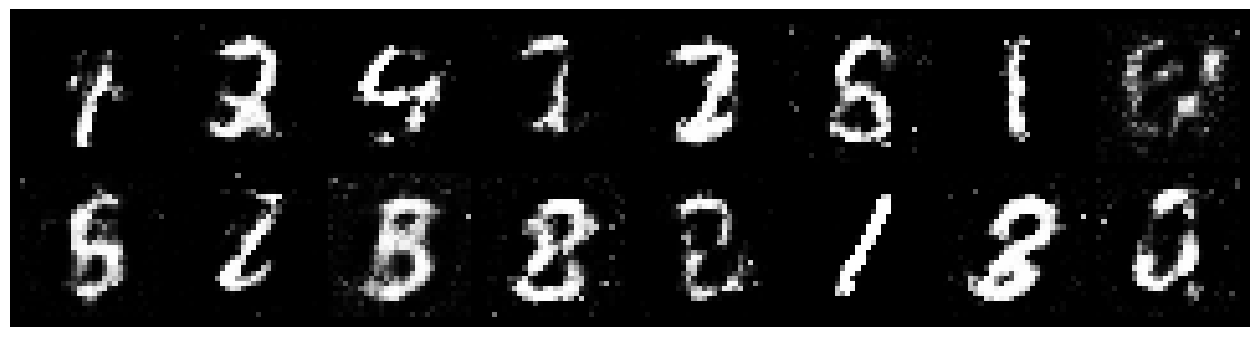

Epoch: [19/200], Batch Num: [599/600]
Discriminator Loss: 1.0154, Generator Loss: 1.4987
D(x): 0.7036, D(G(z)): 0.3679


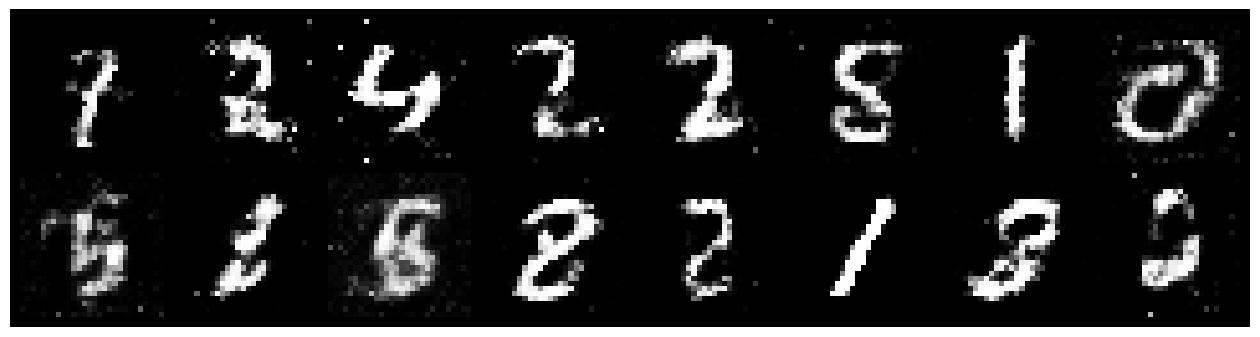

Epoch: [20/200], Batch Num: [599/600]
Discriminator Loss: 1.0242, Generator Loss: 1.1981
D(x): 0.6451, D(G(z)): 0.3614


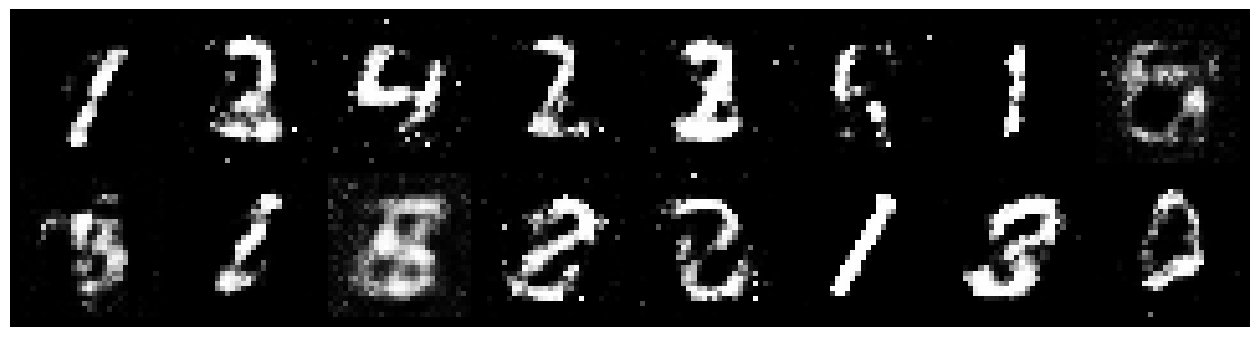

Epoch: [21/200], Batch Num: [599/600]
Discriminator Loss: 1.0239, Generator Loss: 1.0579
D(x): 0.6566, D(G(z)): 0.3805


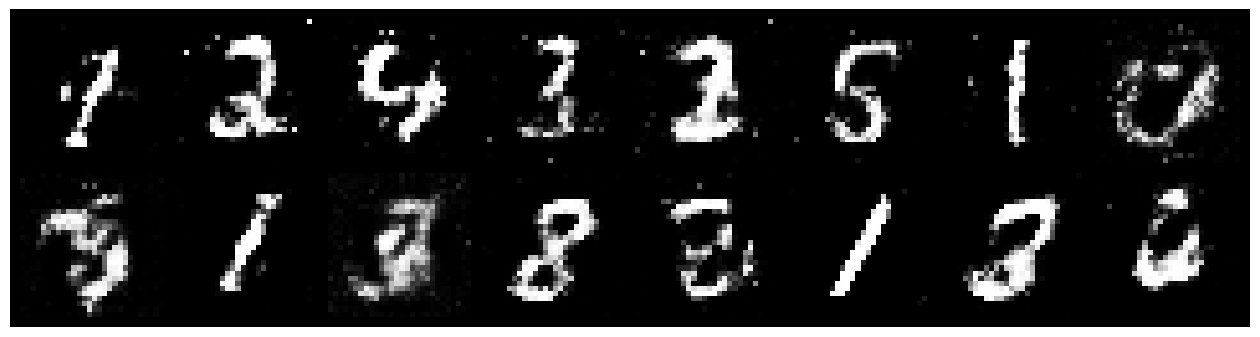

Epoch: [22/200], Batch Num: [599/600]
Discriminator Loss: 1.1622, Generator Loss: 1.2361
D(x): 0.5734, D(G(z)): 0.3288


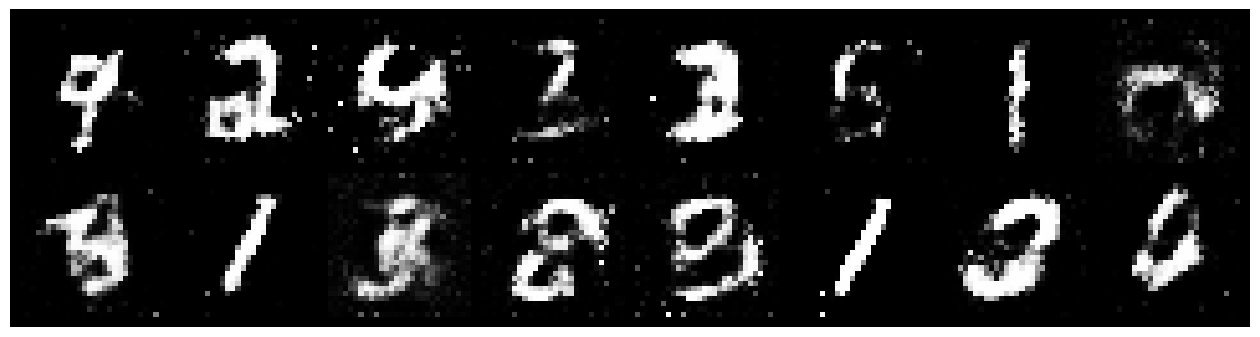

Epoch: [23/200], Batch Num: [599/600]
Discriminator Loss: 0.9515, Generator Loss: 1.2119
D(x): 0.6518, D(G(z)): 0.3250


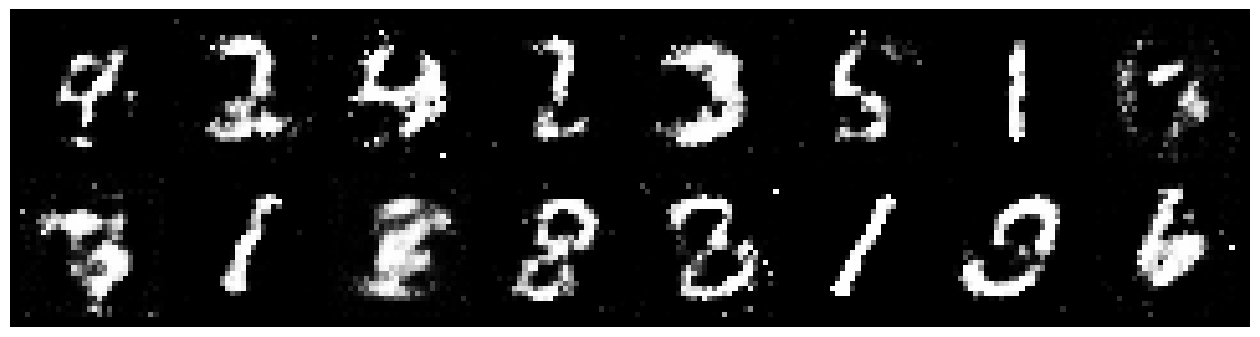

Epoch: [24/200], Batch Num: [599/600]
Discriminator Loss: 1.0729, Generator Loss: 1.1108
D(x): 0.6596, D(G(z)): 0.3809


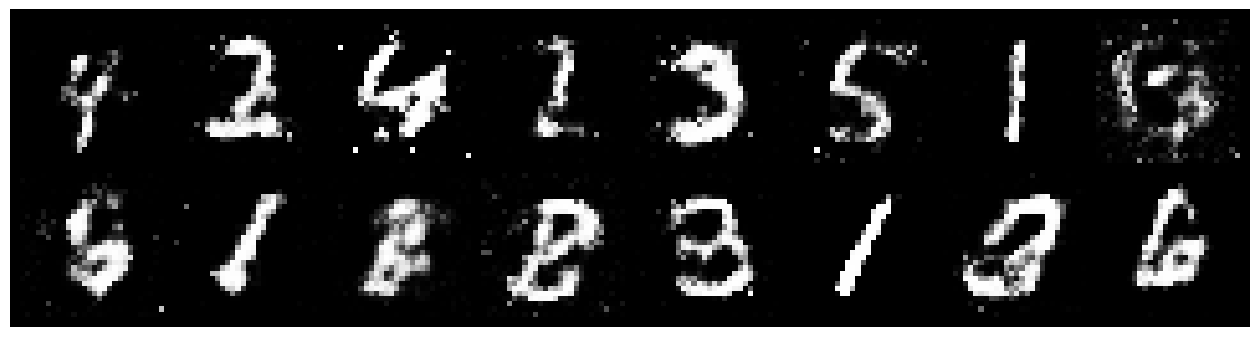

Epoch: [25/200], Batch Num: [599/600]
Discriminator Loss: 1.0717, Generator Loss: 1.1203
D(x): 0.7400, D(G(z)): 0.4239


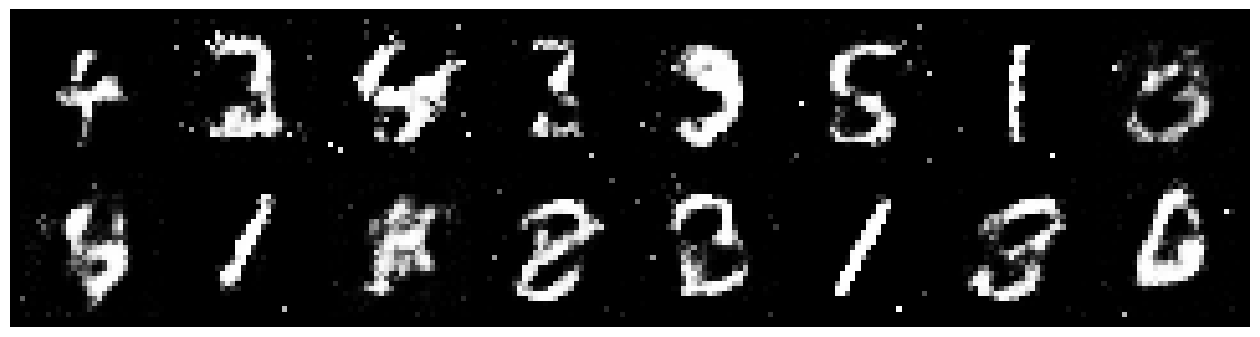

Epoch: [26/200], Batch Num: [599/600]
Discriminator Loss: 1.2446, Generator Loss: 1.1419
D(x): 0.5868, D(G(z)): 0.3902


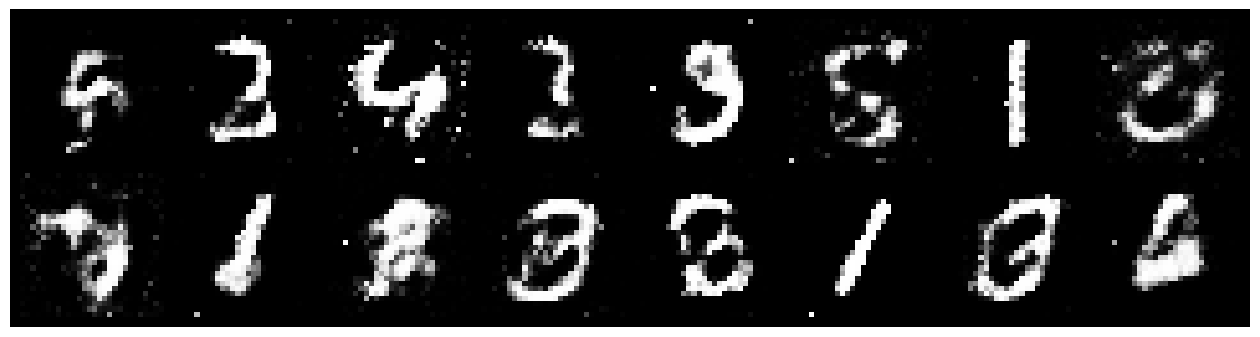

Epoch: [27/200], Batch Num: [599/600]
Discriminator Loss: 1.1150, Generator Loss: 1.4199
D(x): 0.6383, D(G(z)): 0.3601


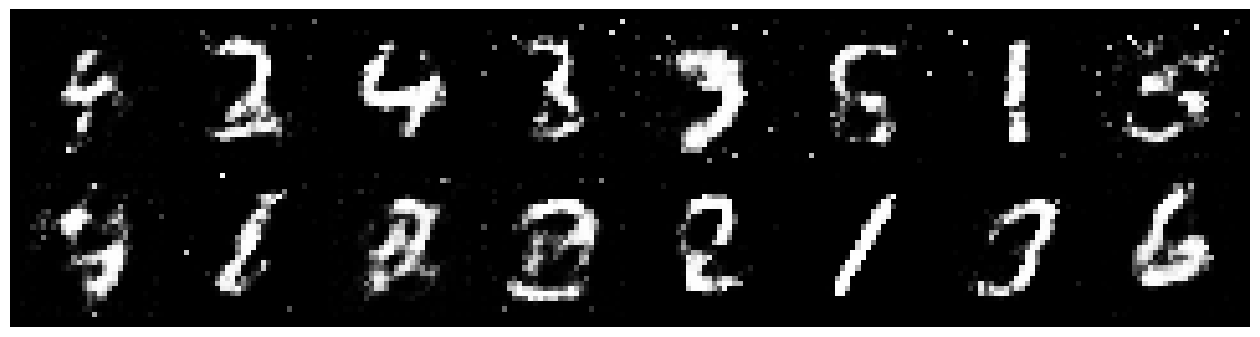

Epoch: [28/200], Batch Num: [599/600]
Discriminator Loss: 0.9676, Generator Loss: 1.2820
D(x): 0.6843, D(G(z)): 0.3734


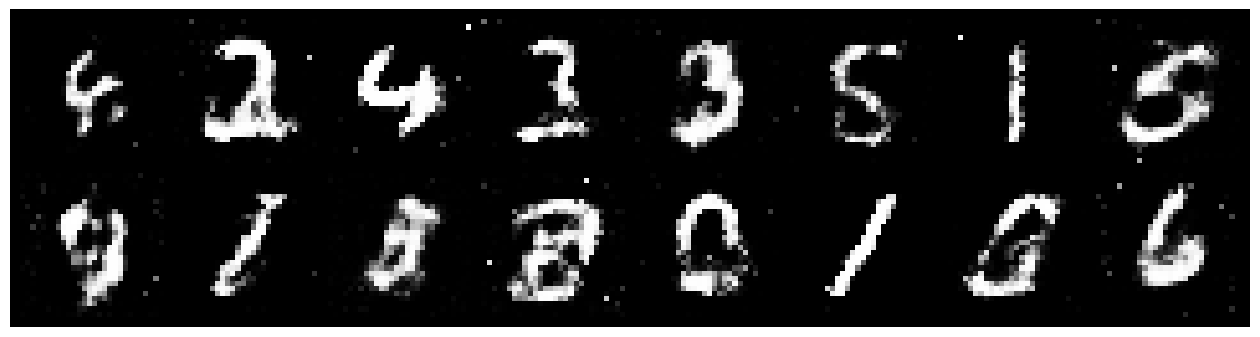

Epoch: [29/200], Batch Num: [599/600]
Discriminator Loss: 1.0783, Generator Loss: 1.2674
D(x): 0.7039, D(G(z)): 0.3966


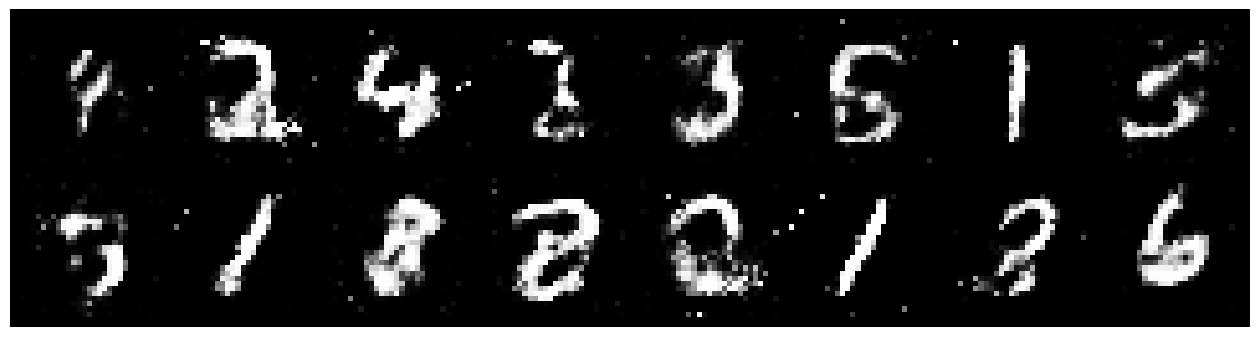

Epoch: [30/200], Batch Num: [599/600]
Discriminator Loss: 1.1202, Generator Loss: 1.0094
D(x): 0.6595, D(G(z)): 0.4475


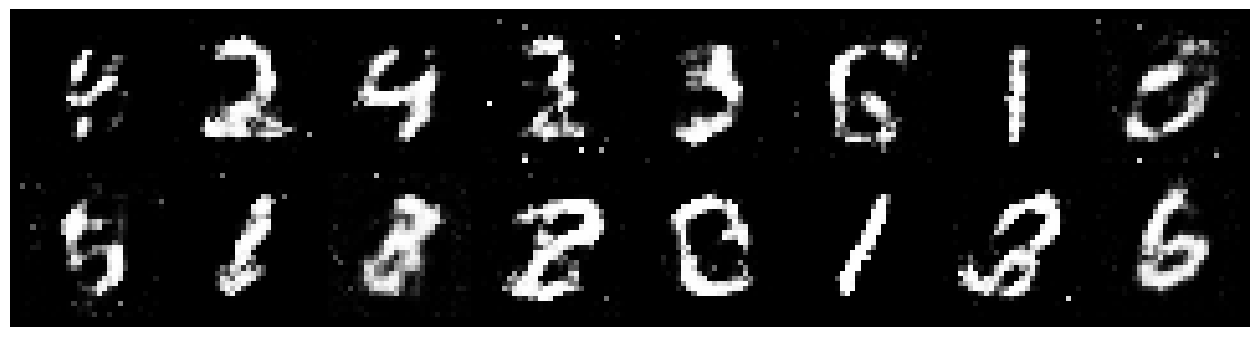

Epoch: [31/200], Batch Num: [599/600]
Discriminator Loss: 1.1394, Generator Loss: 1.1212
D(x): 0.6197, D(G(z)): 0.3917


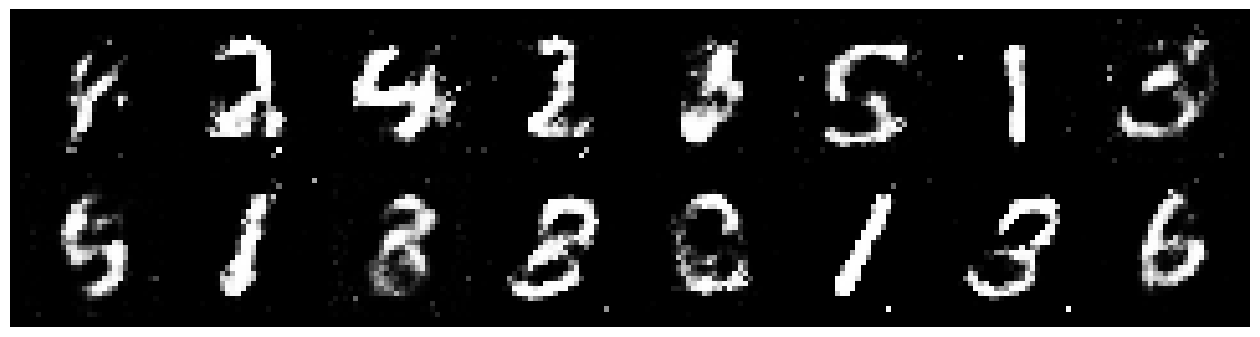

Epoch: [32/200], Batch Num: [599/600]
Discriminator Loss: 1.1075, Generator Loss: 1.3786
D(x): 0.5717, D(G(z)): 0.3167


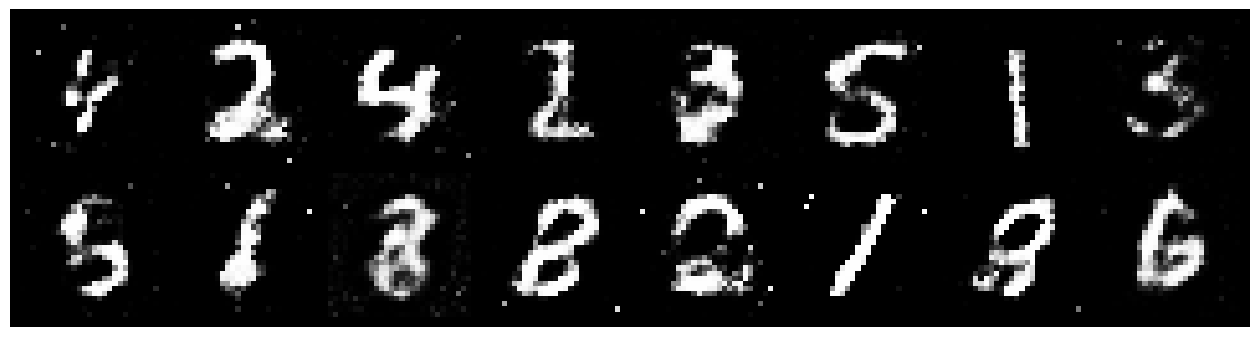

Epoch: [33/200], Batch Num: [599/600]
Discriminator Loss: 1.1835, Generator Loss: 1.0204
D(x): 0.6053, D(G(z)): 0.4344


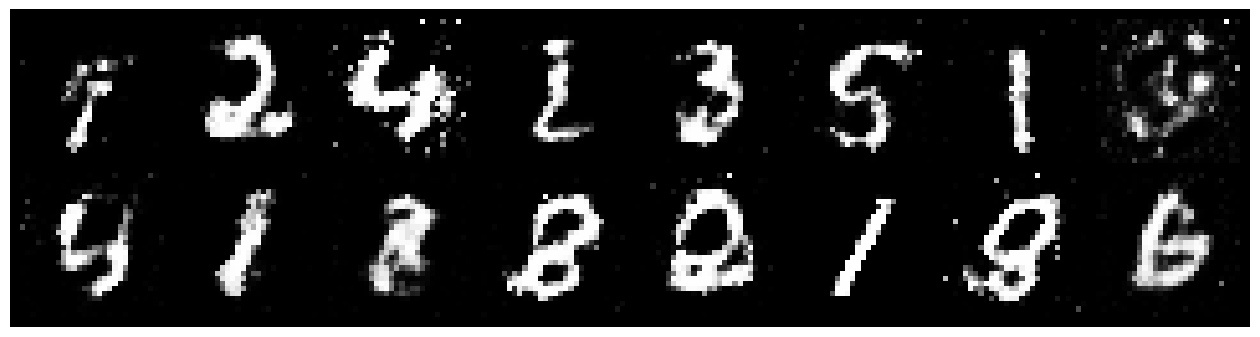

Epoch: [34/200], Batch Num: [599/600]
Discriminator Loss: 1.0832, Generator Loss: 1.0321
D(x): 0.6177, D(G(z)): 0.3768


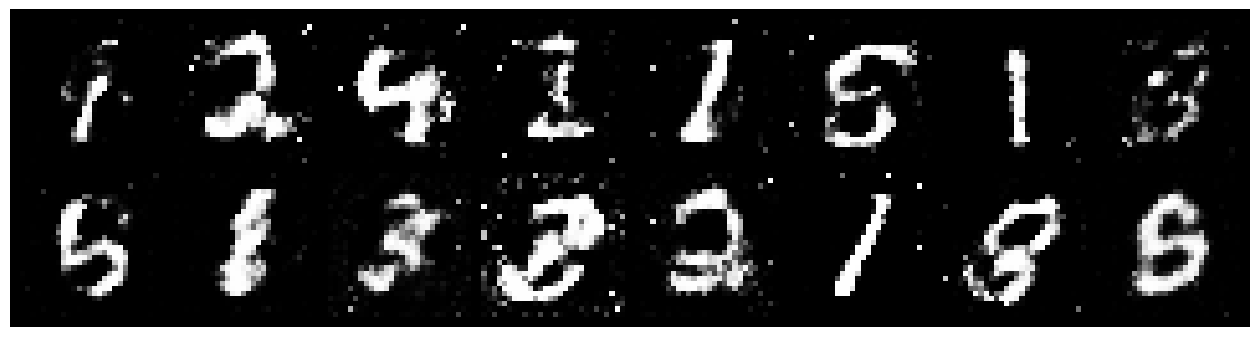

Epoch: [35/200], Batch Num: [599/600]
Discriminator Loss: 1.0776, Generator Loss: 1.1117
D(x): 0.6419, D(G(z)): 0.4122


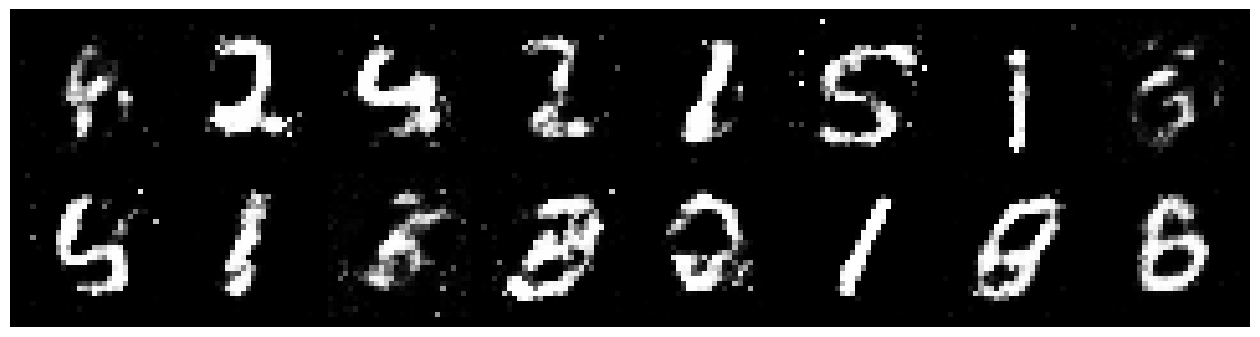

Epoch: [36/200], Batch Num: [599/600]
Discriminator Loss: 1.1690, Generator Loss: 0.8589
D(x): 0.5701, D(G(z)): 0.4156


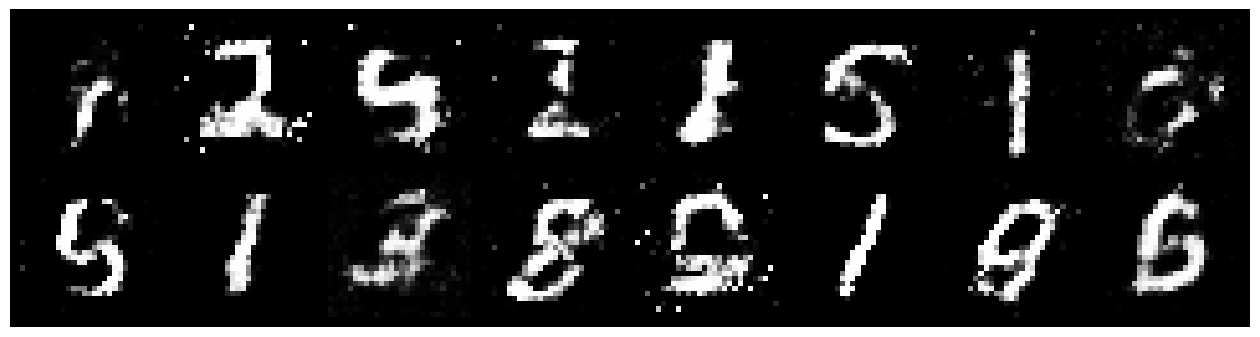

Epoch: [37/200], Batch Num: [599/600]
Discriminator Loss: 1.2517, Generator Loss: 0.9823
D(x): 0.6170, D(G(z)): 0.4659


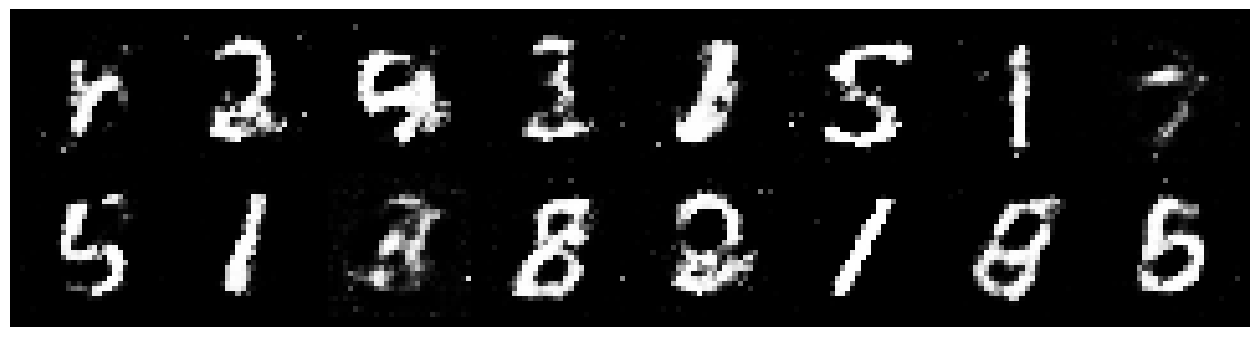

Epoch: [38/200], Batch Num: [599/600]
Discriminator Loss: 1.0679, Generator Loss: 1.3042
D(x): 0.6307, D(G(z)): 0.3543


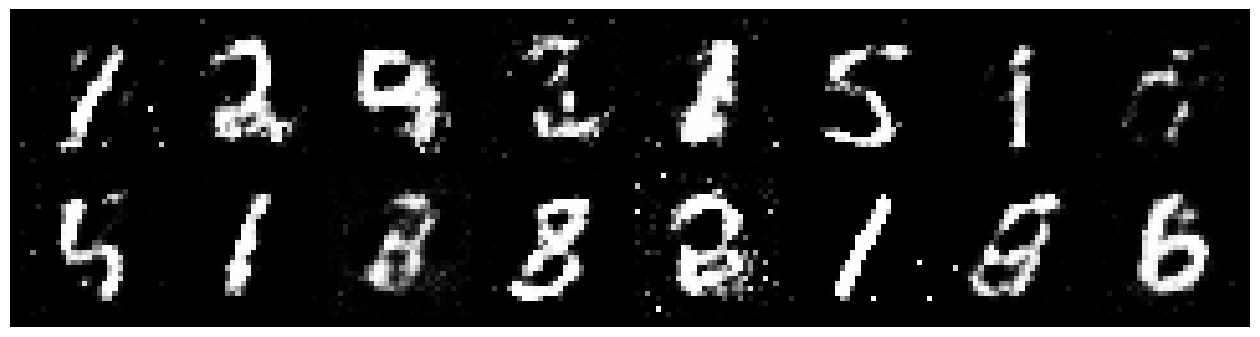

Epoch: [39/200], Batch Num: [599/600]
Discriminator Loss: 1.1548, Generator Loss: 1.2239
D(x): 0.5797, D(G(z)): 0.3534


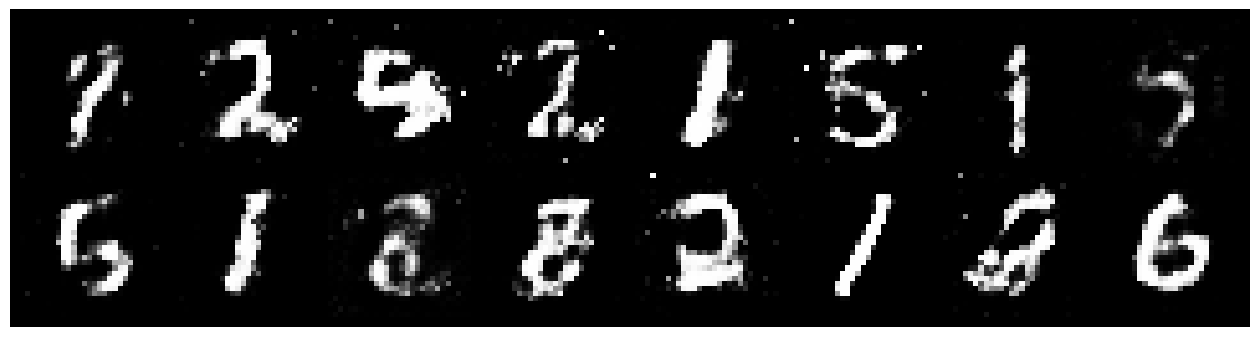

Epoch: [40/200], Batch Num: [599/600]
Discriminator Loss: 1.1225, Generator Loss: 1.3099
D(x): 0.6822, D(G(z)): 0.4145


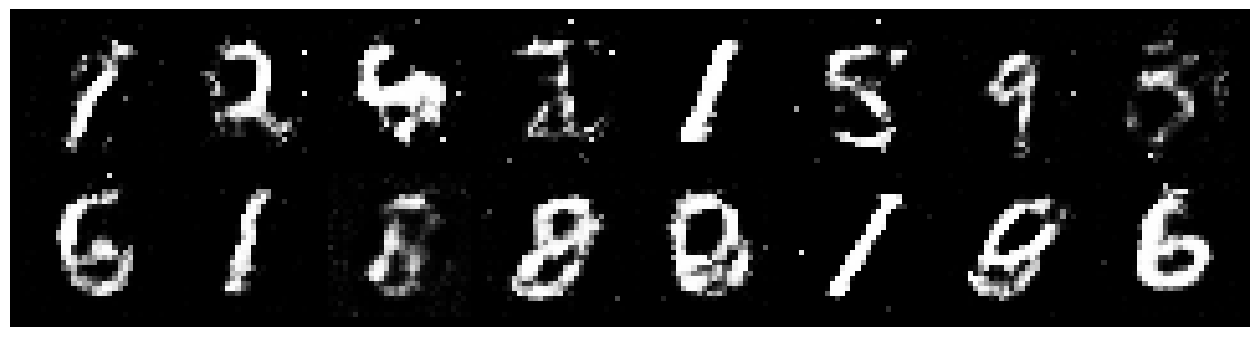

Epoch: [41/200], Batch Num: [599/600]
Discriminator Loss: 1.2260, Generator Loss: 1.2323
D(x): 0.5414, D(G(z)): 0.3725


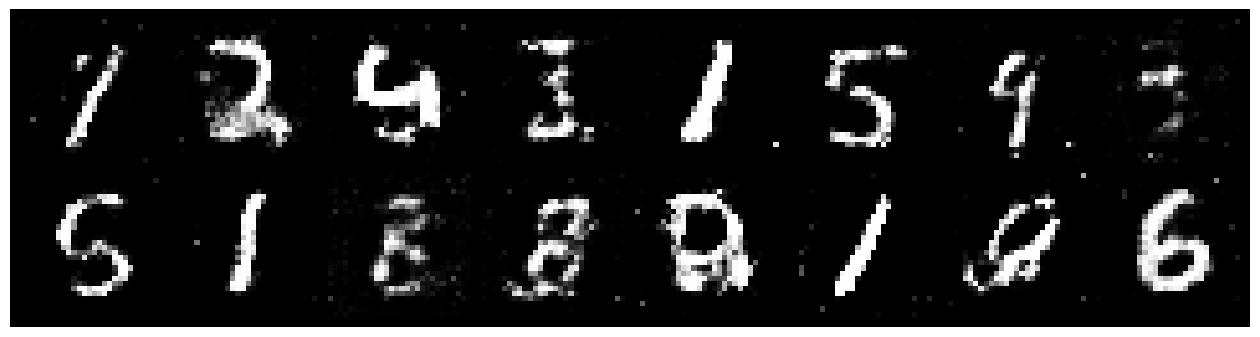

Epoch: [42/200], Batch Num: [599/600]
Discriminator Loss: 1.2406, Generator Loss: 1.0588
D(x): 0.6083, D(G(z)): 0.4252


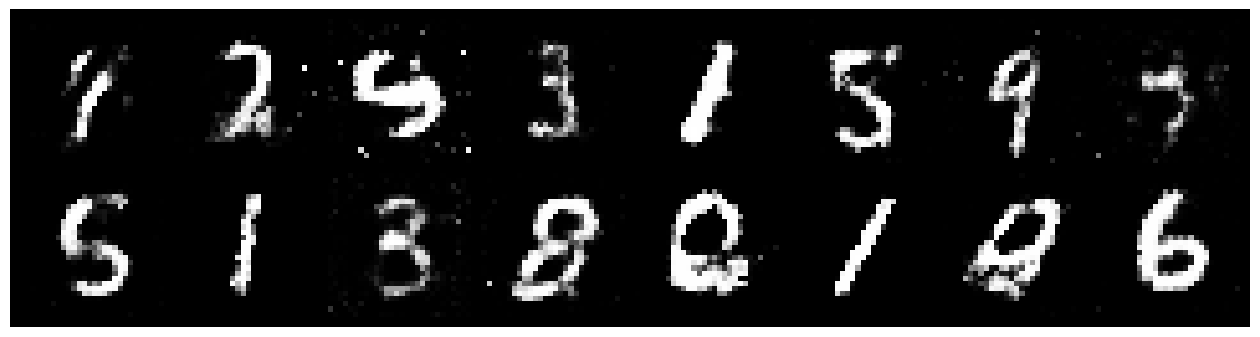

Epoch: [43/200], Batch Num: [599/600]
Discriminator Loss: 1.2586, Generator Loss: 1.1470
D(x): 0.5893, D(G(z)): 0.4204


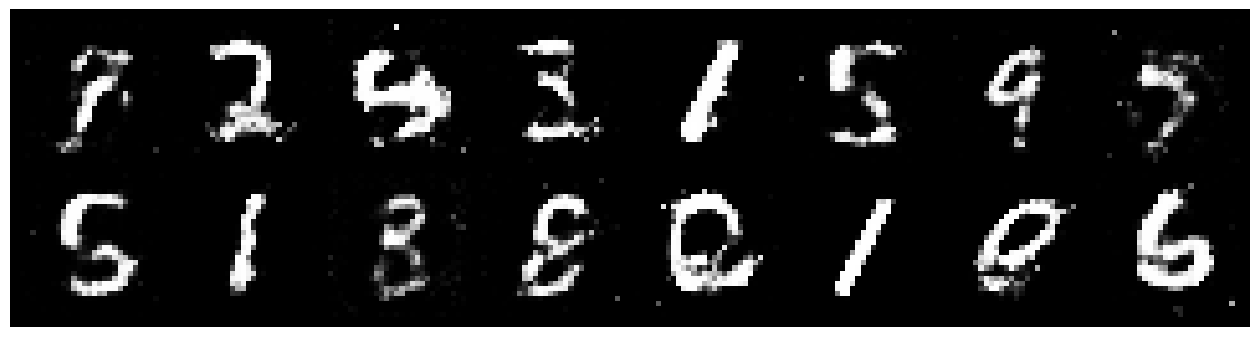

Epoch: [44/200], Batch Num: [599/600]
Discriminator Loss: 1.1678, Generator Loss: 1.0721
D(x): 0.5992, D(G(z)): 0.4231


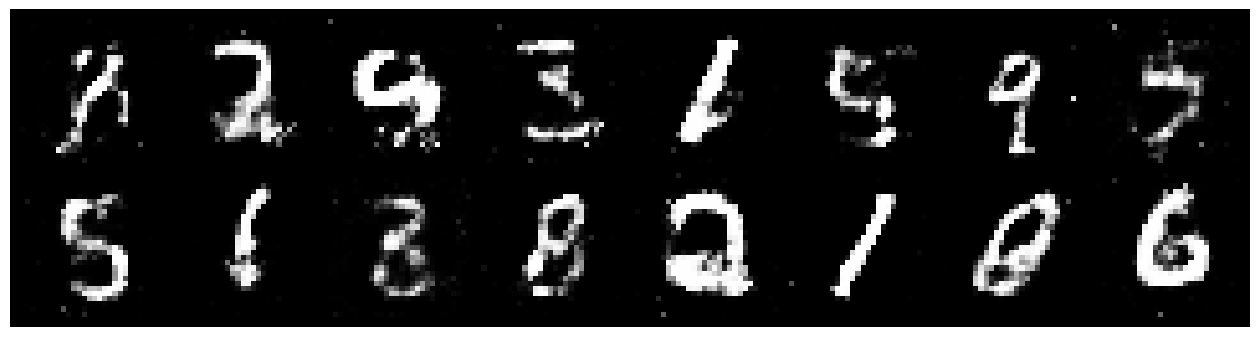

Epoch: [45/200], Batch Num: [599/600]
Discriminator Loss: 1.1812, Generator Loss: 1.0141
D(x): 0.6117, D(G(z)): 0.4195


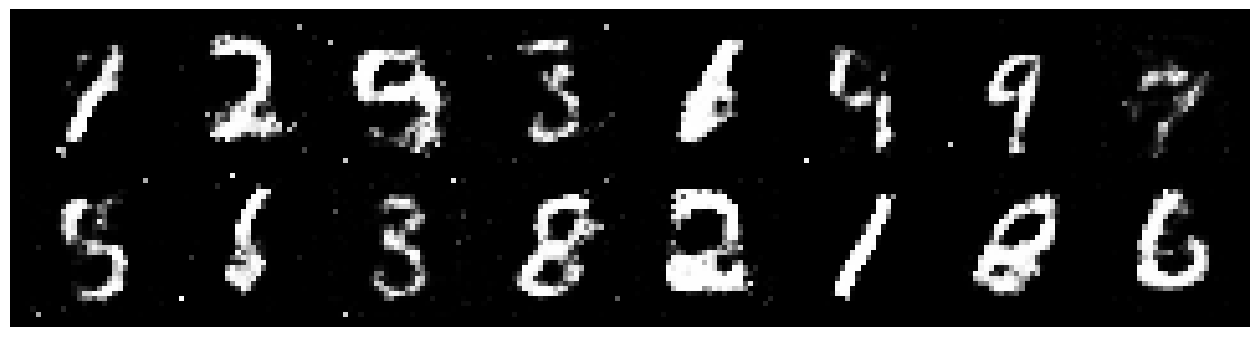

Epoch: [46/200], Batch Num: [599/600]
Discriminator Loss: 1.0256, Generator Loss: 1.2789
D(x): 0.6612, D(G(z)): 0.3863


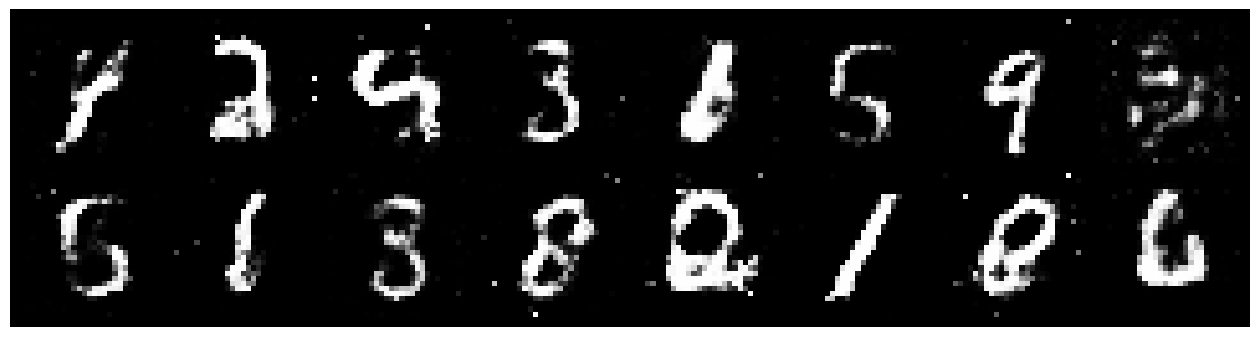

Epoch: [47/200], Batch Num: [599/600]
Discriminator Loss: 1.1809, Generator Loss: 1.0161
D(x): 0.5653, D(G(z)): 0.4053


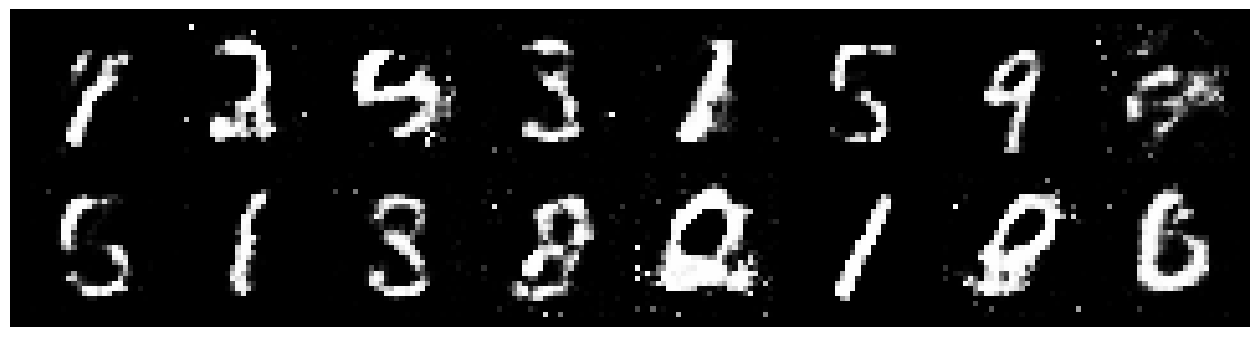

Epoch: [48/200], Batch Num: [599/600]
Discriminator Loss: 1.2155, Generator Loss: 1.0503
D(x): 0.5727, D(G(z)): 0.4145


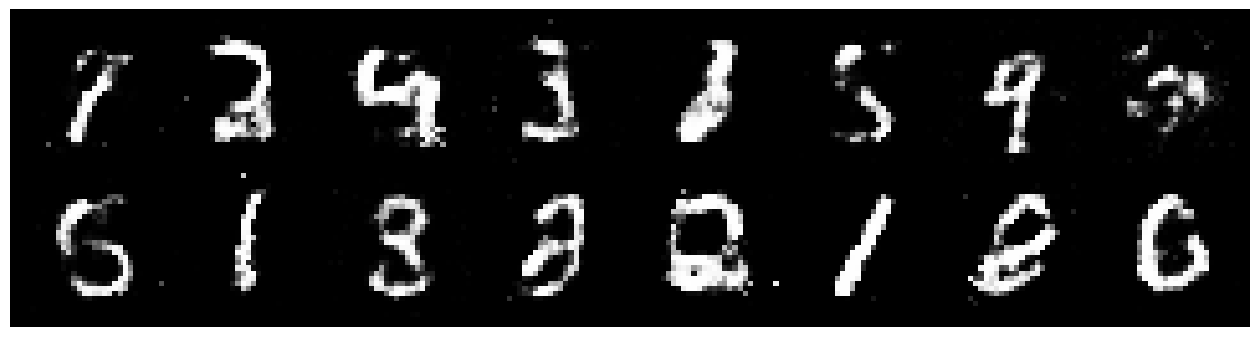

Epoch: [49/200], Batch Num: [599/600]
Discriminator Loss: 1.2449, Generator Loss: 1.0104
D(x): 0.5524, D(G(z)): 0.3901


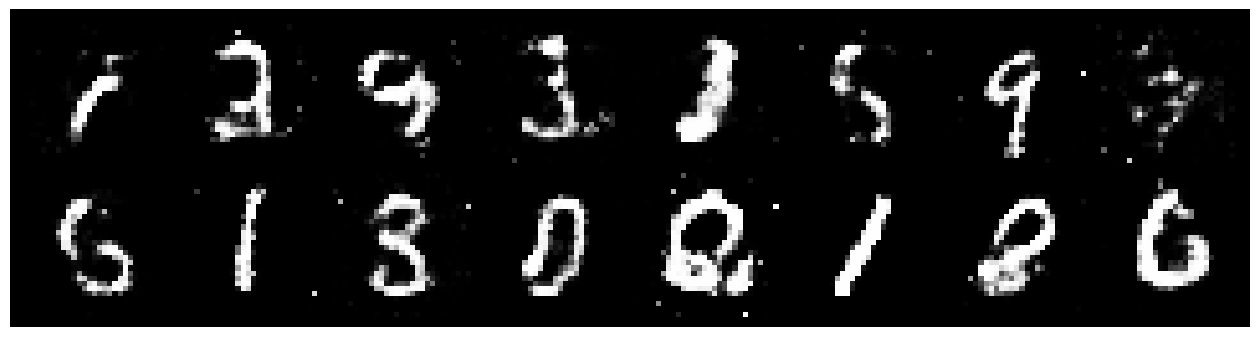

Epoch: [50/200], Batch Num: [599/600]
Discriminator Loss: 1.0571, Generator Loss: 1.1612
D(x): 0.6100, D(G(z)): 0.3506


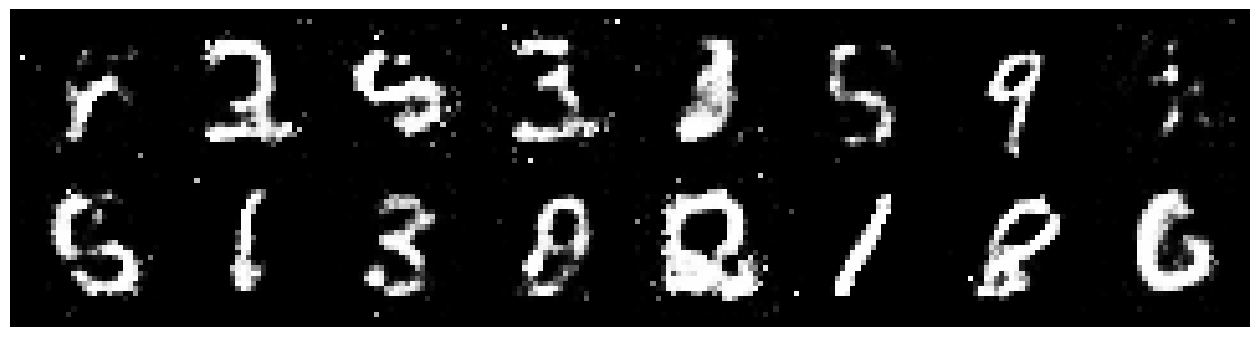

Epoch: [51/200], Batch Num: [599/600]
Discriminator Loss: 1.1565, Generator Loss: 1.0624
D(x): 0.5700, D(G(z)): 0.3773


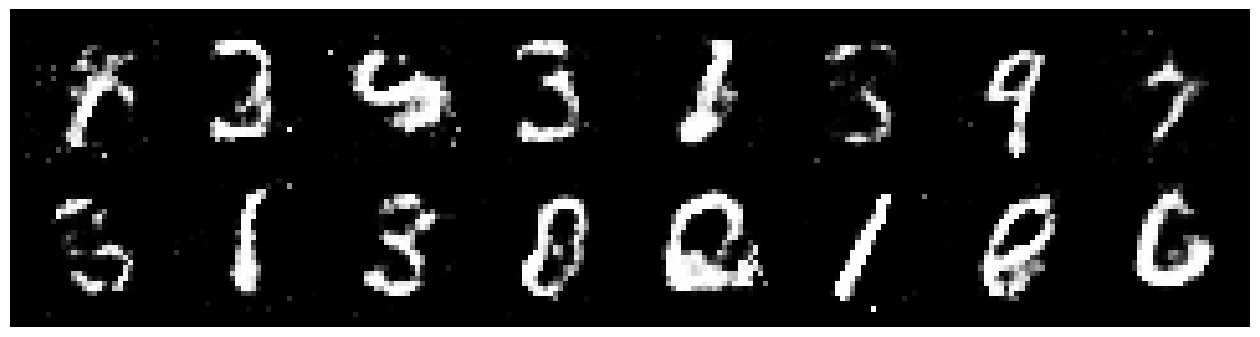

Epoch: [52/200], Batch Num: [599/600]
Discriminator Loss: 1.0867, Generator Loss: 1.1440
D(x): 0.6002, D(G(z)): 0.3679


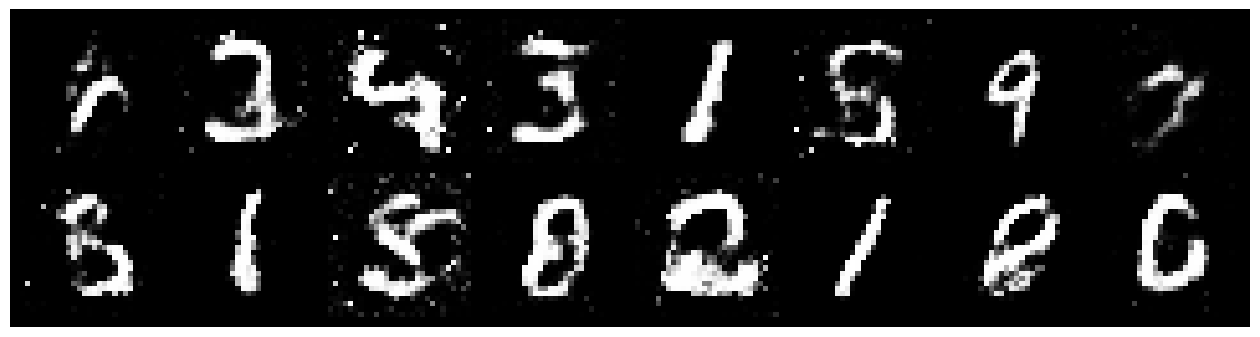

Epoch: [53/200], Batch Num: [599/600]
Discriminator Loss: 1.2571, Generator Loss: 0.8974
D(x): 0.5437, D(G(z)): 0.4347


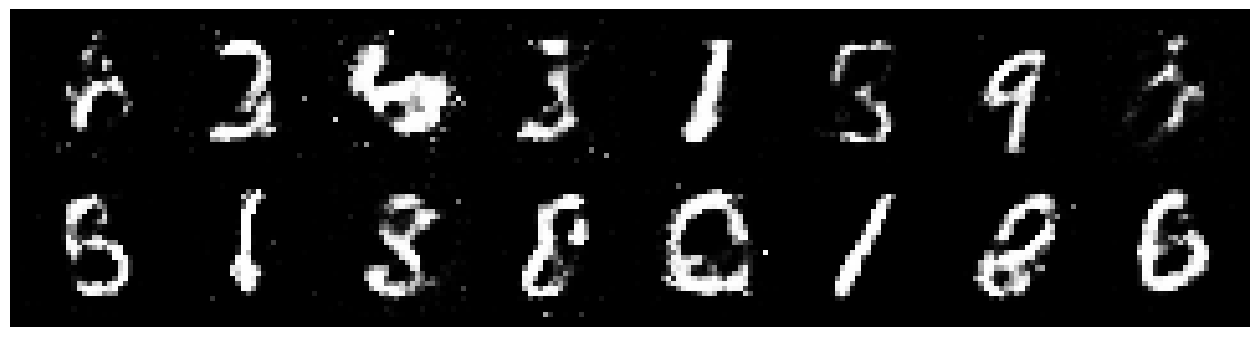

Epoch: [54/200], Batch Num: [599/600]
Discriminator Loss: 1.3052, Generator Loss: 0.9556
D(x): 0.5640, D(G(z)): 0.4518


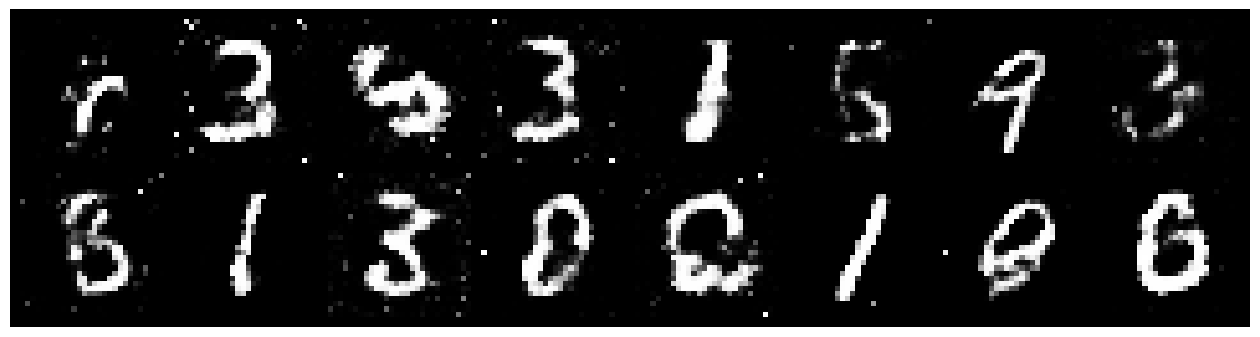

Epoch: [55/200], Batch Num: [599/600]
Discriminator Loss: 1.0520, Generator Loss: 1.2305
D(x): 0.5996, D(G(z)): 0.3302


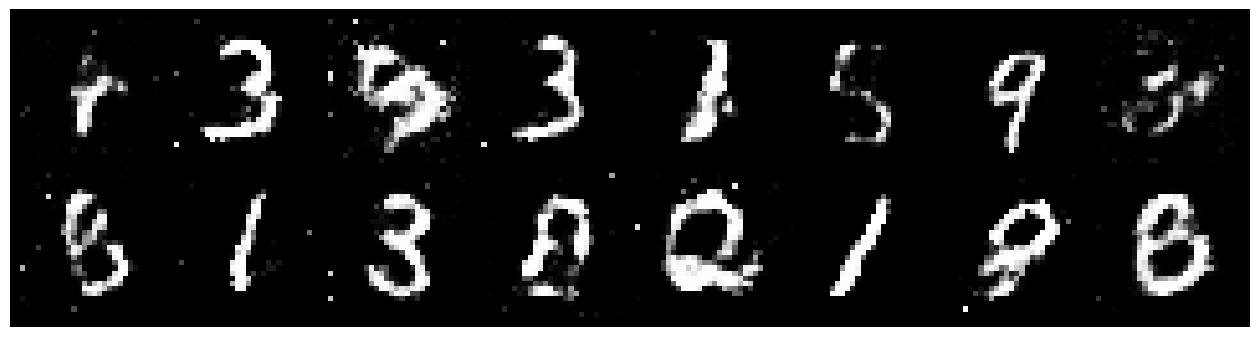

Epoch: [56/200], Batch Num: [599/600]
Discriminator Loss: 1.1869, Generator Loss: 0.9092
D(x): 0.5929, D(G(z)): 0.4284


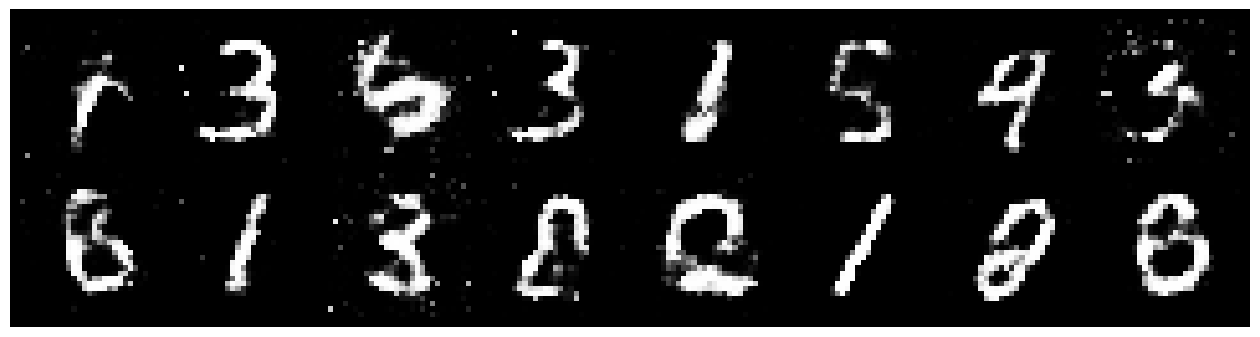

Epoch: [57/200], Batch Num: [599/600]
Discriminator Loss: 1.2176, Generator Loss: 1.0935
D(x): 0.6068, D(G(z)): 0.4256


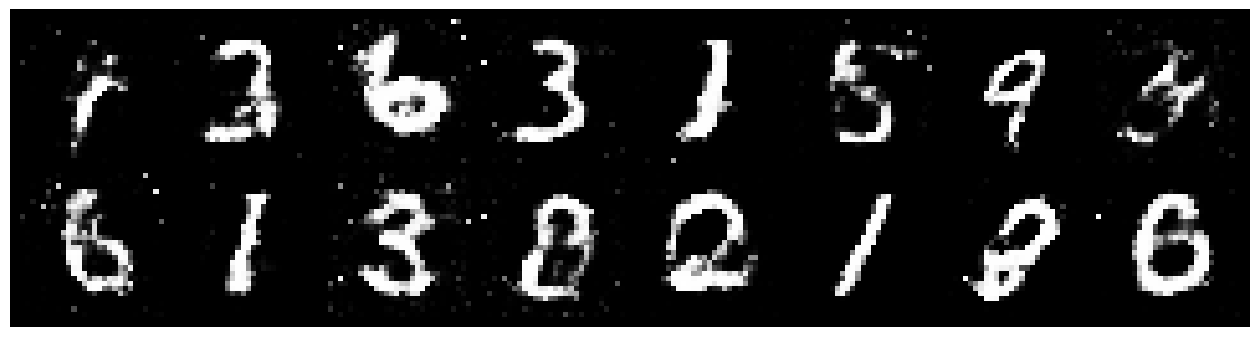

Epoch: [58/200], Batch Num: [599/600]
Discriminator Loss: 1.2242, Generator Loss: 0.9801
D(x): 0.5459, D(G(z)): 0.3924


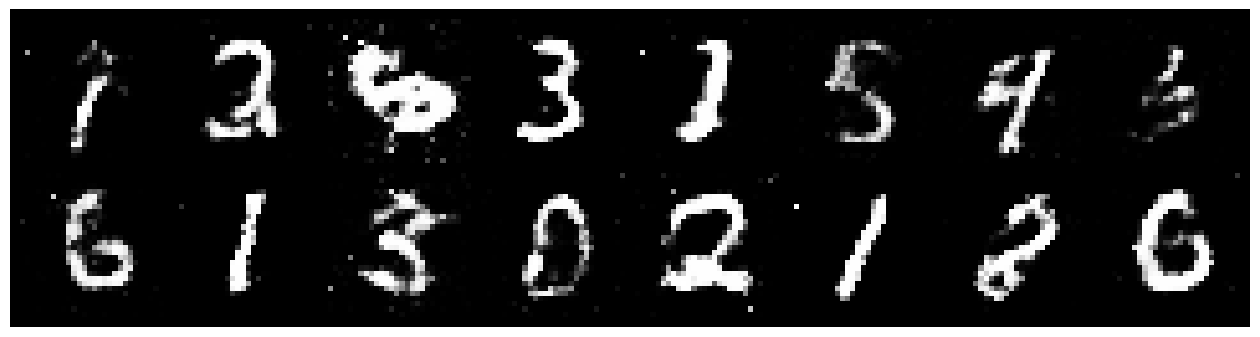

Epoch: [59/200], Batch Num: [599/600]
Discriminator Loss: 1.3901, Generator Loss: 0.8694
D(x): 0.5663, D(G(z)): 0.5036


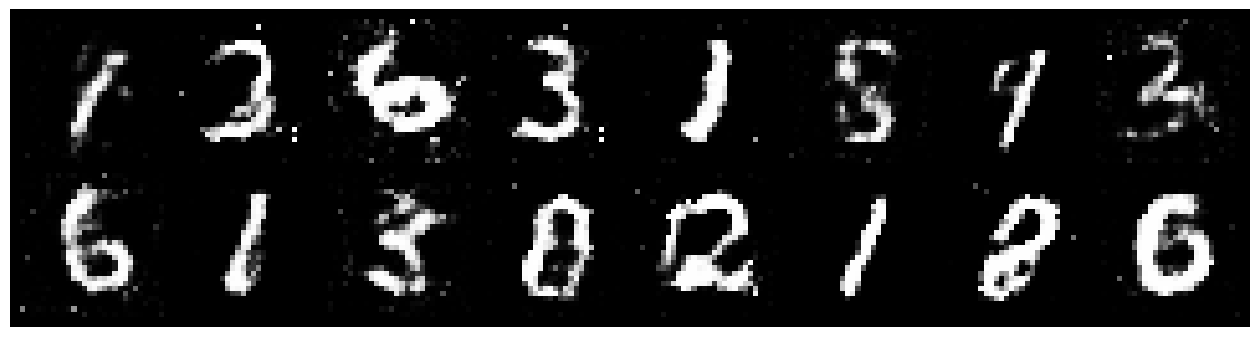

Epoch: [60/200], Batch Num: [599/600]
Discriminator Loss: 1.1911, Generator Loss: 1.0302
D(x): 0.6252, D(G(z)): 0.4526


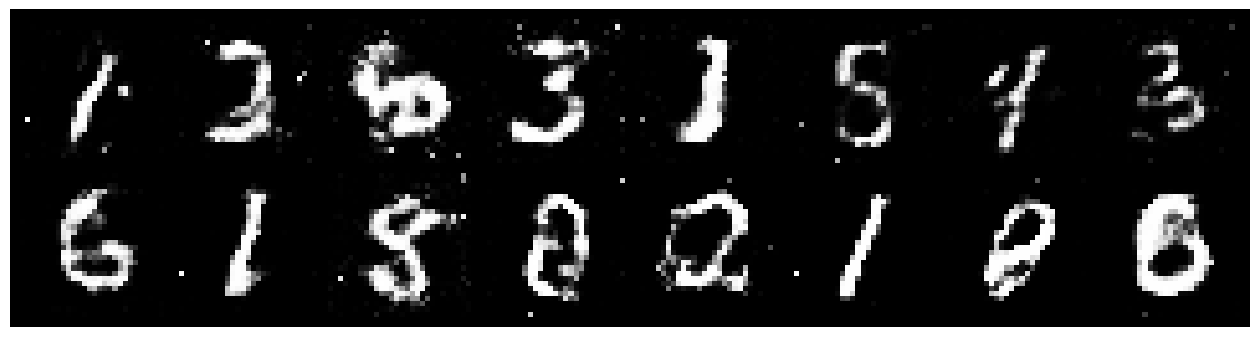

Epoch: [61/200], Batch Num: [599/600]
Discriminator Loss: 1.2440, Generator Loss: 1.1589
D(x): 0.5317, D(G(z)): 0.3846


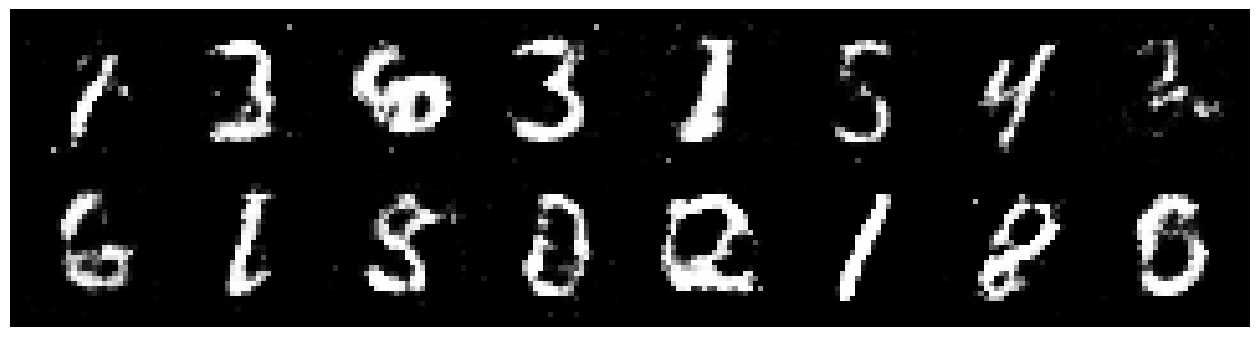

Epoch: [62/200], Batch Num: [599/600]
Discriminator Loss: 1.2882, Generator Loss: 1.1088
D(x): 0.5723, D(G(z)): 0.4333


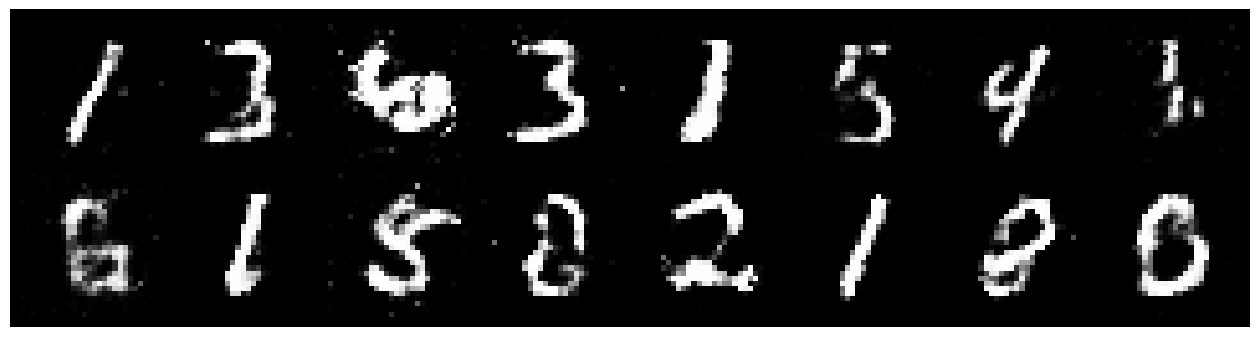

Epoch: [63/200], Batch Num: [599/600]
Discriminator Loss: 1.2817, Generator Loss: 0.9174
D(x): 0.5464, D(G(z)): 0.4434


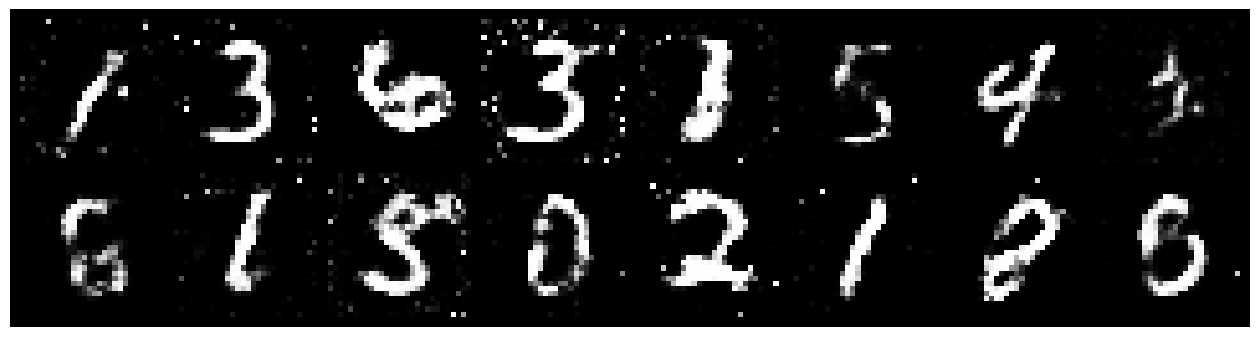

Epoch: [64/200], Batch Num: [599/600]
Discriminator Loss: 1.2386, Generator Loss: 1.0906
D(x): 0.5692, D(G(z)): 0.4124


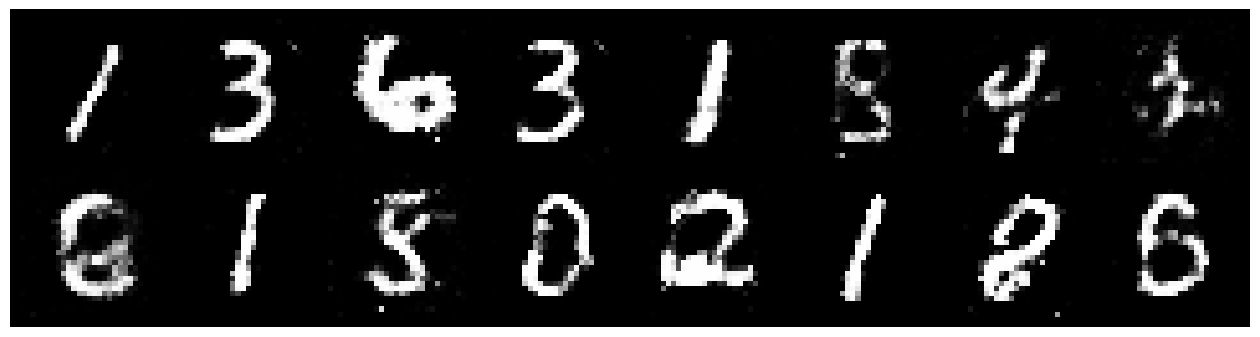

Epoch: [65/200], Batch Num: [599/600]
Discriminator Loss: 1.3397, Generator Loss: 0.9200
D(x): 0.5253, D(G(z)): 0.4413


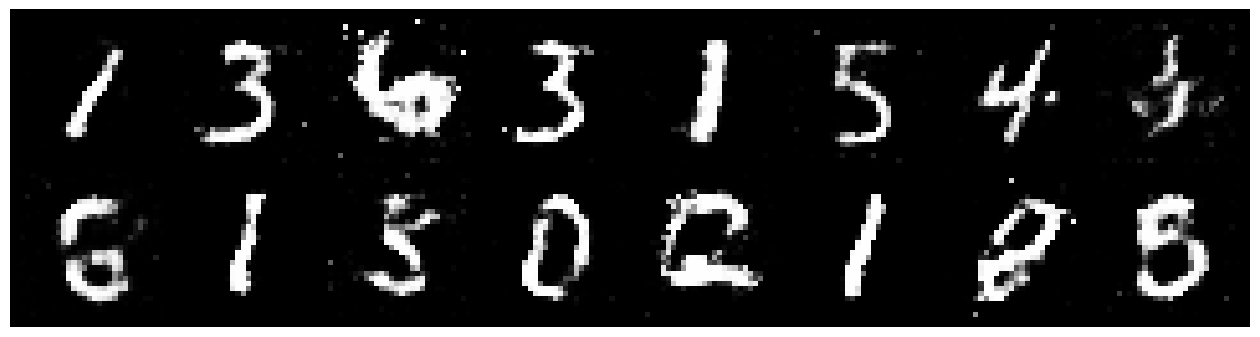

Epoch: [66/200], Batch Num: [599/600]
Discriminator Loss: 1.1152, Generator Loss: 1.0435
D(x): 0.6005, D(G(z)): 0.3960


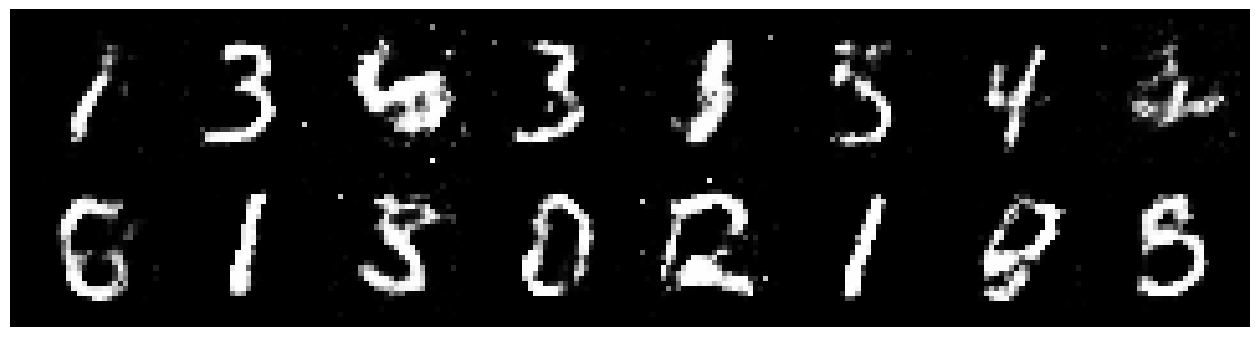

Epoch: [67/200], Batch Num: [599/600]
Discriminator Loss: 1.2099, Generator Loss: 0.9847
D(x): 0.5740, D(G(z)): 0.4125


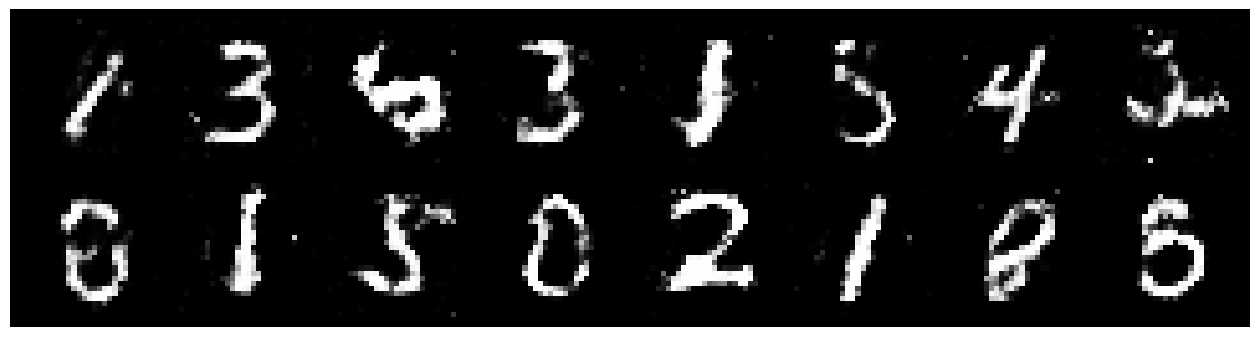

Epoch: [68/200], Batch Num: [599/600]
Discriminator Loss: 1.1839, Generator Loss: 0.9268
D(x): 0.5985, D(G(z)): 0.4212


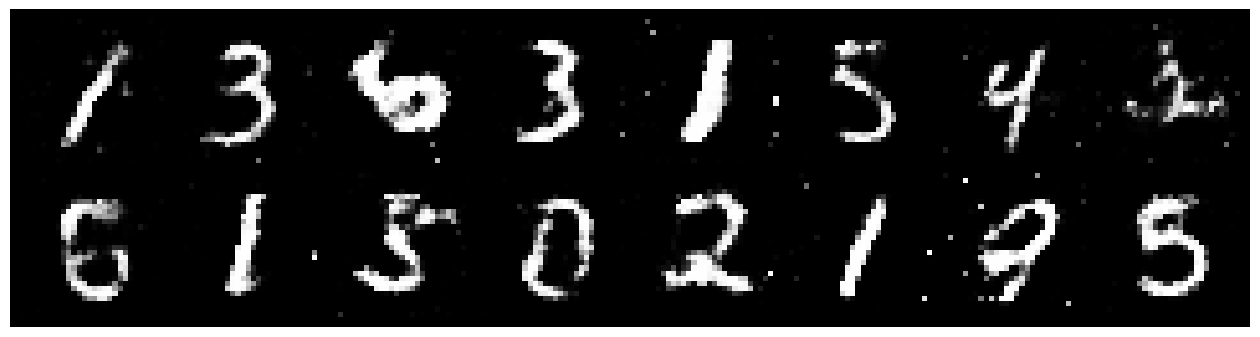

Epoch: [69/200], Batch Num: [599/600]
Discriminator Loss: 1.2097, Generator Loss: 0.9363
D(x): 0.5885, D(G(z)): 0.4125


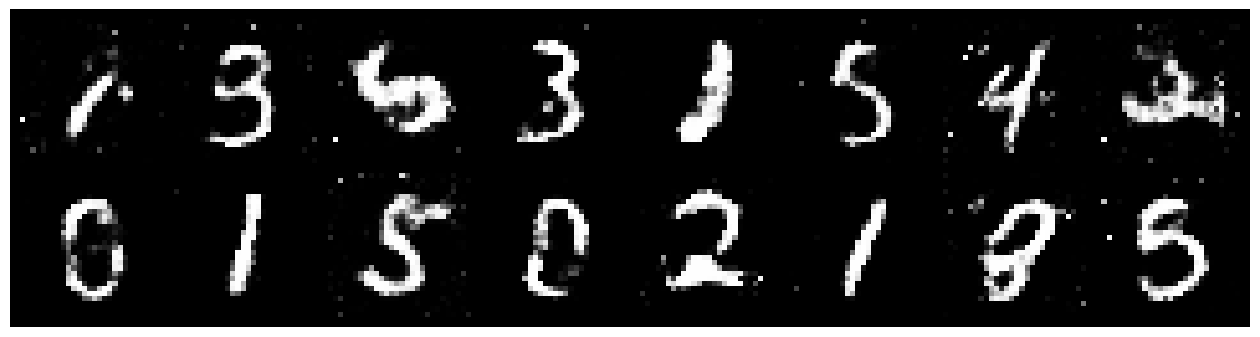

Epoch: [70/200], Batch Num: [599/600]
Discriminator Loss: 1.2278, Generator Loss: 0.9843
D(x): 0.5953, D(G(z)): 0.4602


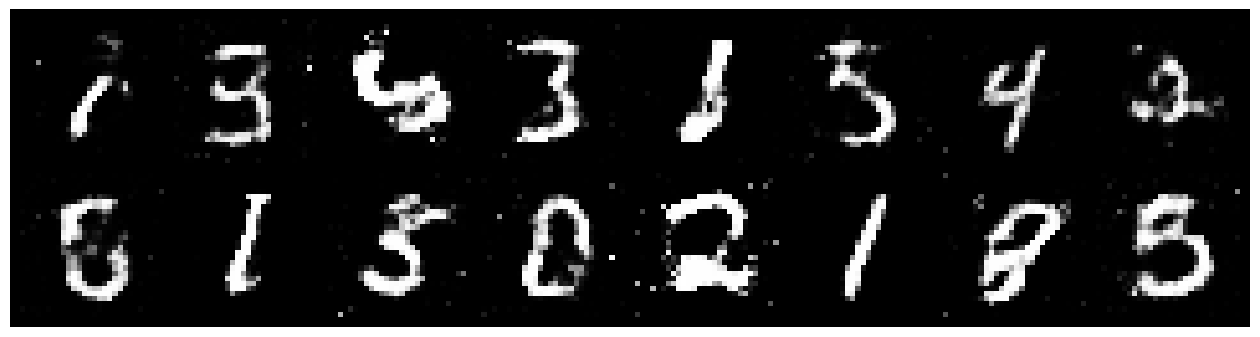

Epoch: [71/200], Batch Num: [599/600]
Discriminator Loss: 1.2351, Generator Loss: 0.8592
D(x): 0.5747, D(G(z)): 0.4331


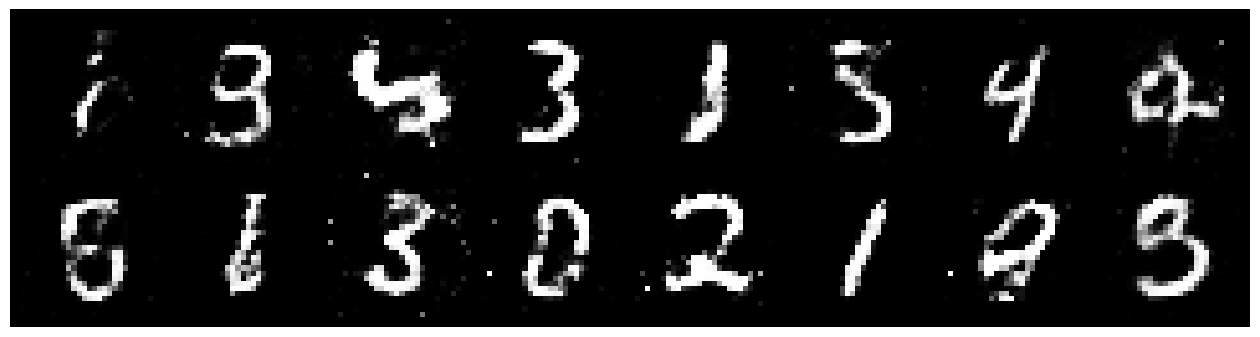

Epoch: [72/200], Batch Num: [599/600]
Discriminator Loss: 1.2217, Generator Loss: 0.9486
D(x): 0.5456, D(G(z)): 0.3825


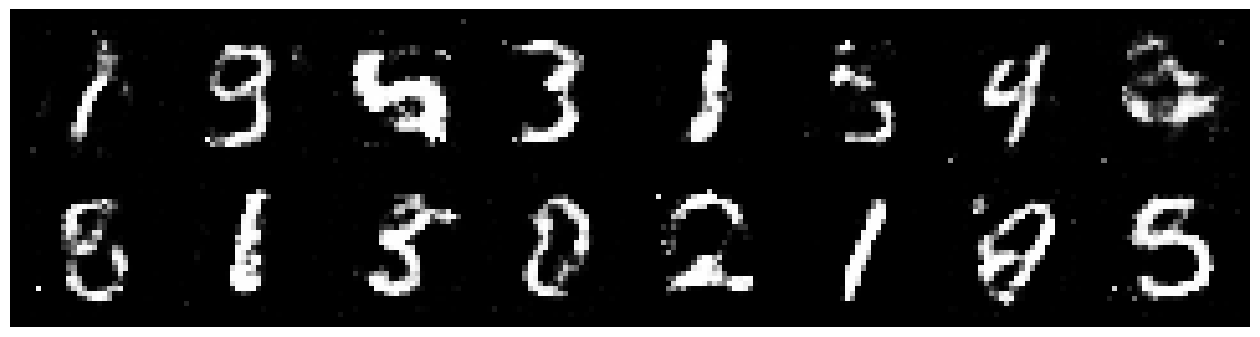

Epoch: [73/200], Batch Num: [599/600]
Discriminator Loss: 1.3278, Generator Loss: 0.8975
D(x): 0.5500, D(G(z)): 0.4638


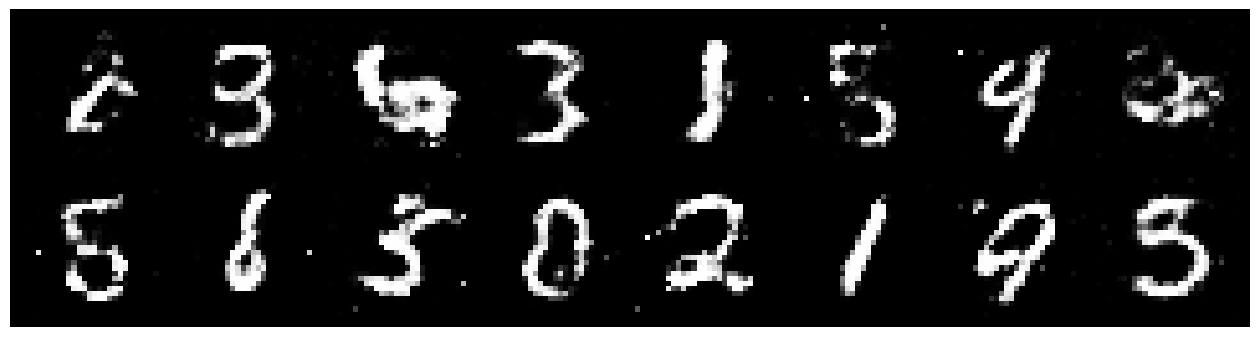

Epoch: [74/200], Batch Num: [599/600]
Discriminator Loss: 1.2893, Generator Loss: 0.9649
D(x): 0.5338, D(G(z)): 0.4292


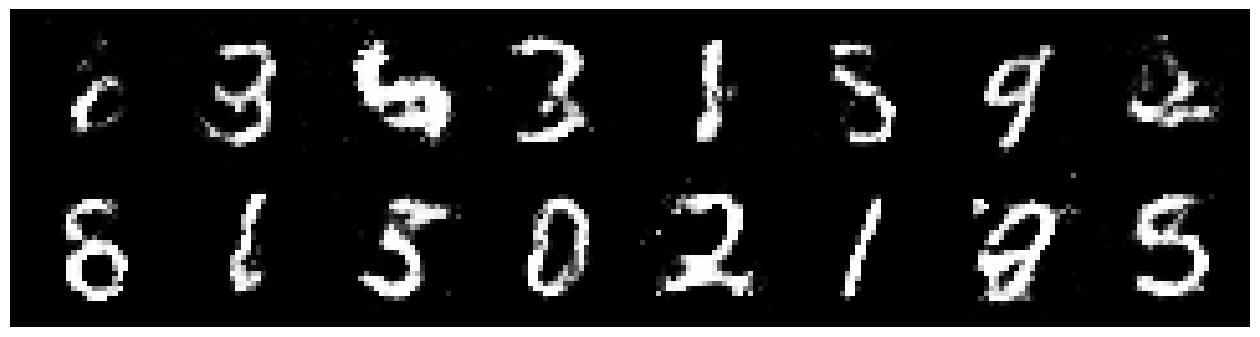

Epoch: [75/200], Batch Num: [599/600]
Discriminator Loss: 1.2534, Generator Loss: 0.9297
D(x): 0.5844, D(G(z)): 0.4625


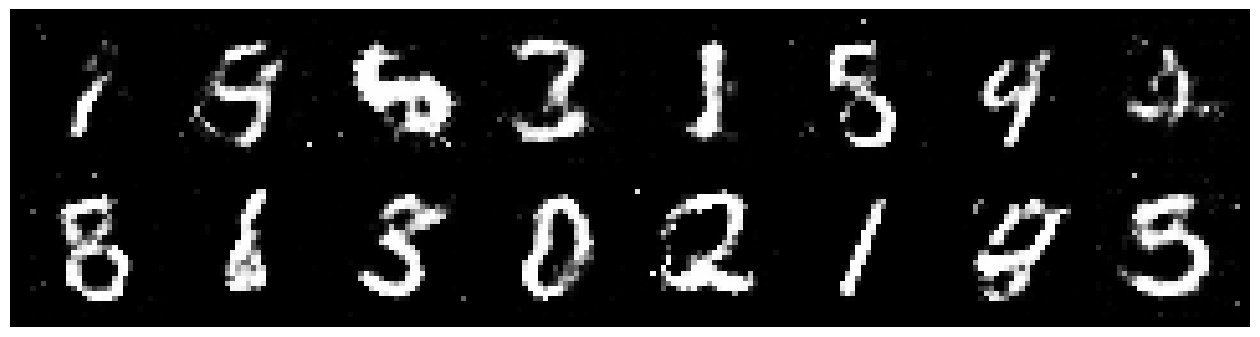

Epoch: [76/200], Batch Num: [599/600]
Discriminator Loss: 1.2995, Generator Loss: 0.9235
D(x): 0.5197, D(G(z)): 0.4290


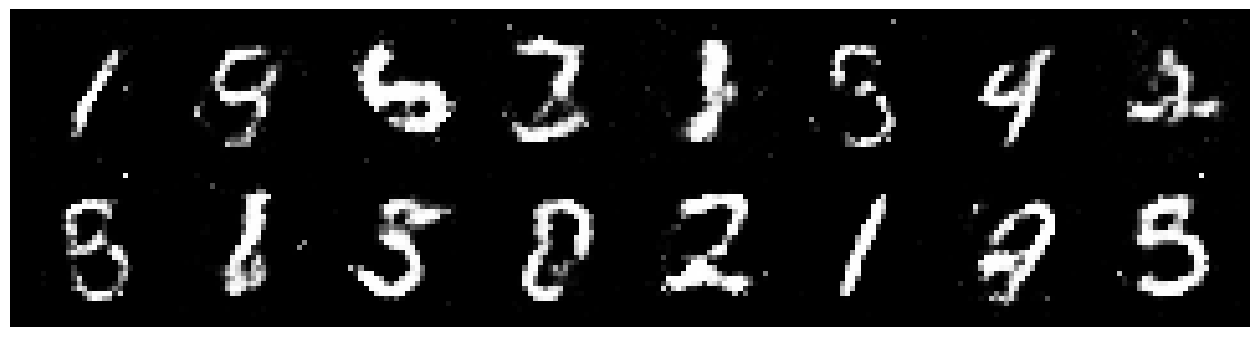

Epoch: [77/200], Batch Num: [599/600]
Discriminator Loss: 1.2118, Generator Loss: 1.0173
D(x): 0.5485, D(G(z)): 0.4078


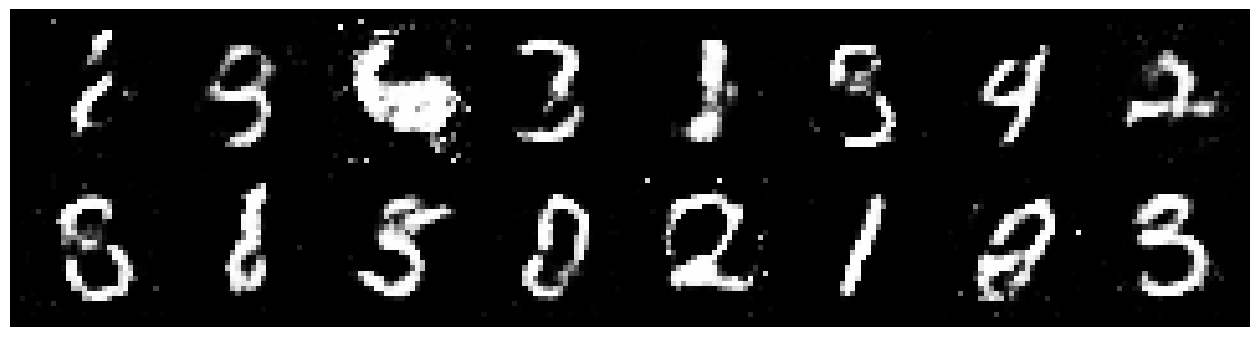

Epoch: [78/200], Batch Num: [599/600]
Discriminator Loss: 1.1602, Generator Loss: 1.0866
D(x): 0.5797, D(G(z)): 0.4009


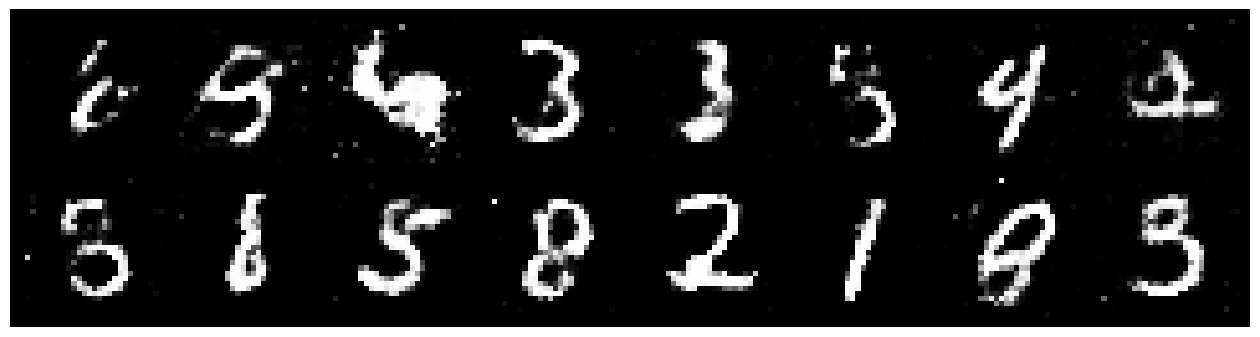

Epoch: [79/200], Batch Num: [599/600]
Discriminator Loss: 1.2210, Generator Loss: 0.9098
D(x): 0.5881, D(G(z)): 0.4540


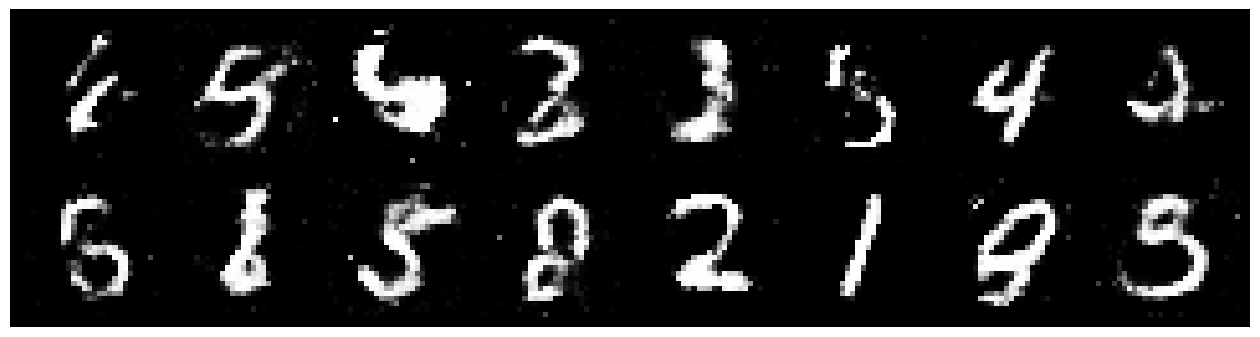

Epoch: [80/200], Batch Num: [599/600]
Discriminator Loss: 1.2232, Generator Loss: 0.8859
D(x): 0.5689, D(G(z)): 0.4383


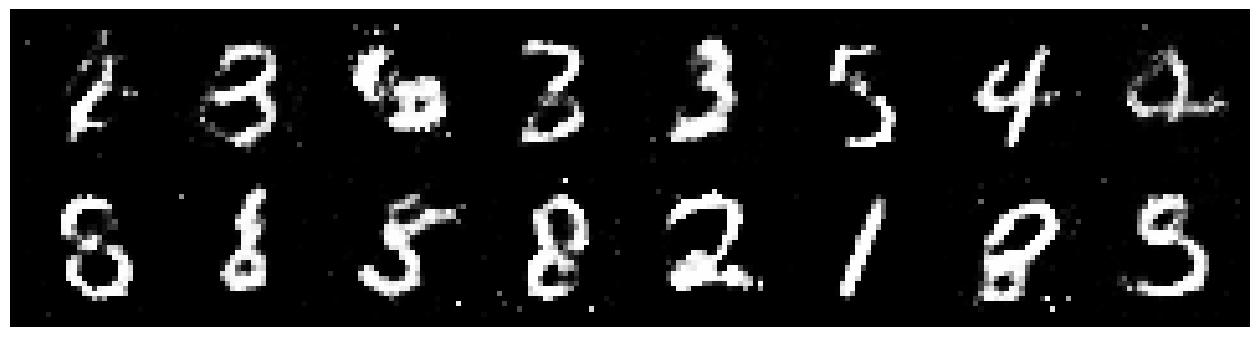

Epoch: [81/200], Batch Num: [599/600]
Discriminator Loss: 1.3573, Generator Loss: 1.0037
D(x): 0.5234, D(G(z)): 0.4300


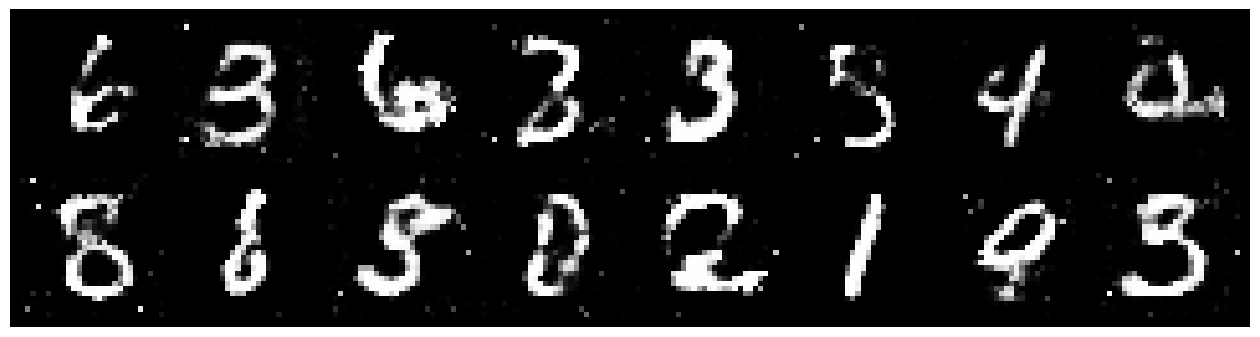

Epoch: [82/200], Batch Num: [599/600]
Discriminator Loss: 1.3153, Generator Loss: 0.8526
D(x): 0.5608, D(G(z)): 0.4464


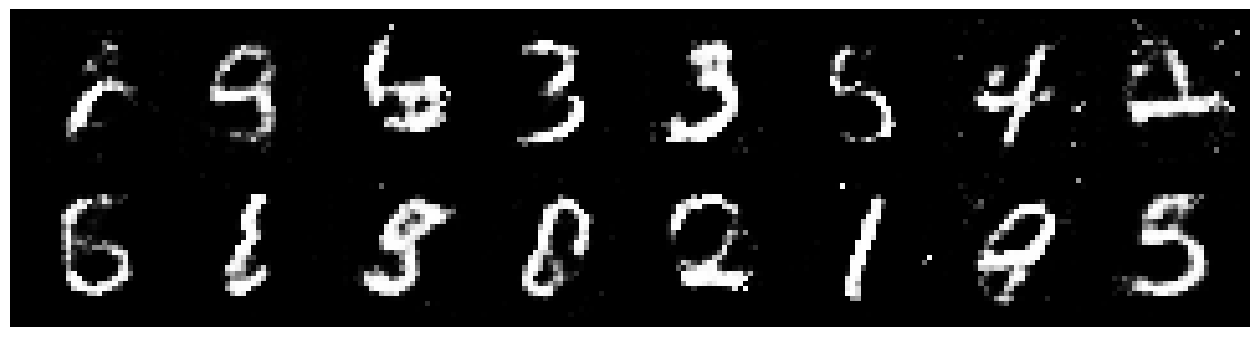

Epoch: [83/200], Batch Num: [599/600]
Discriminator Loss: 1.2667, Generator Loss: 0.8627
D(x): 0.5195, D(G(z)): 0.3967


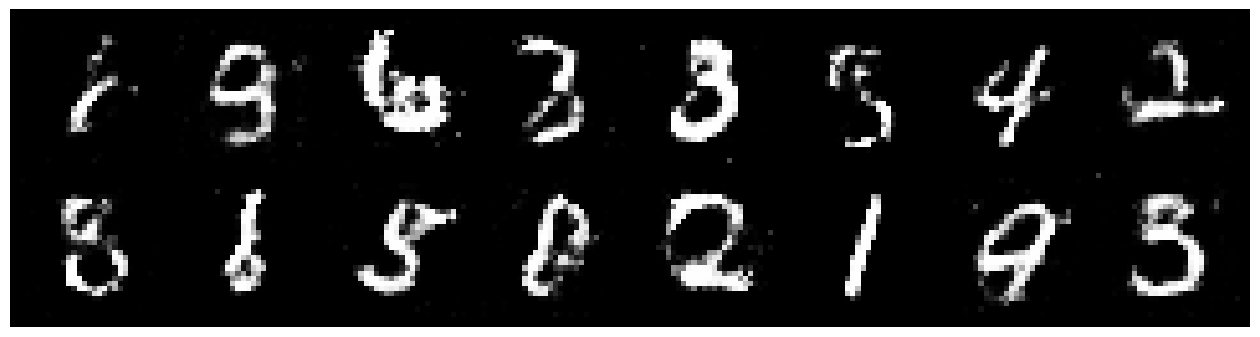

Epoch: [84/200], Batch Num: [599/600]
Discriminator Loss: 1.2989, Generator Loss: 0.8829
D(x): 0.5355, D(G(z)): 0.4528


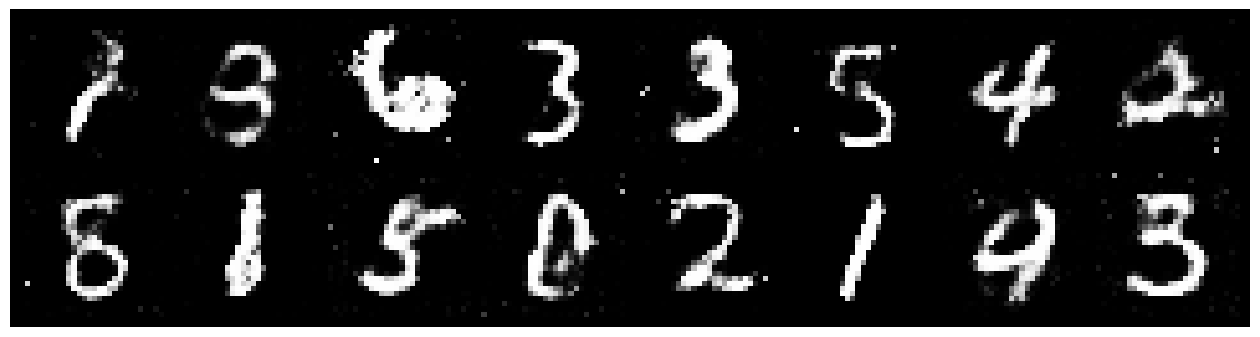

Epoch: [85/200], Batch Num: [599/600]
Discriminator Loss: 1.2422, Generator Loss: 0.8770
D(x): 0.5552, D(G(z)): 0.4422


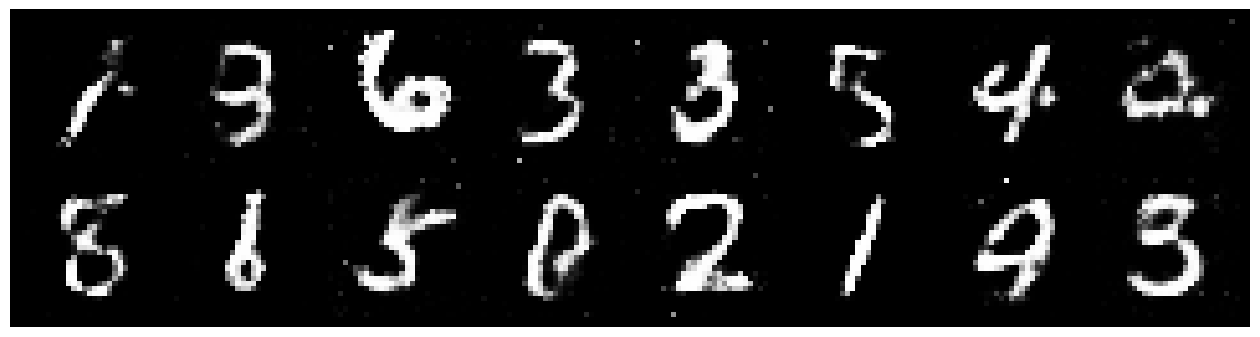

Epoch: [86/200], Batch Num: [599/600]
Discriminator Loss: 1.3638, Generator Loss: 0.9054
D(x): 0.5417, D(G(z)): 0.4266


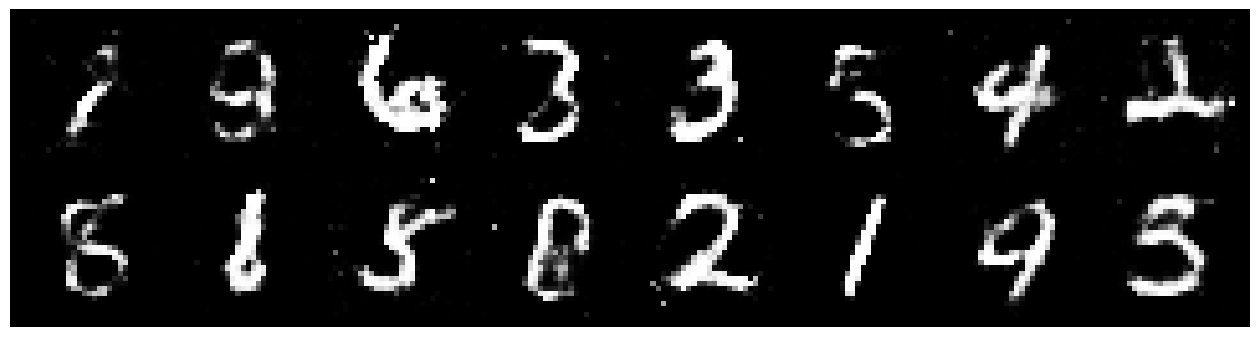

Epoch: [87/200], Batch Num: [599/600]
Discriminator Loss: 1.1490, Generator Loss: 1.0331
D(x): 0.5827, D(G(z)): 0.3898


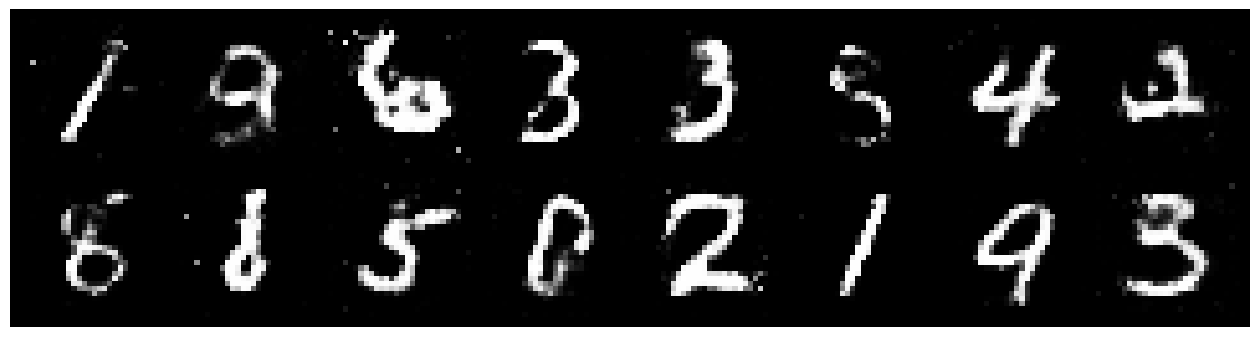

Epoch: [88/200], Batch Num: [599/600]
Discriminator Loss: 1.2874, Generator Loss: 0.8542
D(x): 0.5688, D(G(z)): 0.4723


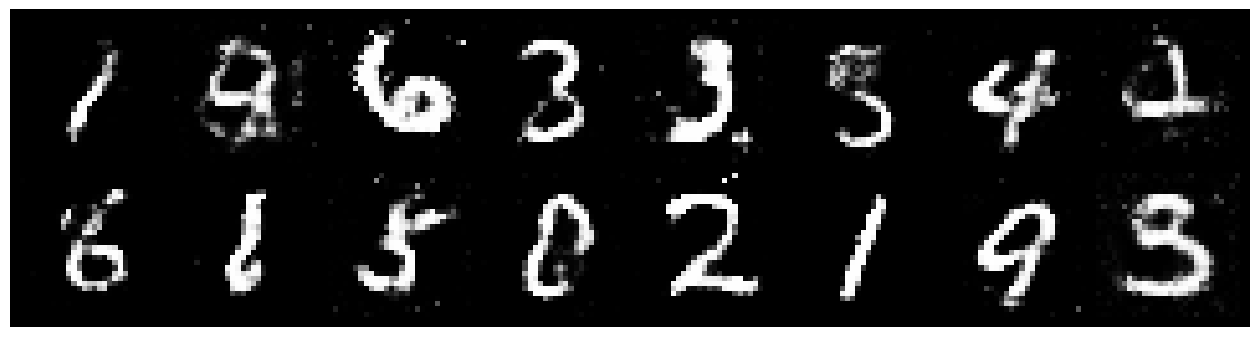

Epoch: [89/200], Batch Num: [599/600]
Discriminator Loss: 1.3181, Generator Loss: 0.8957
D(x): 0.5316, D(G(z)): 0.4417


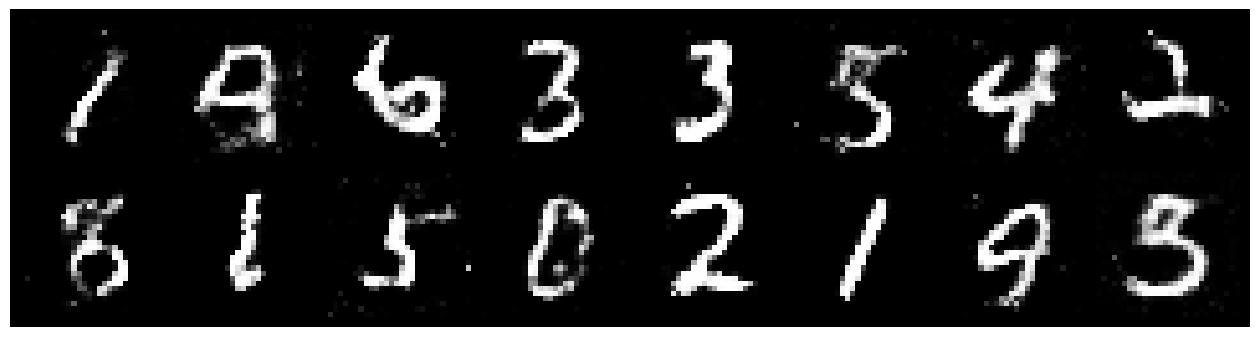

Epoch: [90/200], Batch Num: [599/600]
Discriminator Loss: 1.2489, Generator Loss: 0.9111
D(x): 0.5913, D(G(z)): 0.4375


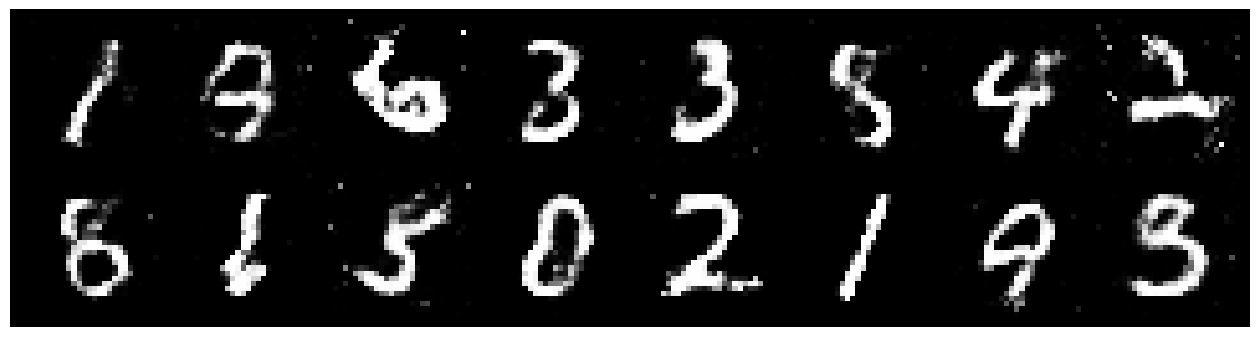

Epoch: [91/200], Batch Num: [599/600]
Discriminator Loss: 1.2404, Generator Loss: 0.8995
D(x): 0.5555, D(G(z)): 0.4363


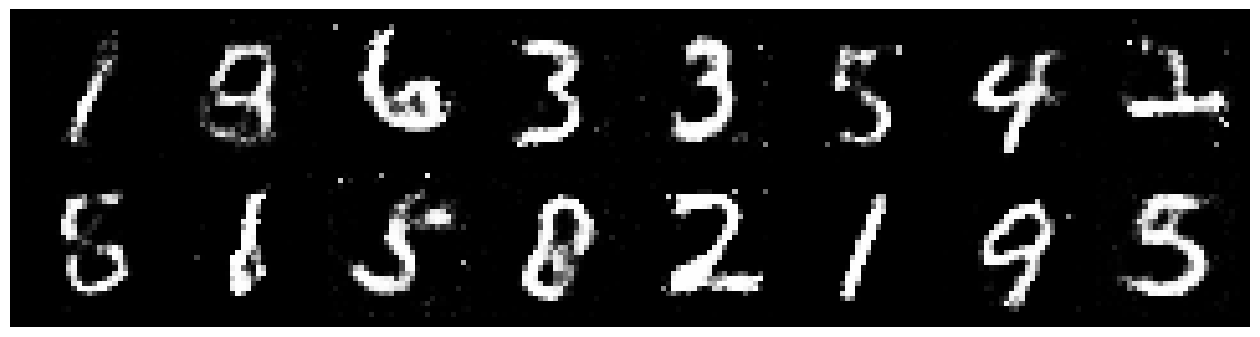

Epoch: [92/200], Batch Num: [599/600]
Discriminator Loss: 1.1924, Generator Loss: 0.9688
D(x): 0.5831, D(G(z)): 0.4326


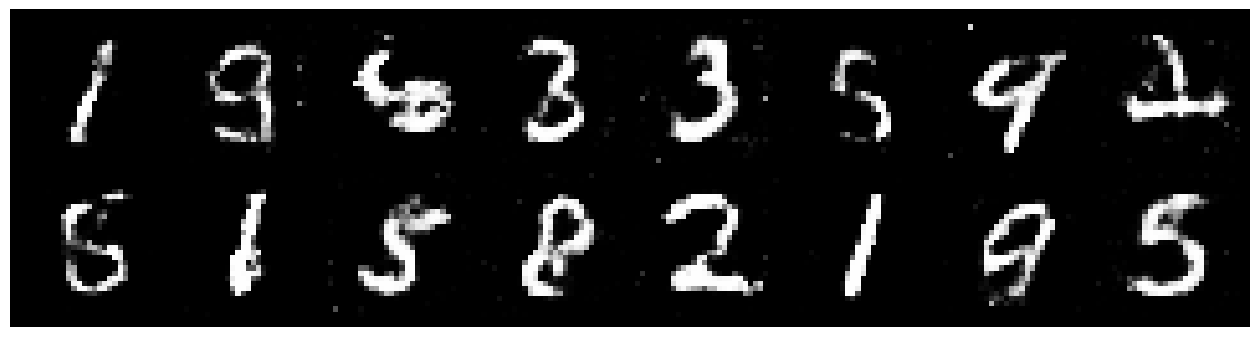

Epoch: [93/200], Batch Num: [599/600]
Discriminator Loss: 1.3147, Generator Loss: 0.8066
D(x): 0.5486, D(G(z)): 0.4765


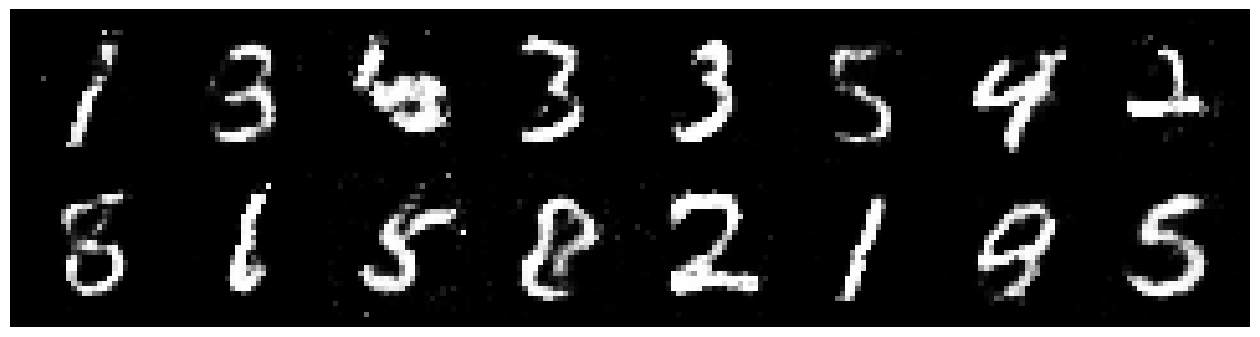

Epoch: [94/200], Batch Num: [599/600]
Discriminator Loss: 1.2166, Generator Loss: 1.0627
D(x): 0.5458, D(G(z)): 0.3892


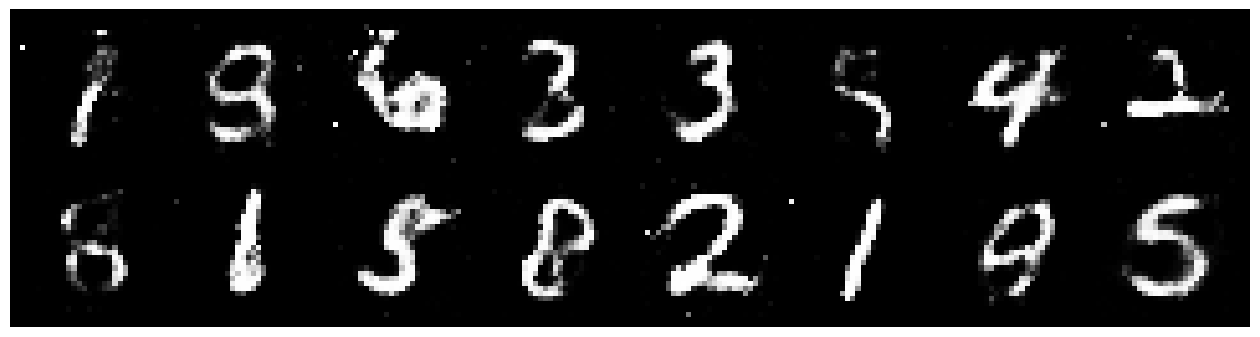

Epoch: [95/200], Batch Num: [599/600]
Discriminator Loss: 1.2176, Generator Loss: 0.8524
D(x): 0.5786, D(G(z)): 0.4546


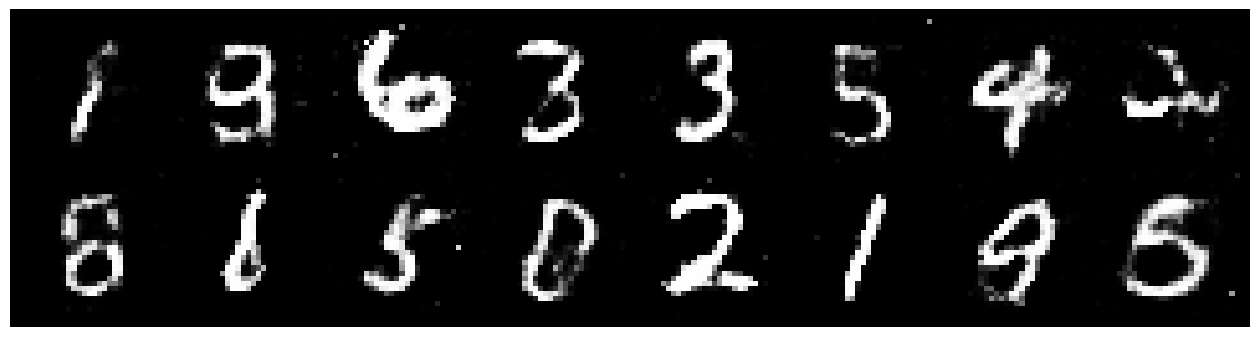

Epoch: [96/200], Batch Num: [599/600]
Discriminator Loss: 1.2816, Generator Loss: 0.7771
D(x): 0.5497, D(G(z)): 0.4467


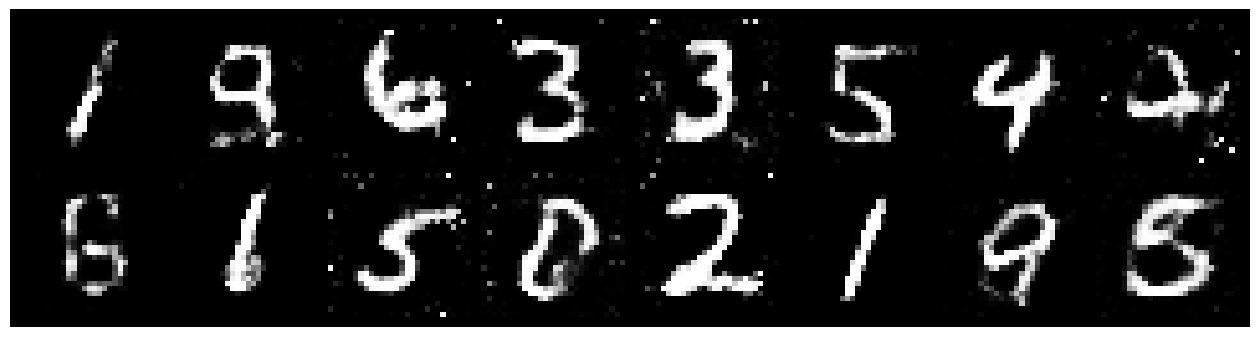

Epoch: [97/200], Batch Num: [599/600]
Discriminator Loss: 1.2705, Generator Loss: 0.8000
D(x): 0.5553, D(G(z)): 0.4589


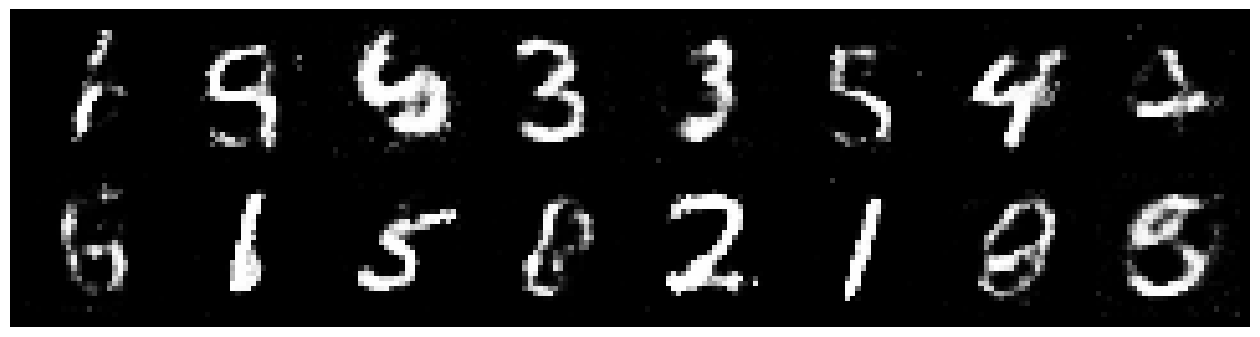

Epoch: [98/200], Batch Num: [599/600]
Discriminator Loss: 1.3042, Generator Loss: 0.9696
D(x): 0.5706, D(G(z)): 0.4520


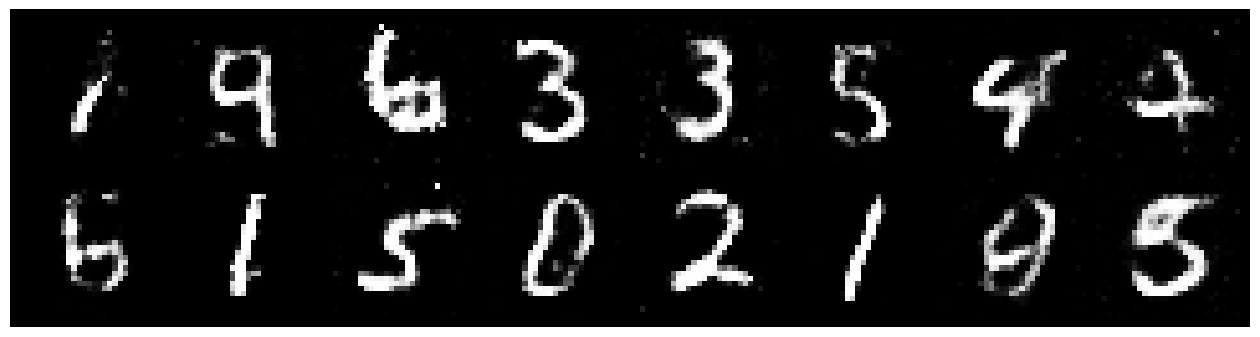

Epoch: [99/200], Batch Num: [599/600]
Discriminator Loss: 1.2991, Generator Loss: 0.9978
D(x): 0.5216, D(G(z)): 0.4170


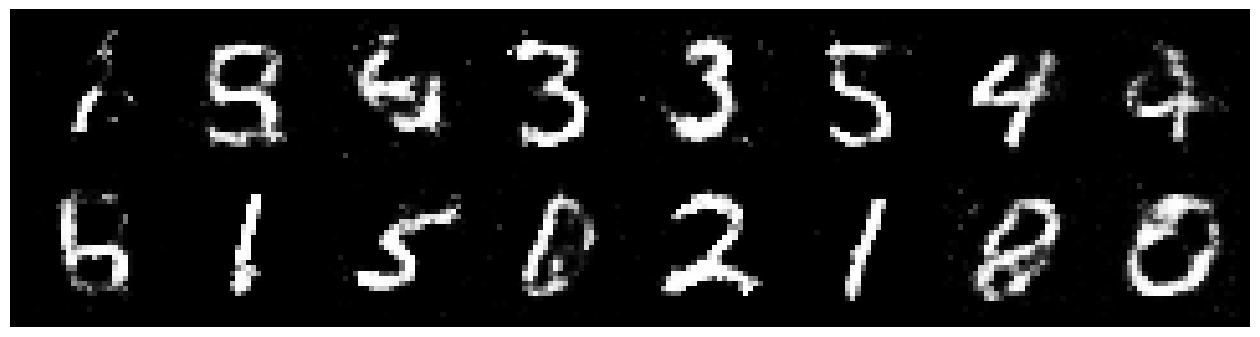

Epoch: [100/200], Batch Num: [599/600]
Discriminator Loss: 1.2893, Generator Loss: 0.9037
D(x): 0.5317, D(G(z)): 0.4414


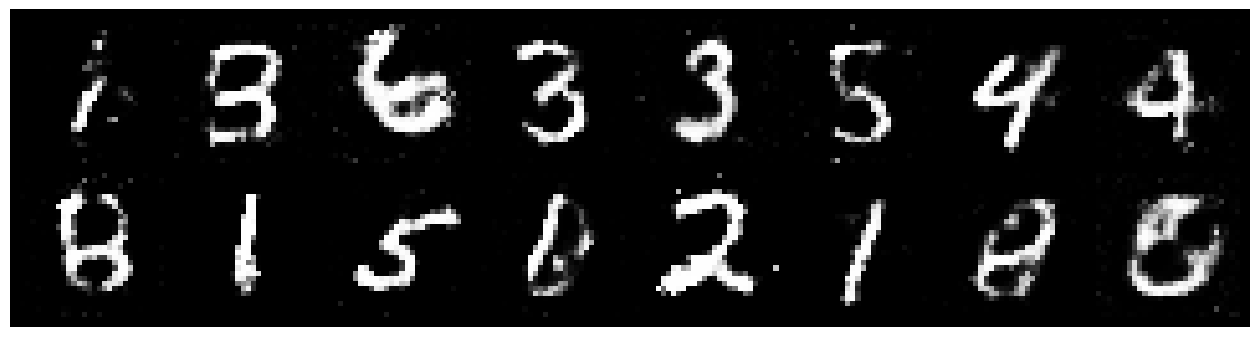

Epoch: [101/200], Batch Num: [599/600]
Discriminator Loss: 1.3013, Generator Loss: 0.8720
D(x): 0.5278, D(G(z)): 0.4282


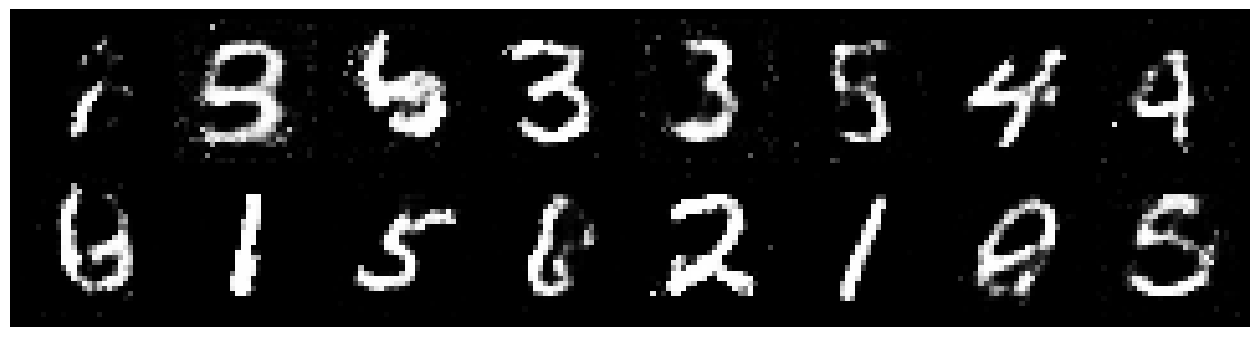

Epoch: [102/200], Batch Num: [599/600]
Discriminator Loss: 1.2782, Generator Loss: 1.0605
D(x): 0.5212, D(G(z)): 0.3847


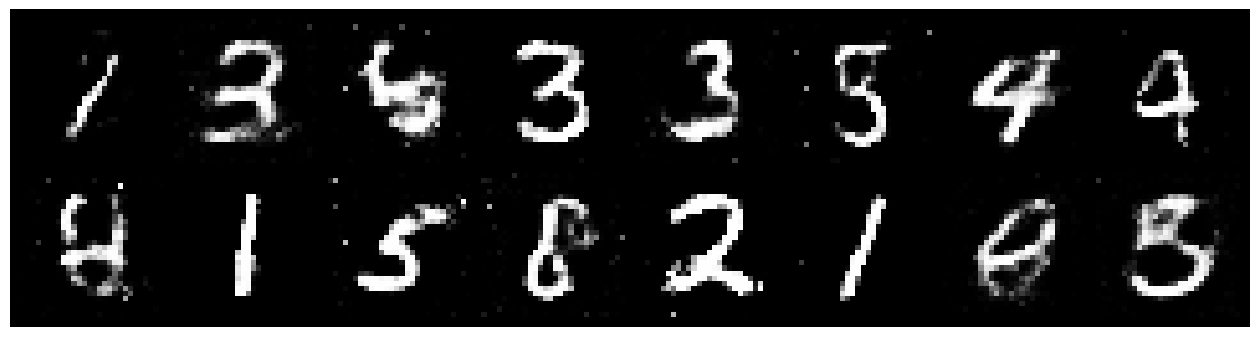

Epoch: [103/200], Batch Num: [599/600]
Discriminator Loss: 1.3139, Generator Loss: 0.8935
D(x): 0.5211, D(G(z)): 0.4293


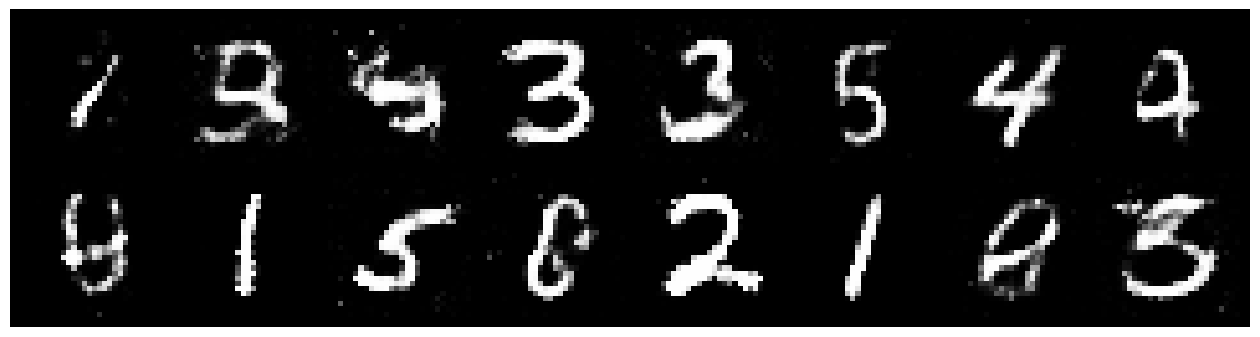

Epoch: [104/200], Batch Num: [599/600]
Discriminator Loss: 1.2092, Generator Loss: 0.9907
D(x): 0.5782, D(G(z)): 0.4228


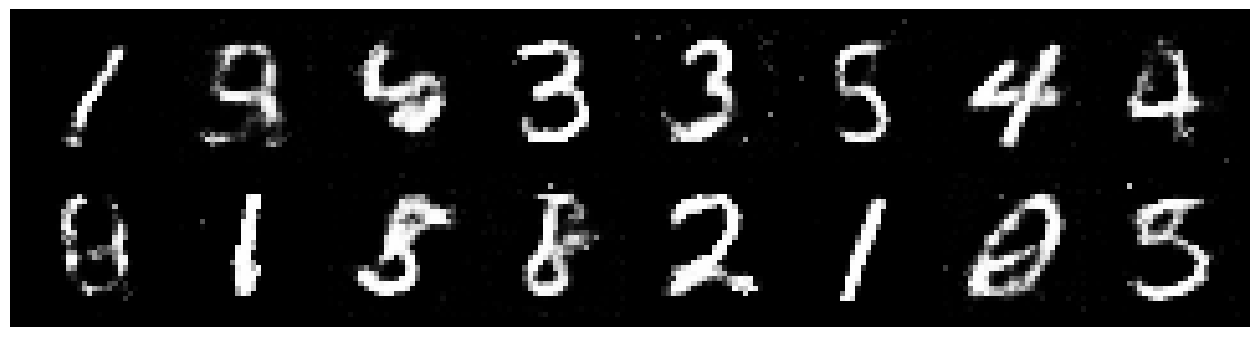

Epoch: [105/200], Batch Num: [599/600]
Discriminator Loss: 1.2529, Generator Loss: 0.9840
D(x): 0.5379, D(G(z)): 0.4021


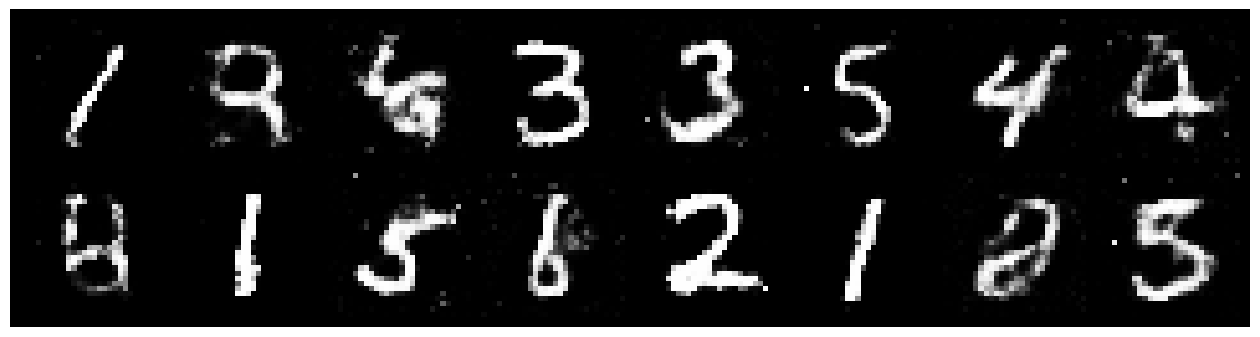

Epoch: [106/200], Batch Num: [599/600]
Discriminator Loss: 1.2376, Generator Loss: 0.8775
D(x): 0.5872, D(G(z)): 0.4589


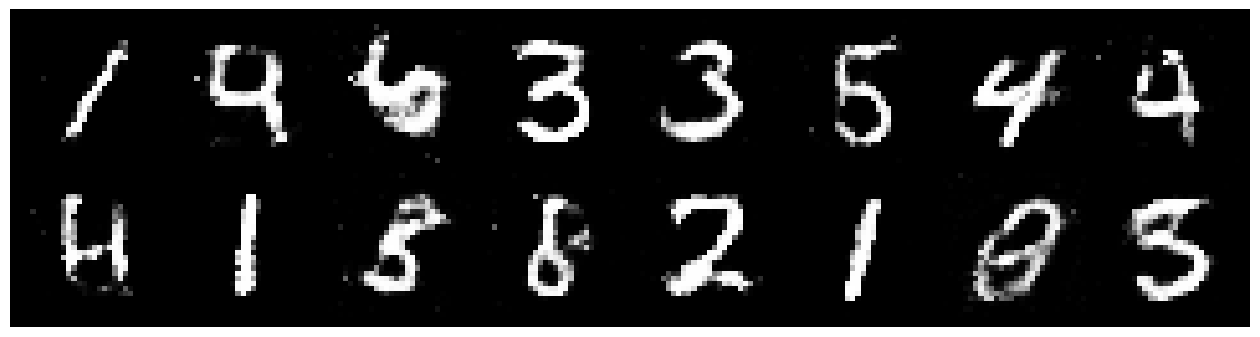

Epoch: [107/200], Batch Num: [599/600]
Discriminator Loss: 1.2037, Generator Loss: 0.8975
D(x): 0.5597, D(G(z)): 0.4132


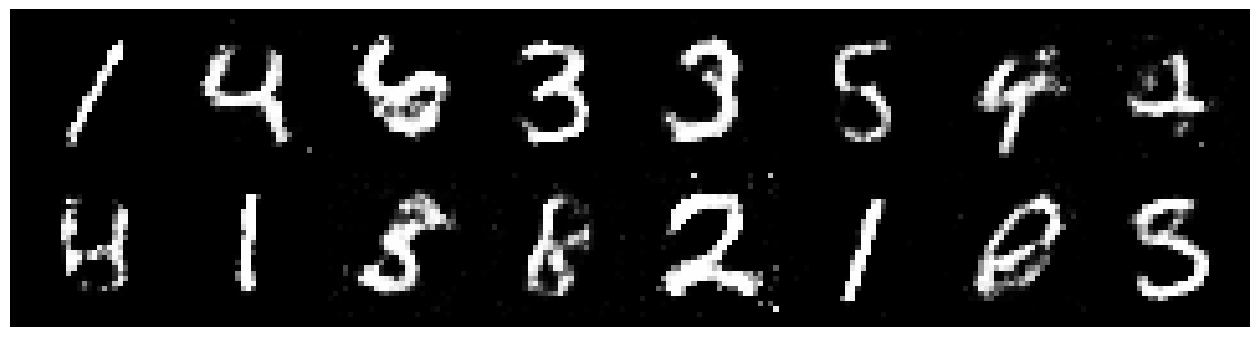

Epoch: [108/200], Batch Num: [599/600]
Discriminator Loss: 1.2553, Generator Loss: 0.8486
D(x): 0.5578, D(G(z)): 0.4405


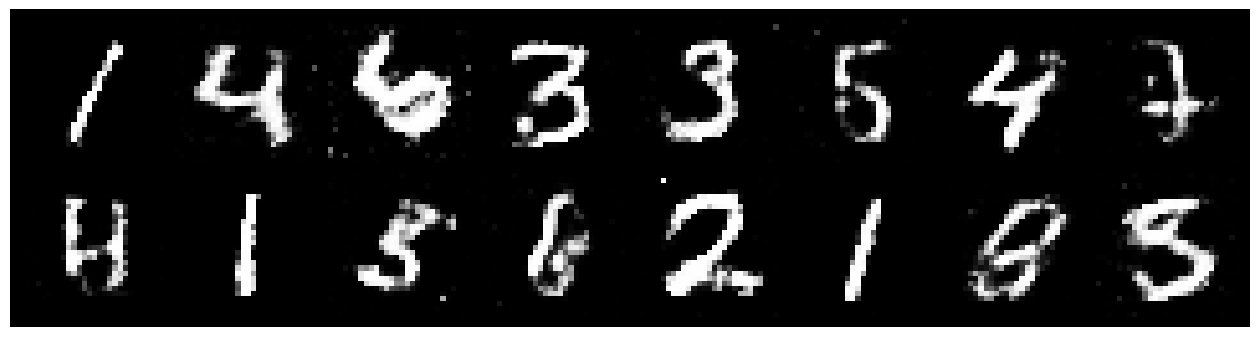

Epoch: [109/200], Batch Num: [599/600]
Discriminator Loss: 1.2246, Generator Loss: 0.8753
D(x): 0.5646, D(G(z)): 0.4041


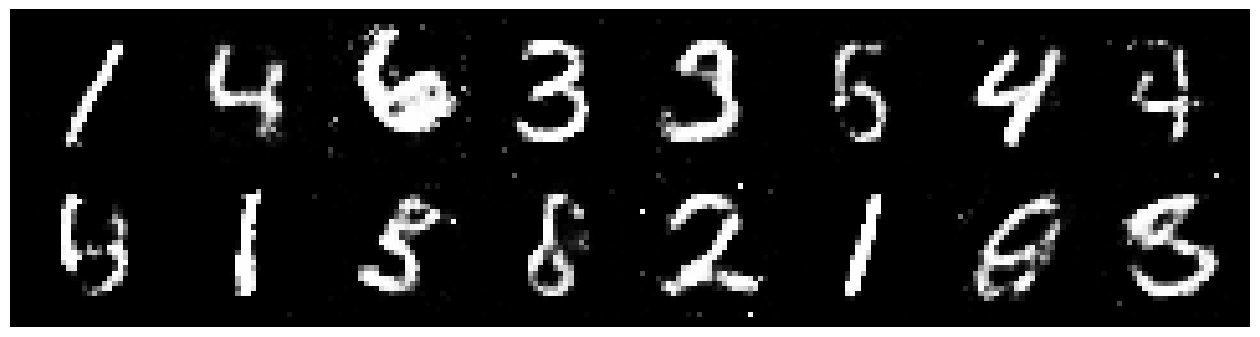

Epoch: [110/200], Batch Num: [599/600]
Discriminator Loss: 1.2357, Generator Loss: 0.8038
D(x): 0.5845, D(G(z)): 0.4449


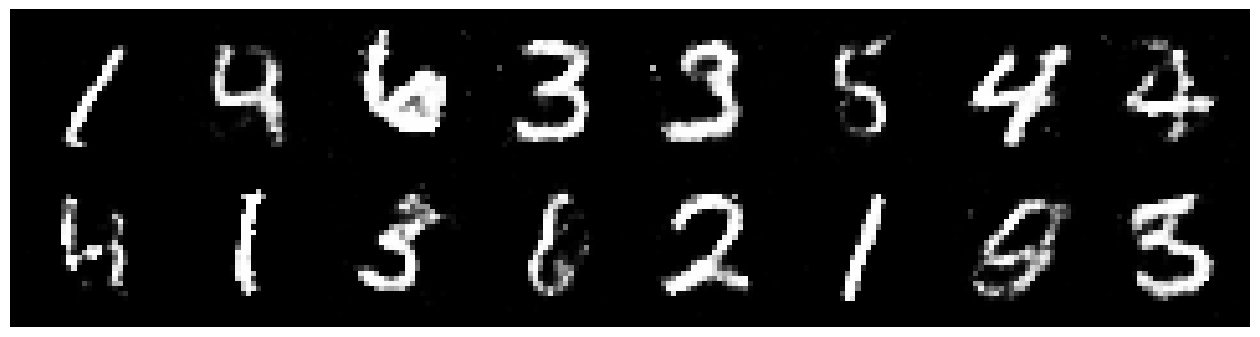

Epoch: [111/200], Batch Num: [599/600]
Discriminator Loss: 1.4631, Generator Loss: 0.7167
D(x): 0.5680, D(G(z)): 0.5328


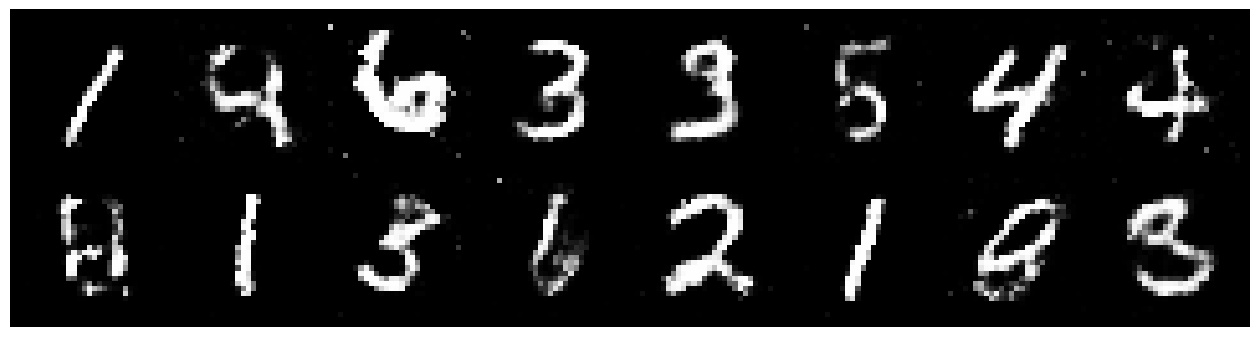

Epoch: [112/200], Batch Num: [599/600]
Discriminator Loss: 1.2072, Generator Loss: 0.8783
D(x): 0.5794, D(G(z)): 0.4438


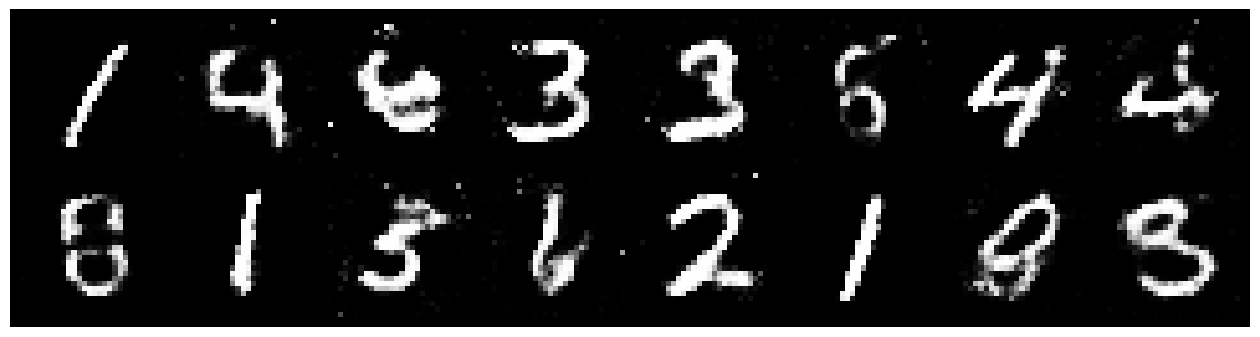

Epoch: [113/200], Batch Num: [599/600]
Discriminator Loss: 1.2606, Generator Loss: 0.8271
D(x): 0.5507, D(G(z)): 0.4519


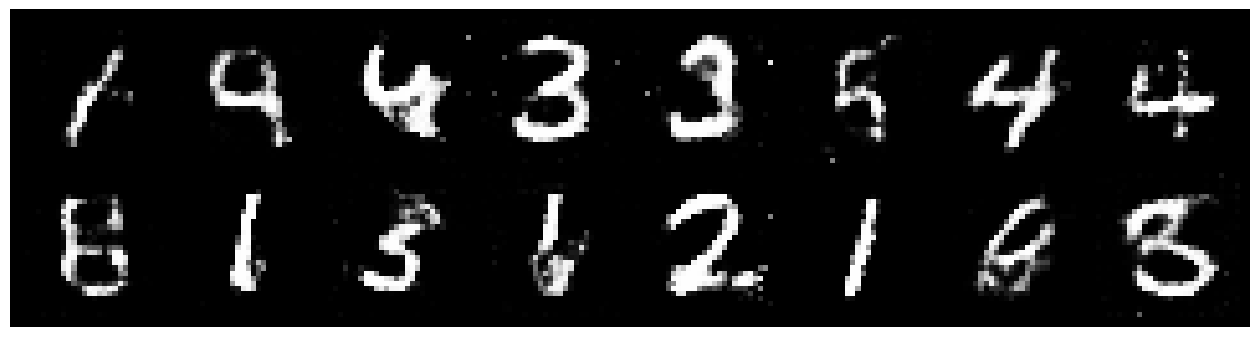

Epoch: [114/200], Batch Num: [599/600]
Discriminator Loss: 1.2376, Generator Loss: 1.0463
D(x): 0.5425, D(G(z)): 0.4209


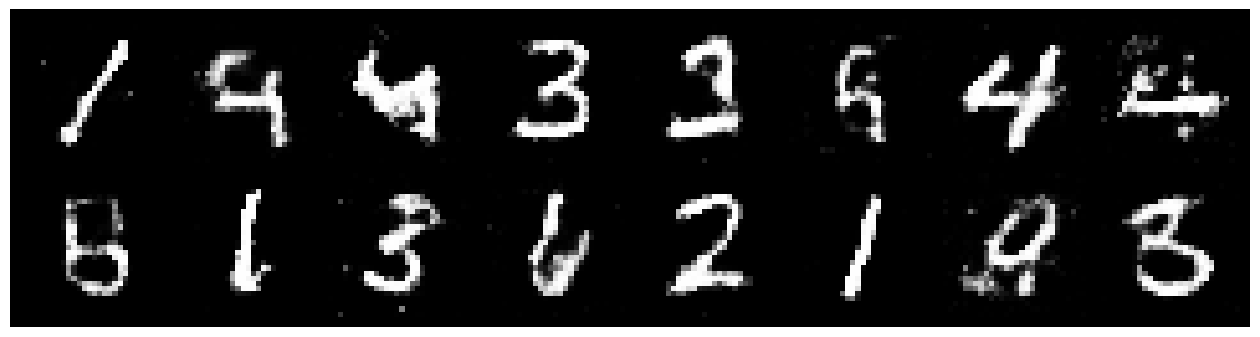

Epoch: [115/200], Batch Num: [599/600]
Discriminator Loss: 1.3179, Generator Loss: 0.7977
D(x): 0.5064, D(G(z)): 0.4392


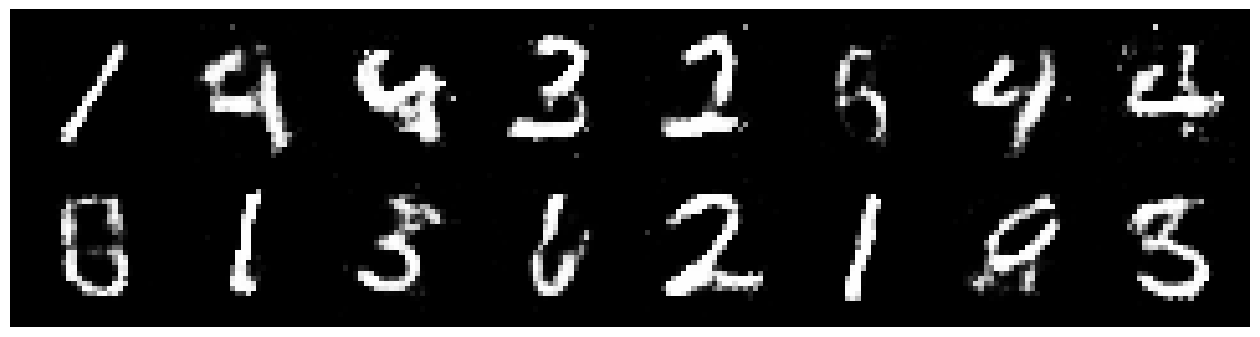

Epoch: [116/200], Batch Num: [599/600]
Discriminator Loss: 1.3137, Generator Loss: 0.9163
D(x): 0.4962, D(G(z)): 0.4299


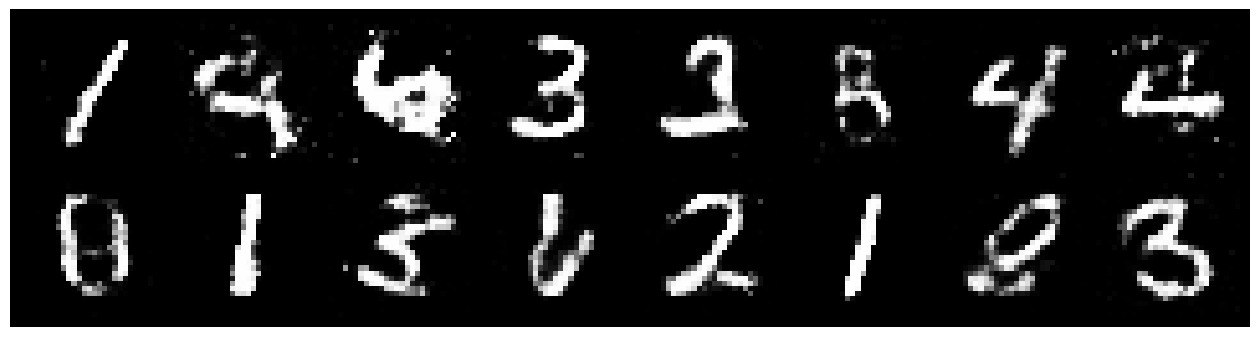

Epoch: [117/200], Batch Num: [599/600]
Discriminator Loss: 1.3645, Generator Loss: 0.9969
D(x): 0.5440, D(G(z)): 0.4701


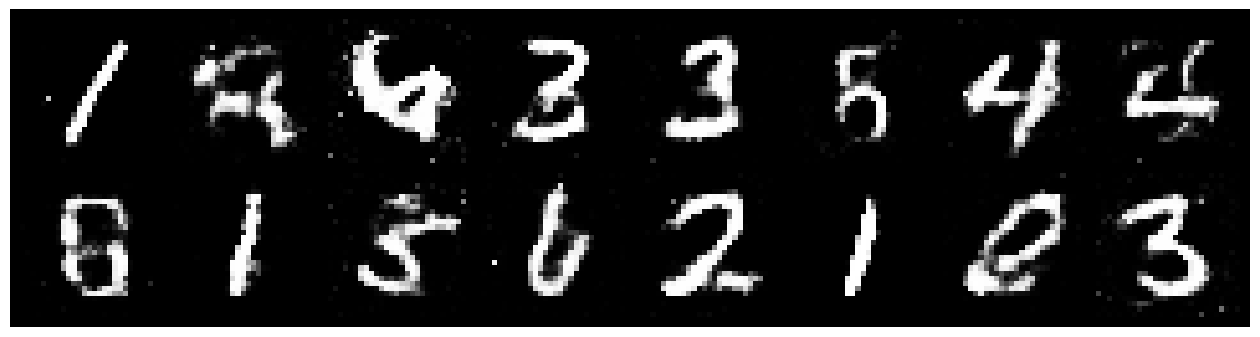

Epoch: [118/200], Batch Num: [599/600]
Discriminator Loss: 1.3321, Generator Loss: 0.7991
D(x): 0.5364, D(G(z)): 0.4568


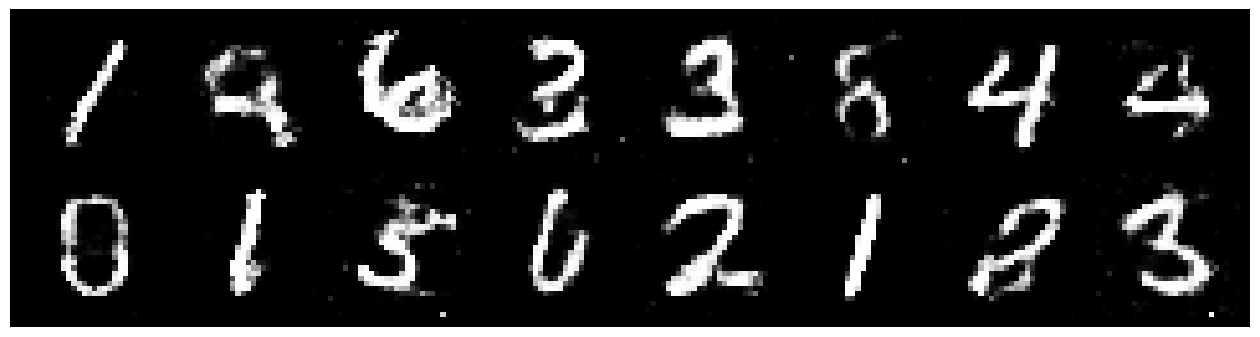

Epoch: [119/200], Batch Num: [599/600]
Discriminator Loss: 1.1517, Generator Loss: 0.9940
D(x): 0.5901, D(G(z)): 0.4217


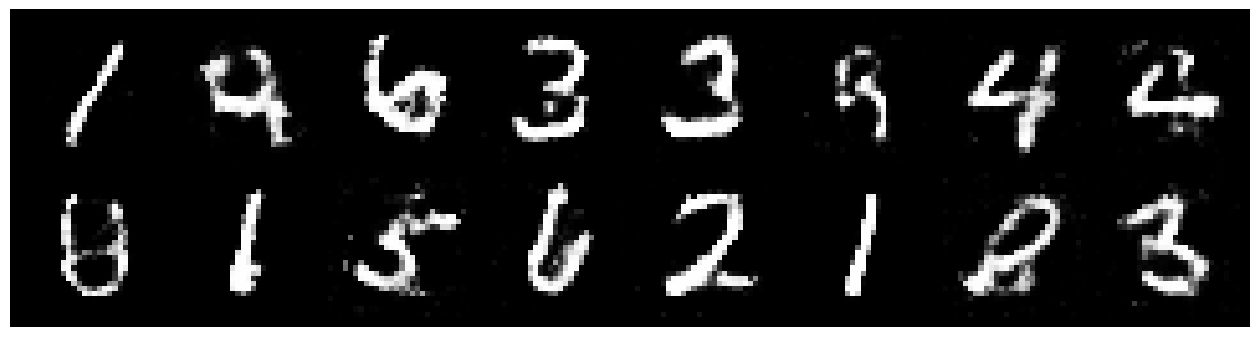

Epoch: [120/200], Batch Num: [599/600]
Discriminator Loss: 1.2412, Generator Loss: 0.7906
D(x): 0.5657, D(G(z)): 0.4417


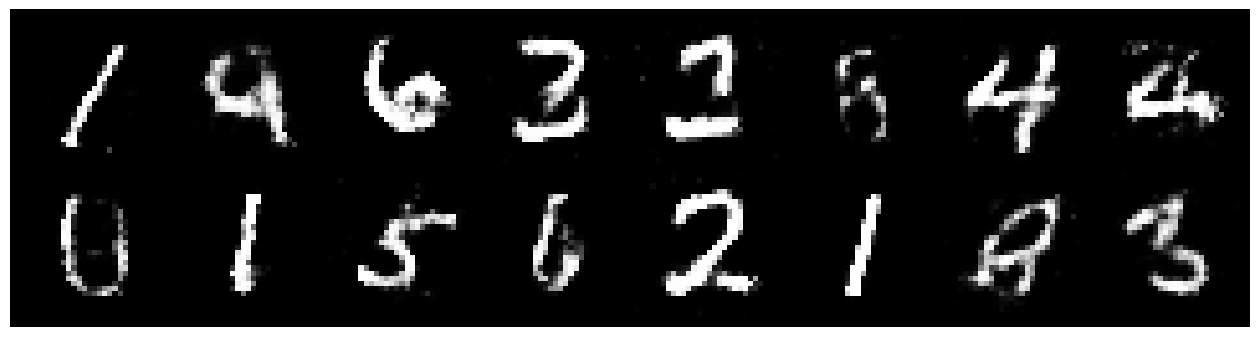

Epoch: [121/200], Batch Num: [599/600]
Discriminator Loss: 1.3183, Generator Loss: 0.7971
D(x): 0.5491, D(G(z)): 0.4743


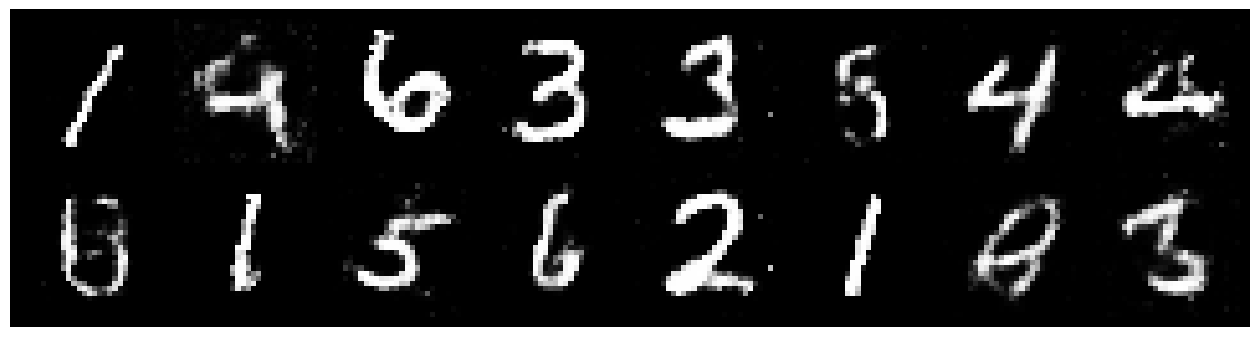

Epoch: [122/200], Batch Num: [599/600]
Discriminator Loss: 1.2409, Generator Loss: 0.9131
D(x): 0.5195, D(G(z)): 0.4056


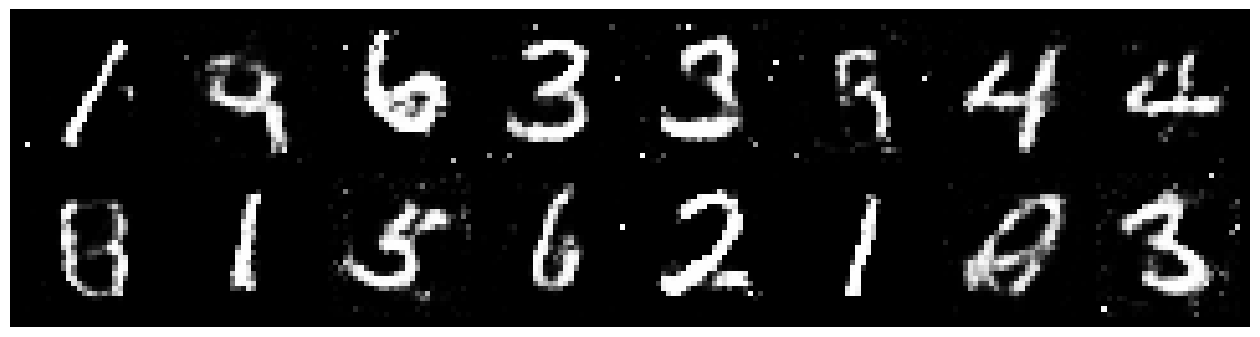

Epoch: [123/200], Batch Num: [599/600]
Discriminator Loss: 1.2278, Generator Loss: 0.9127
D(x): 0.5650, D(G(z)): 0.4275


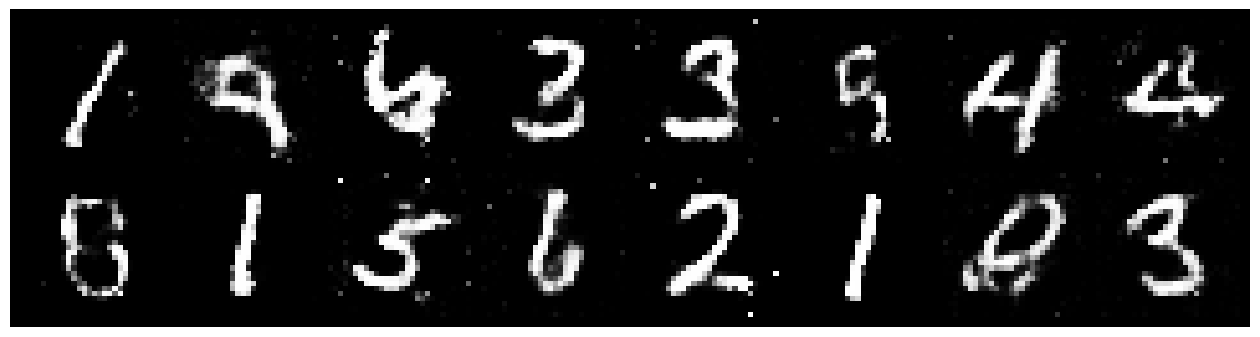

Epoch: [124/200], Batch Num: [599/600]
Discriminator Loss: 1.2331, Generator Loss: 1.0028
D(x): 0.5943, D(G(z)): 0.4472


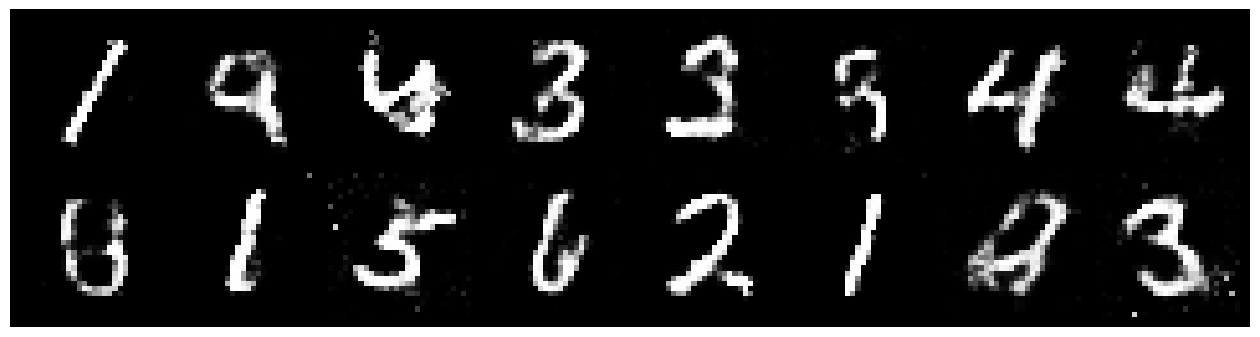

Epoch: [125/200], Batch Num: [599/600]
Discriminator Loss: 1.2123, Generator Loss: 0.8777
D(x): 0.5545, D(G(z)): 0.4157


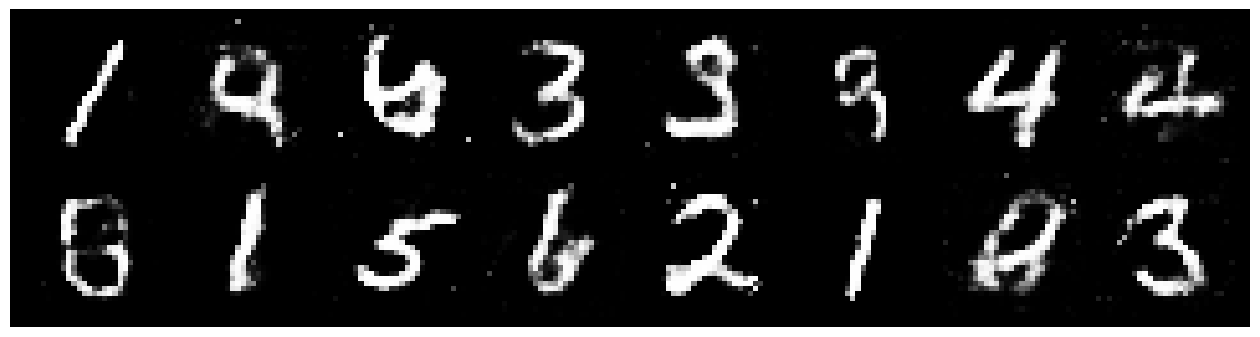

Epoch: [126/200], Batch Num: [599/600]
Discriminator Loss: 1.2200, Generator Loss: 0.9399
D(x): 0.5736, D(G(z)): 0.4364


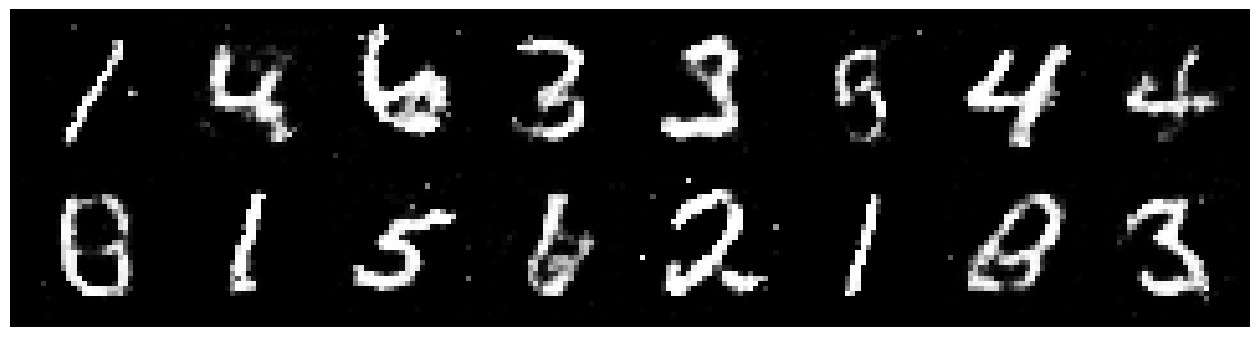

Epoch: [127/200], Batch Num: [599/600]
Discriminator Loss: 1.2363, Generator Loss: 0.8376
D(x): 0.5441, D(G(z)): 0.4360


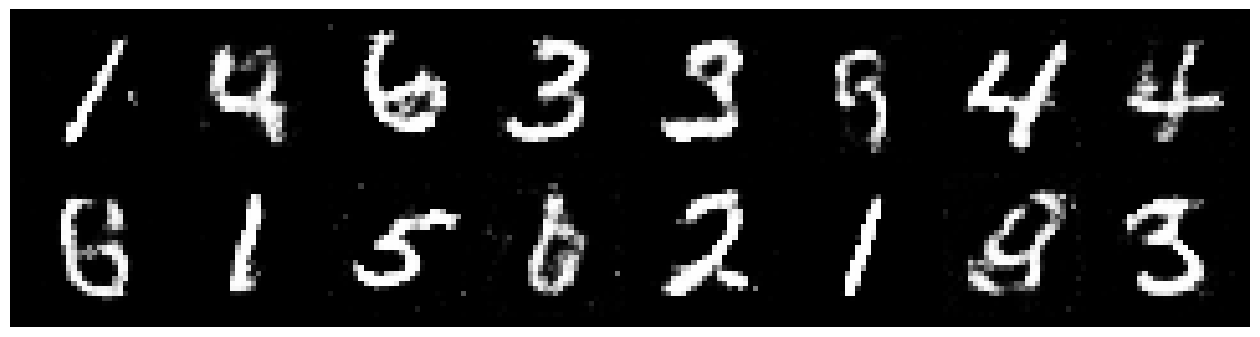

Epoch: [128/200], Batch Num: [599/600]
Discriminator Loss: 1.3589, Generator Loss: 0.9183
D(x): 0.5343, D(G(z)): 0.4641


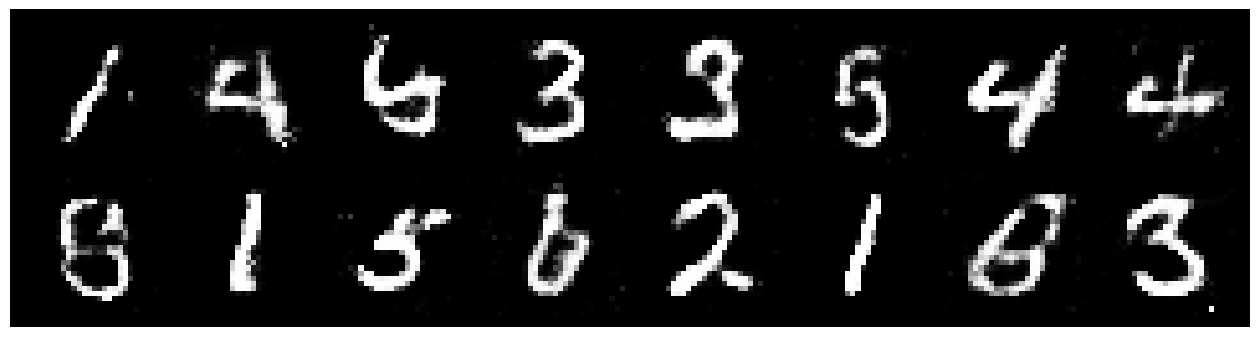

Epoch: [129/200], Batch Num: [599/600]
Discriminator Loss: 1.1825, Generator Loss: 0.9116
D(x): 0.5830, D(G(z)): 0.4414


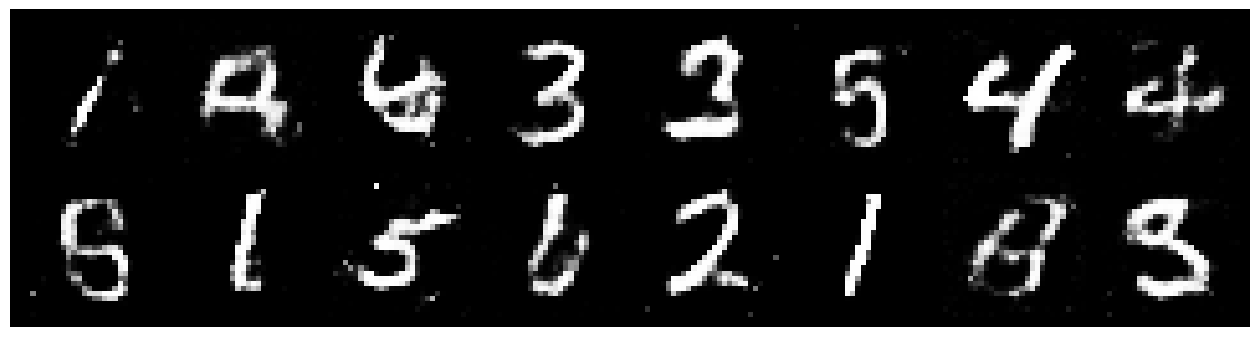

Epoch: [130/200], Batch Num: [599/600]
Discriminator Loss: 1.1472, Generator Loss: 0.9125
D(x): 0.6122, D(G(z)): 0.4418


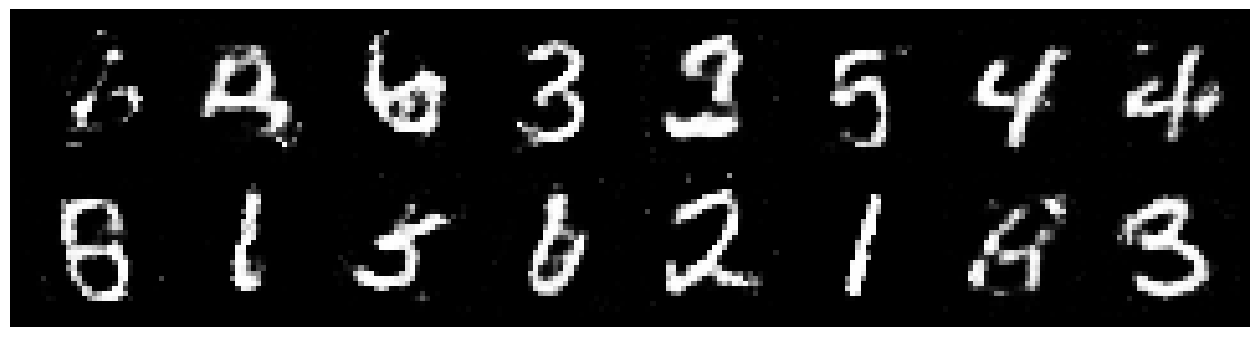

Epoch: [131/200], Batch Num: [599/600]
Discriminator Loss: 1.3280, Generator Loss: 0.8273
D(x): 0.5724, D(G(z)): 0.5001


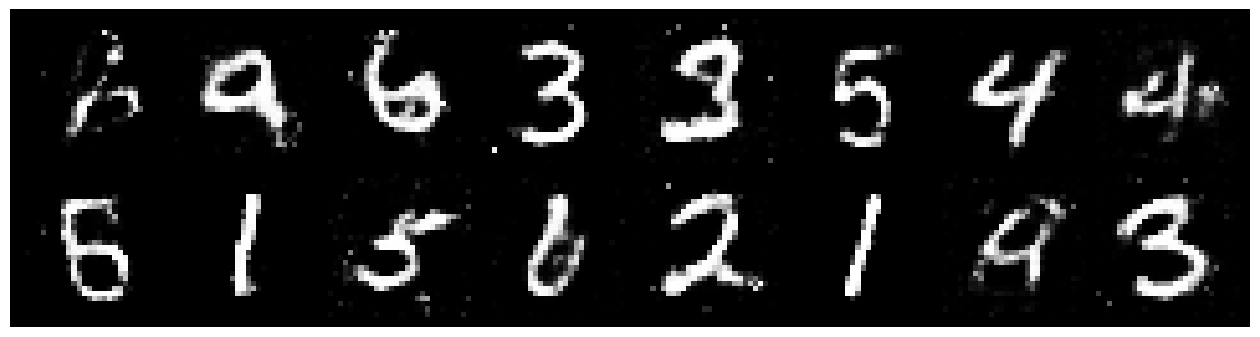

Epoch: [132/200], Batch Num: [599/600]
Discriminator Loss: 1.2420, Generator Loss: 0.9238
D(x): 0.5572, D(G(z)): 0.4460


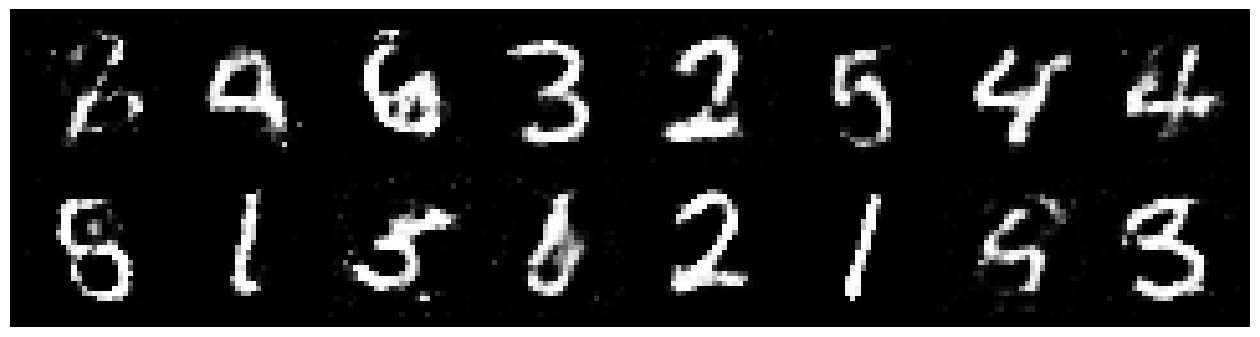

Epoch: [133/200], Batch Num: [599/600]
Discriminator Loss: 1.3270, Generator Loss: 0.8817
D(x): 0.4993, D(G(z)): 0.4362


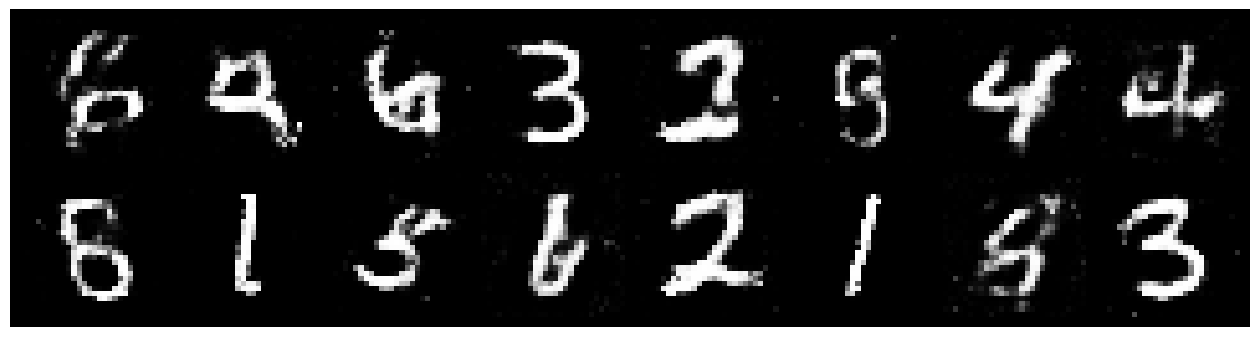

Epoch: [134/200], Batch Num: [599/600]
Discriminator Loss: 1.3171, Generator Loss: 0.8195
D(x): 0.5485, D(G(z)): 0.4672


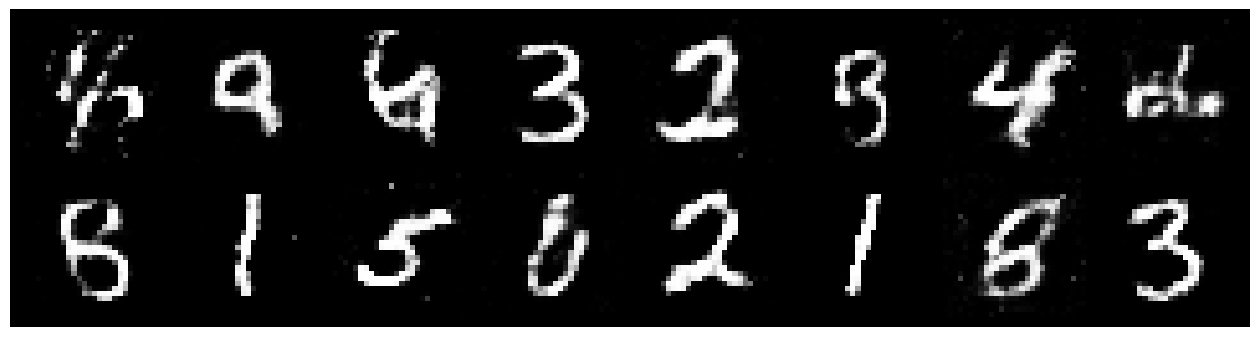

Epoch: [135/200], Batch Num: [599/600]
Discriminator Loss: 1.2423, Generator Loss: 0.8021
D(x): 0.5517, D(G(z)): 0.4528


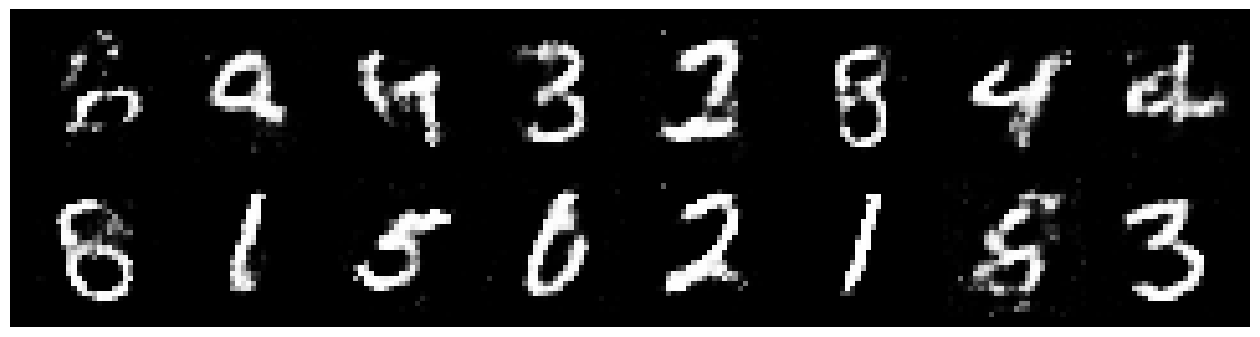

Epoch: [136/200], Batch Num: [599/600]
Discriminator Loss: 1.4051, Generator Loss: 0.7665
D(x): 0.5635, D(G(z)): 0.5099


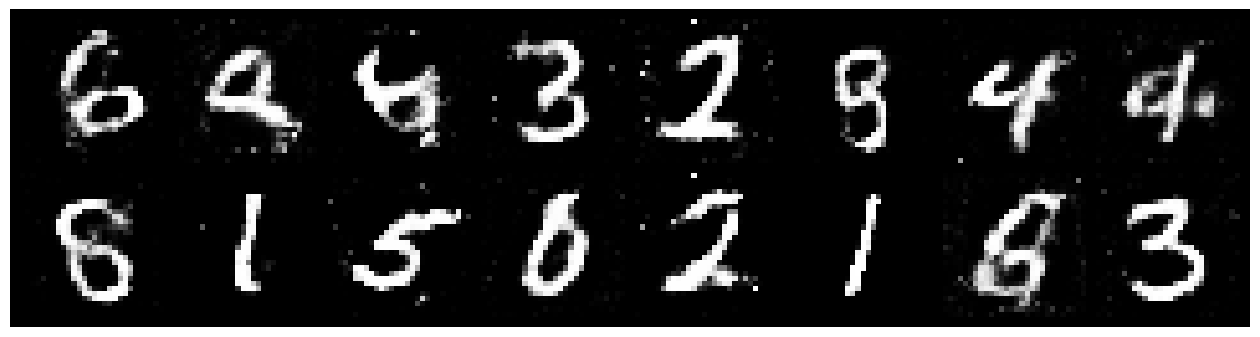

Epoch: [137/200], Batch Num: [599/600]
Discriminator Loss: 1.3051, Generator Loss: 0.8898
D(x): 0.5849, D(G(z)): 0.4649


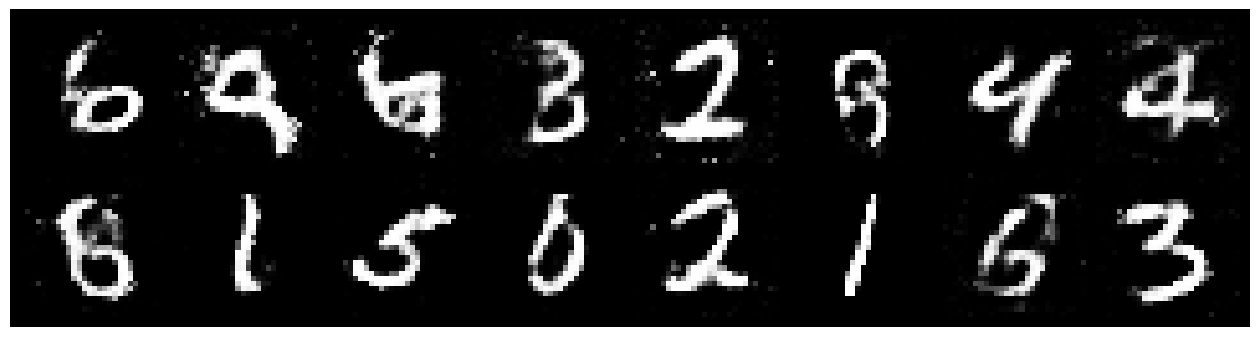

Epoch: [138/200], Batch Num: [599/600]
Discriminator Loss: 1.2434, Generator Loss: 0.9056
D(x): 0.5346, D(G(z)): 0.4274


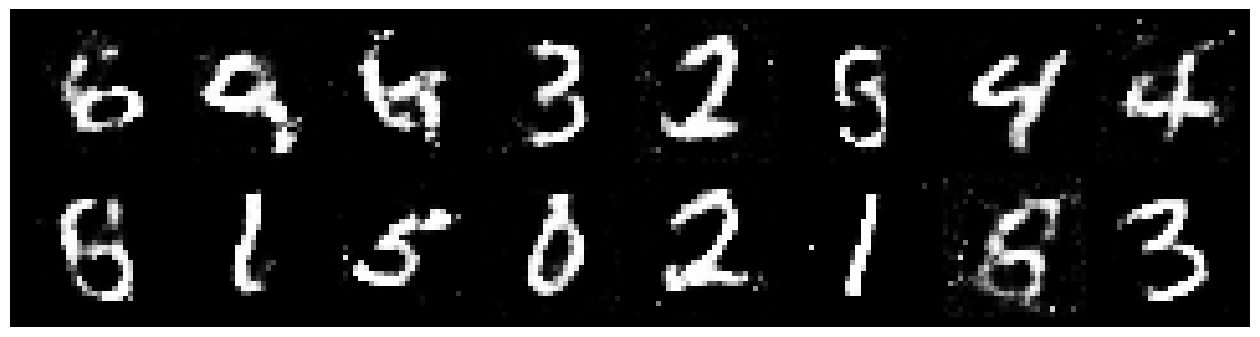

Epoch: [139/200], Batch Num: [599/600]
Discriminator Loss: 1.2748, Generator Loss: 0.9380
D(x): 0.5136, D(G(z)): 0.4051


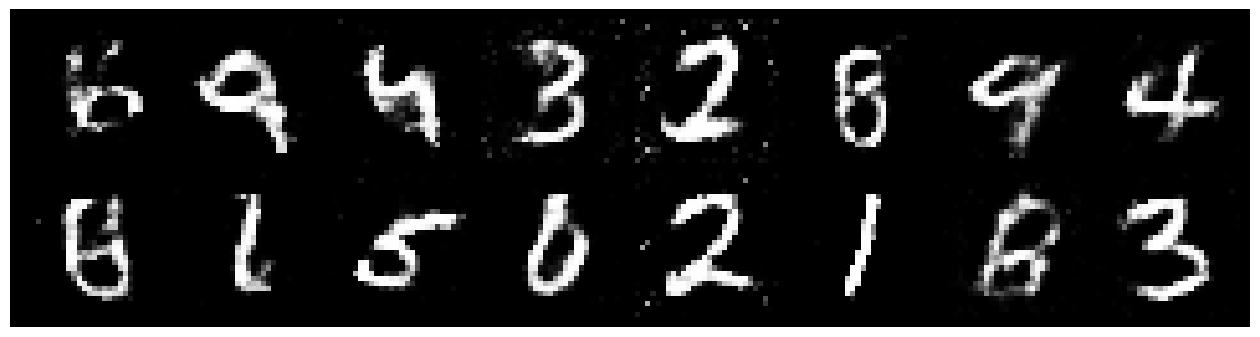

Epoch: [140/200], Batch Num: [599/600]
Discriminator Loss: 1.2892, Generator Loss: 0.8486
D(x): 0.5159, D(G(z)): 0.4280


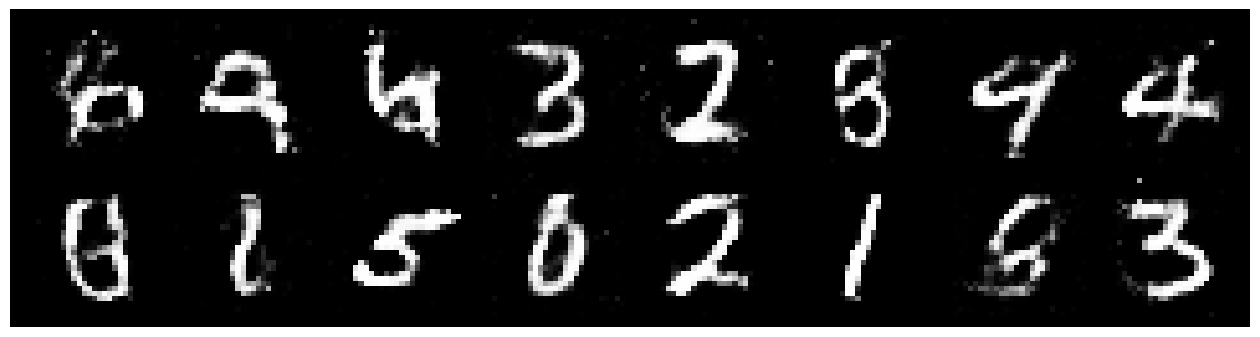

Epoch: [141/200], Batch Num: [599/600]
Discriminator Loss: 1.3478, Generator Loss: 0.8597
D(x): 0.5310, D(G(z)): 0.4680


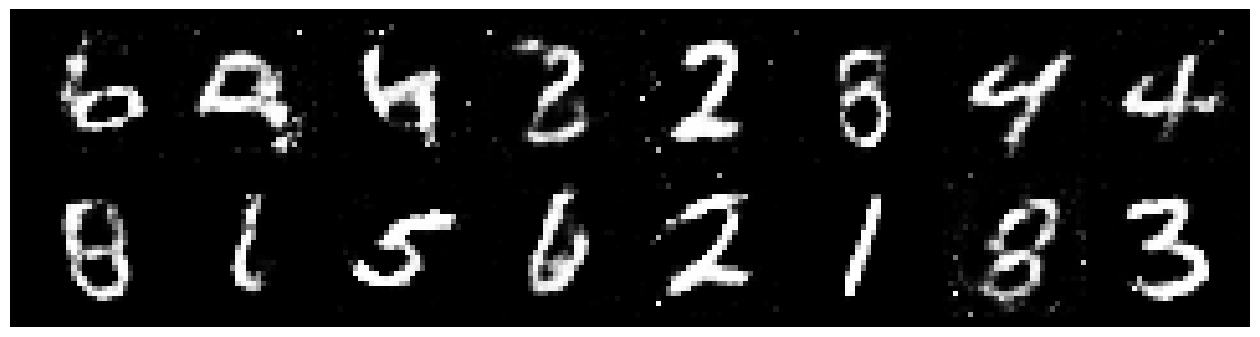

Epoch: [142/200], Batch Num: [599/600]
Discriminator Loss: 1.3391, Generator Loss: 0.8416
D(x): 0.5396, D(G(z)): 0.4724


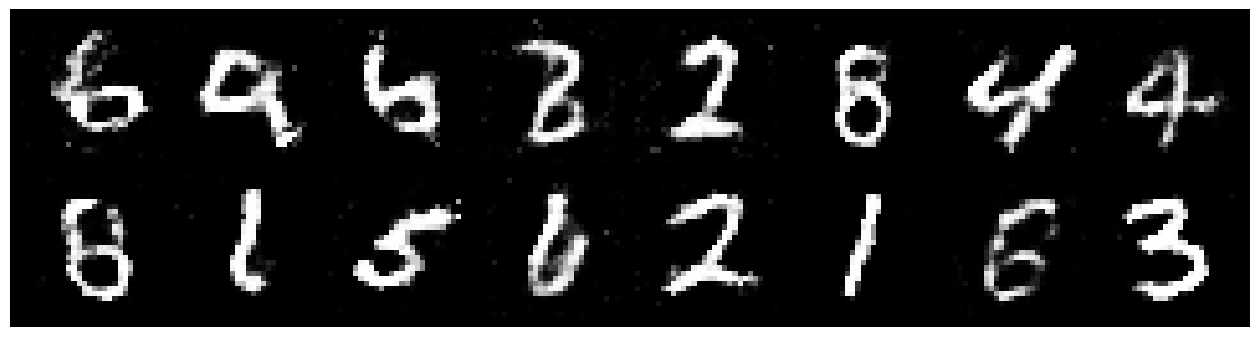

Epoch: [143/200], Batch Num: [599/600]
Discriminator Loss: 1.2555, Generator Loss: 0.8994
D(x): 0.5393, D(G(z)): 0.4229


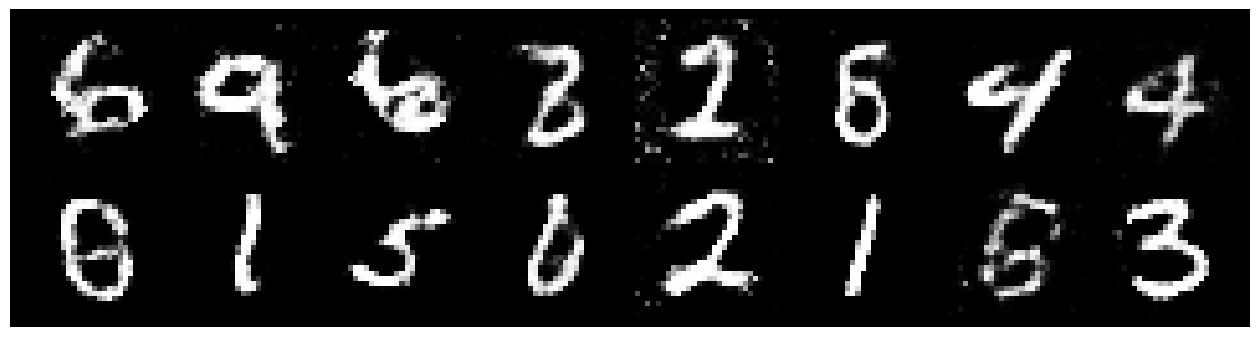

Epoch: [144/200], Batch Num: [599/600]
Discriminator Loss: 1.2228, Generator Loss: 0.9633
D(x): 0.5596, D(G(z)): 0.4193


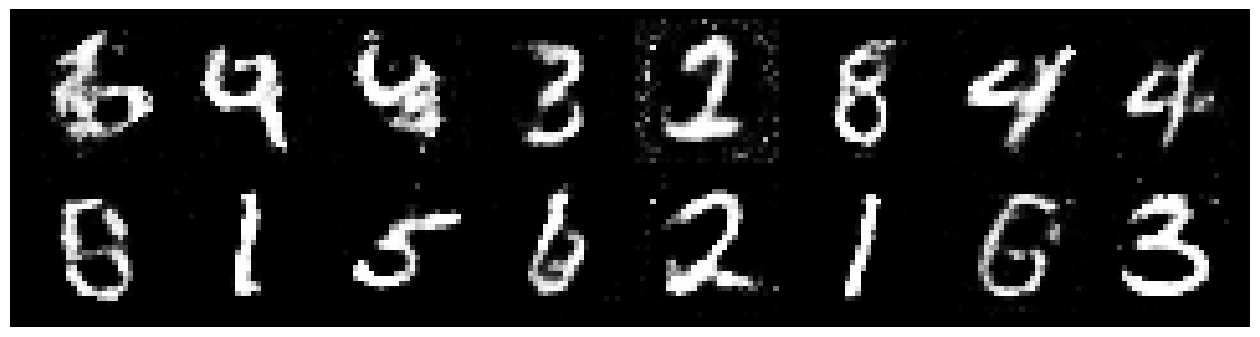

Epoch: [145/200], Batch Num: [599/600]
Discriminator Loss: 1.2582, Generator Loss: 0.8518
D(x): 0.5681, D(G(z)): 0.4553


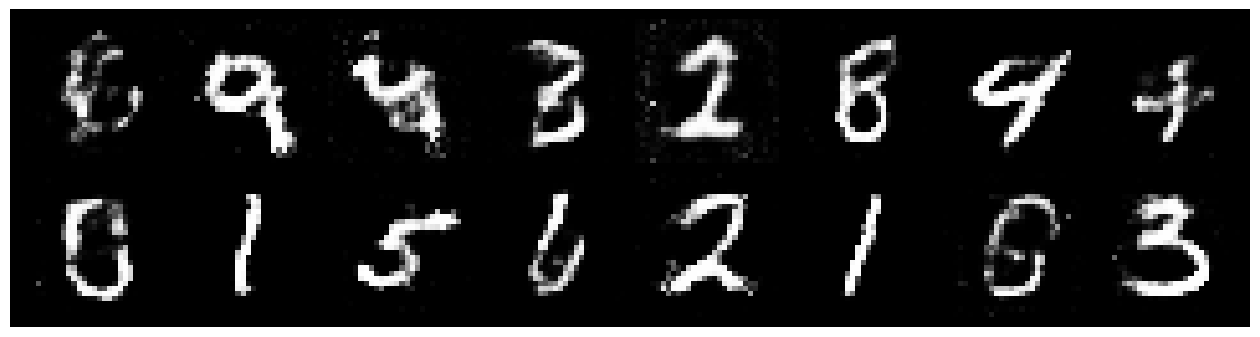

Epoch: [146/200], Batch Num: [599/600]
Discriminator Loss: 1.2577, Generator Loss: 0.9249
D(x): 0.5436, D(G(z)): 0.4320


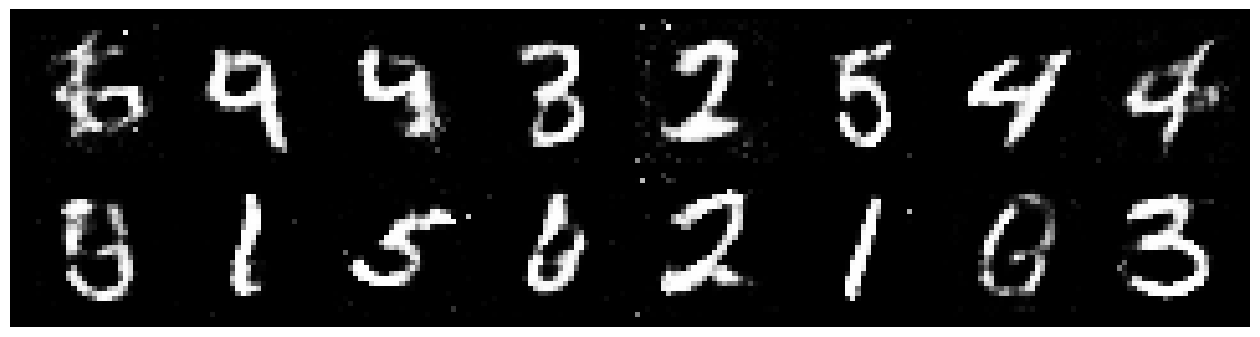

Epoch: [147/200], Batch Num: [599/600]
Discriminator Loss: 1.3535, Generator Loss: 0.7911
D(x): 0.5373, D(G(z)): 0.4716


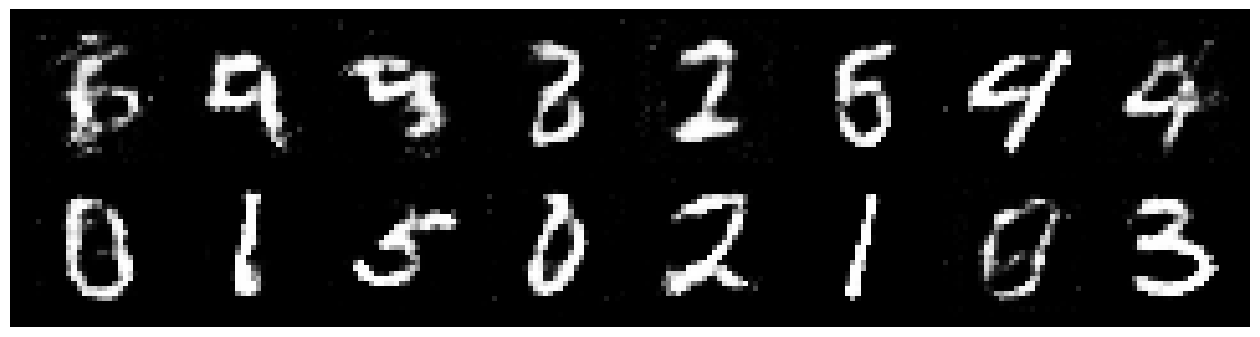

Epoch: [148/200], Batch Num: [599/600]
Discriminator Loss: 1.2766, Generator Loss: 0.8417
D(x): 0.5321, D(G(z)): 0.4418


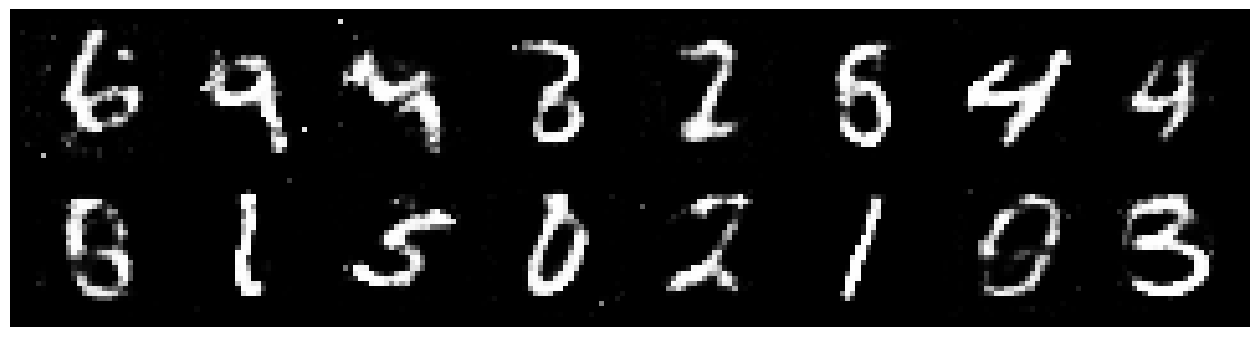

Epoch: [149/200], Batch Num: [599/600]
Discriminator Loss: 1.2120, Generator Loss: 1.0108
D(x): 0.5498, D(G(z)): 0.3951


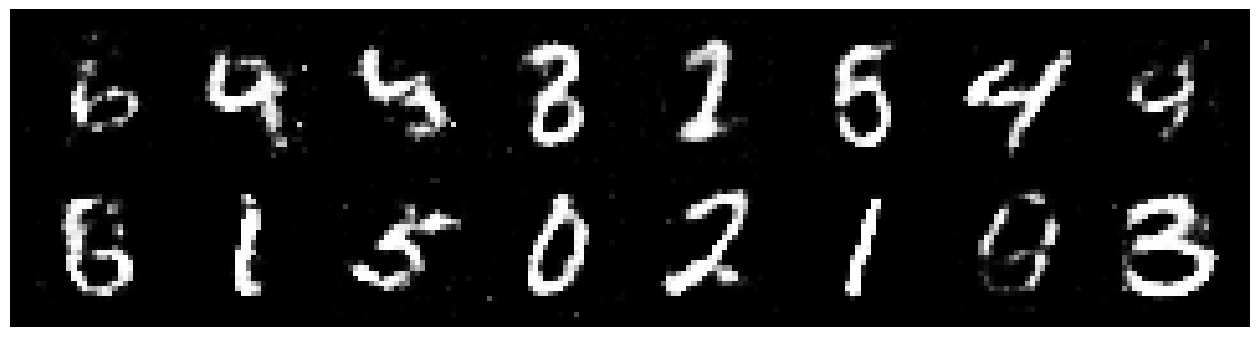

Epoch: [150/200], Batch Num: [599/600]
Discriminator Loss: 1.3327, Generator Loss: 0.7870
D(x): 0.5304, D(G(z)): 0.4696


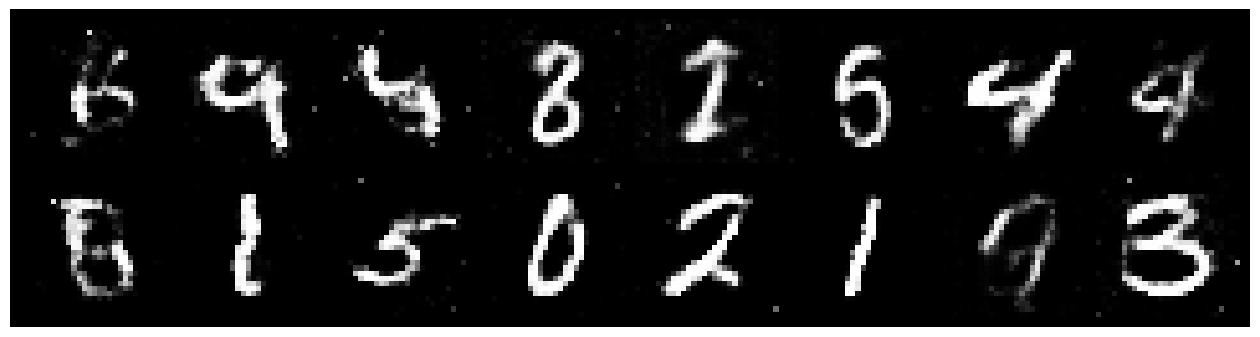

Epoch: [151/200], Batch Num: [599/600]
Discriminator Loss: 1.3088, Generator Loss: 0.9155
D(x): 0.5209, D(G(z)): 0.4295


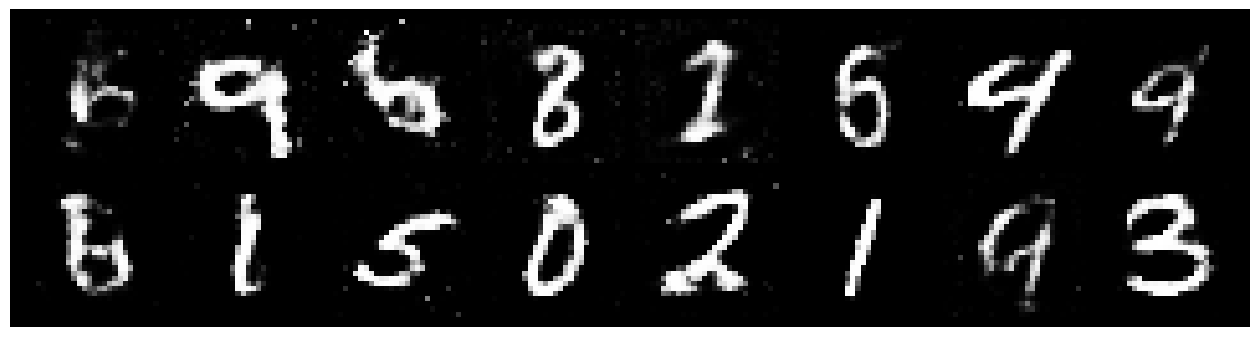

Epoch: [152/200], Batch Num: [599/600]
Discriminator Loss: 1.2786, Generator Loss: 0.8501
D(x): 0.5315, D(G(z)): 0.4328


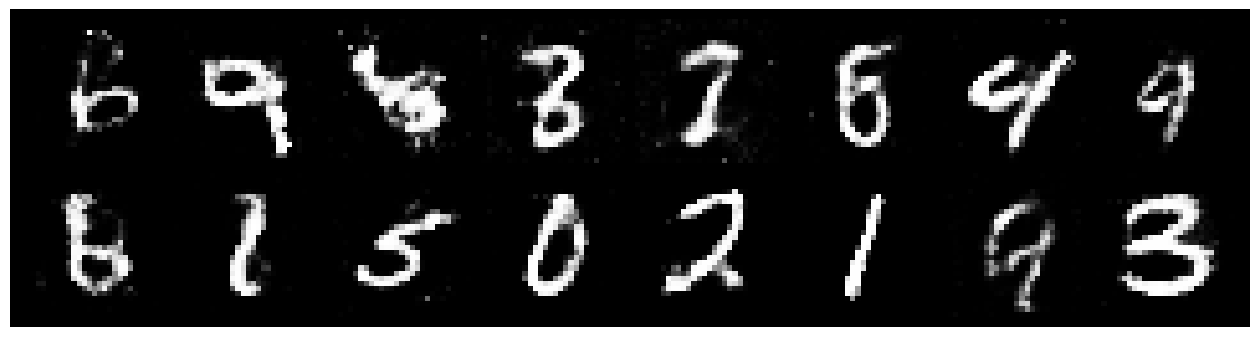

Epoch: [153/200], Batch Num: [599/600]
Discriminator Loss: 1.3192, Generator Loss: 0.8855
D(x): 0.5255, D(G(z)): 0.4474


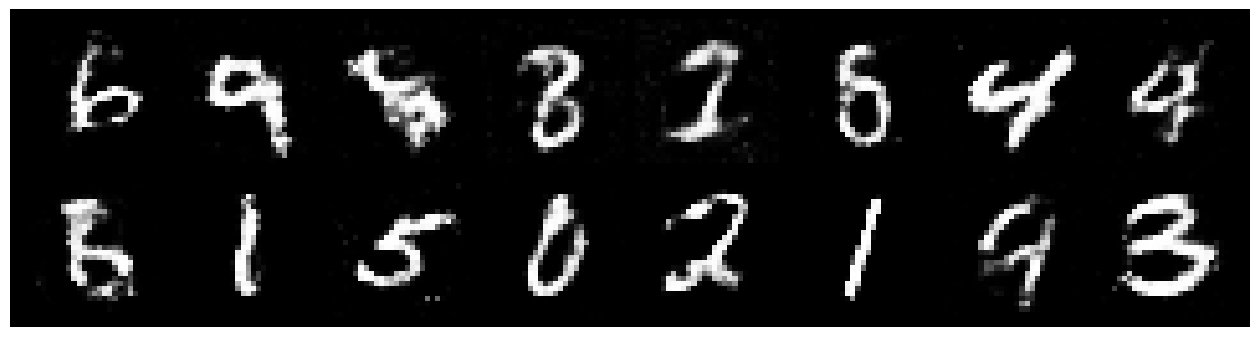

Epoch: [154/200], Batch Num: [599/600]
Discriminator Loss: 1.2752, Generator Loss: 0.8245
D(x): 0.5899, D(G(z)): 0.4931


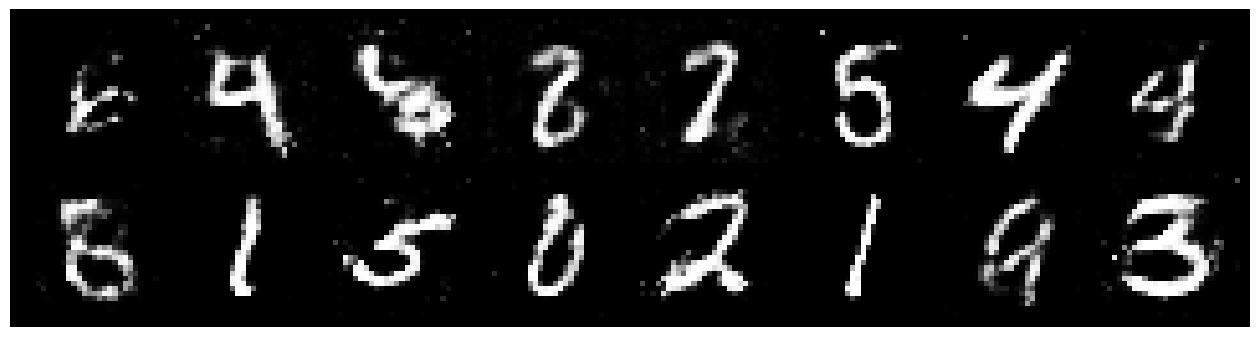

Epoch: [155/200], Batch Num: [599/600]
Discriminator Loss: 1.2957, Generator Loss: 0.9186
D(x): 0.5511, D(G(z)): 0.4520


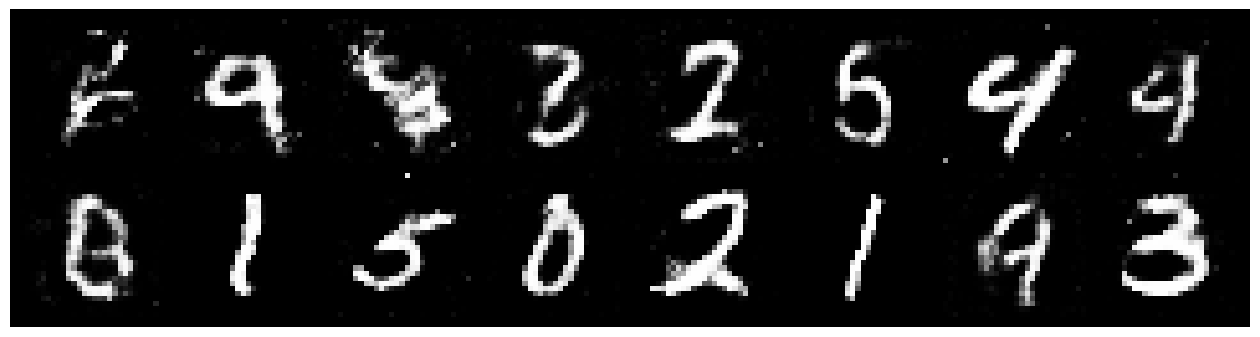

Epoch: [156/200], Batch Num: [599/600]
Discriminator Loss: 1.2752, Generator Loss: 0.9114
D(x): 0.5280, D(G(z)): 0.4195


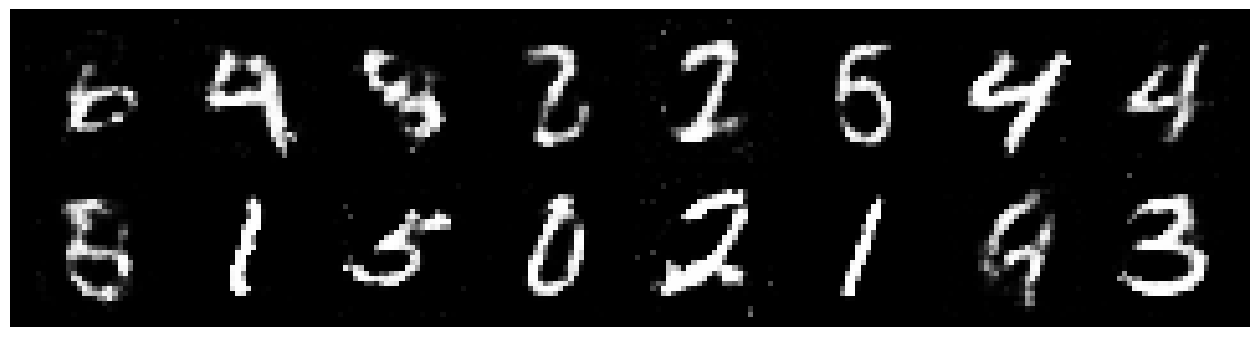

Epoch: [157/200], Batch Num: [599/600]
Discriminator Loss: 1.2987, Generator Loss: 0.8373
D(x): 0.5300, D(G(z)): 0.4514


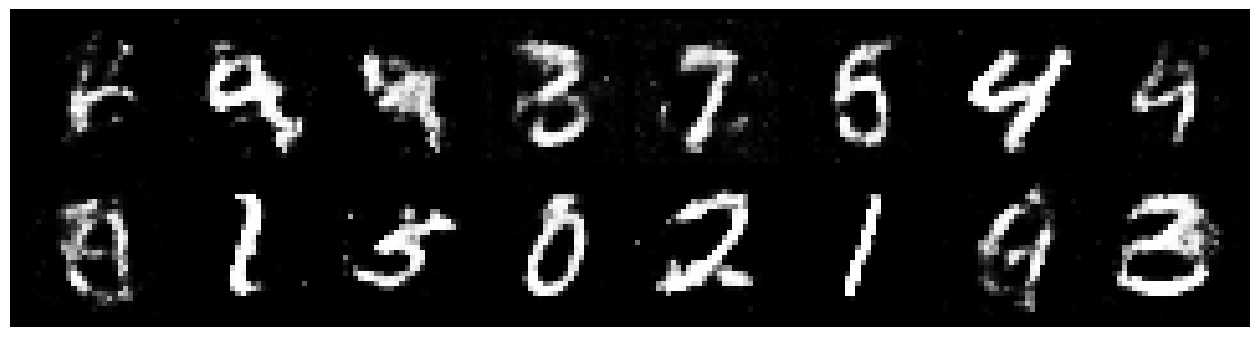

Epoch: [158/200], Batch Num: [599/600]
Discriminator Loss: 1.3988, Generator Loss: 0.7993
D(x): 0.5176, D(G(z)): 0.4846


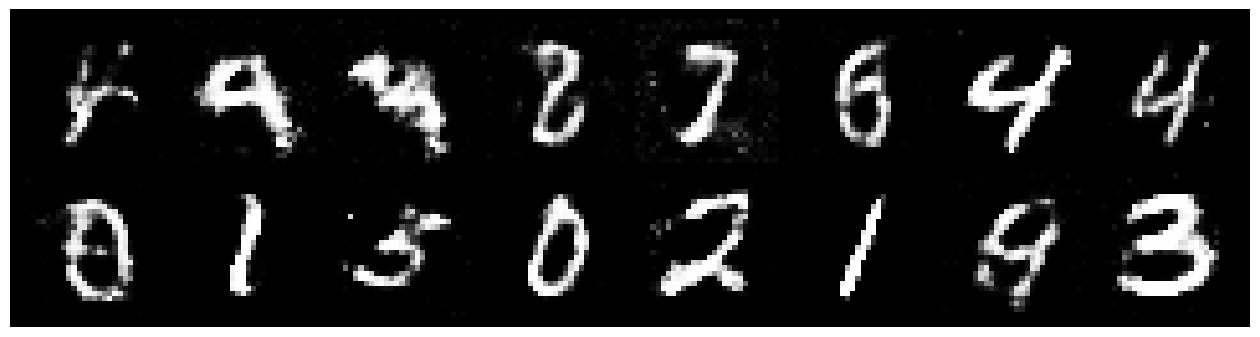

Epoch: [159/200], Batch Num: [599/600]
Discriminator Loss: 1.3486, Generator Loss: 0.8650
D(x): 0.5189, D(G(z)): 0.4344


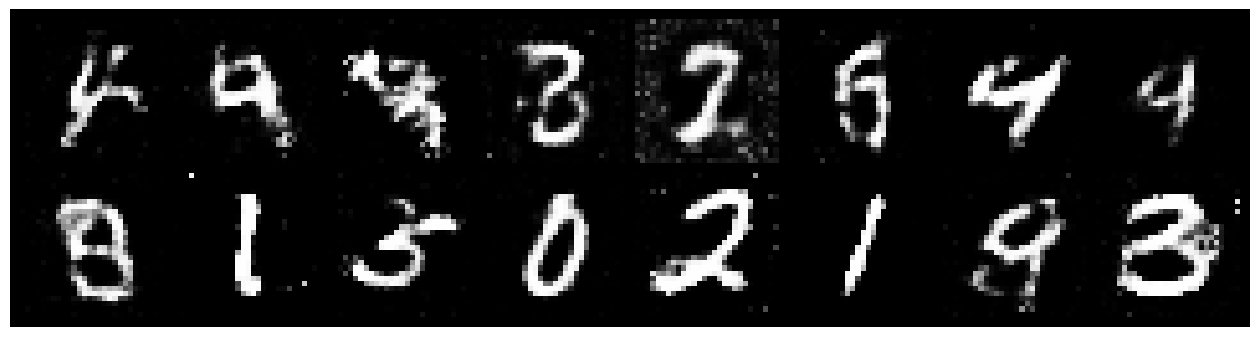

Epoch: [160/200], Batch Num: [599/600]
Discriminator Loss: 1.2312, Generator Loss: 0.8821
D(x): 0.5718, D(G(z)): 0.4459


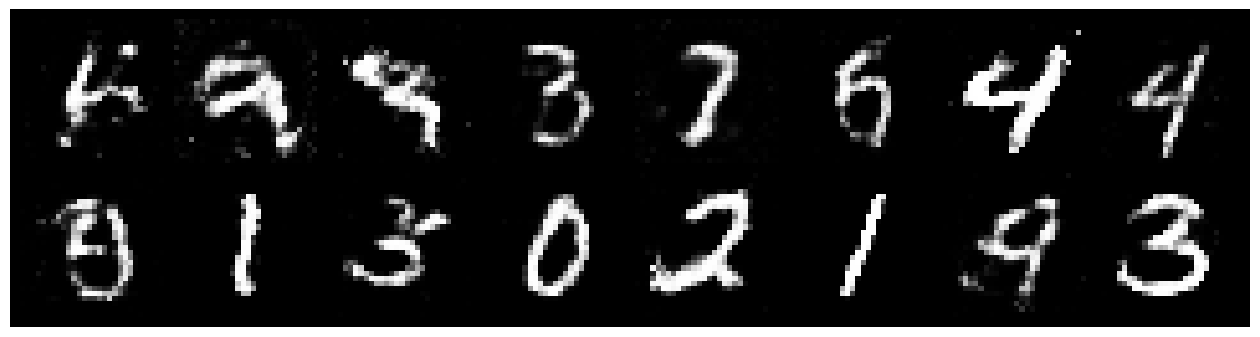

Epoch: [161/200], Batch Num: [599/600]
Discriminator Loss: 1.3209, Generator Loss: 0.7782
D(x): 0.5647, D(G(z)): 0.4944


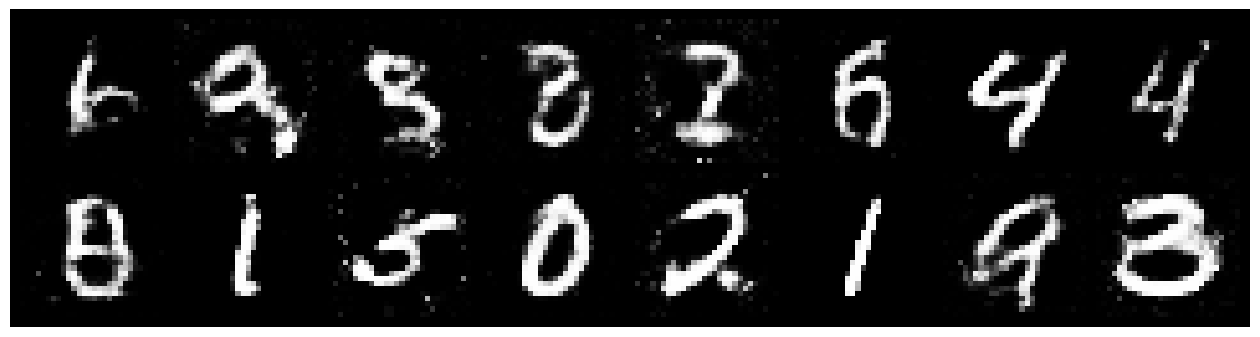

Epoch: [162/200], Batch Num: [599/600]
Discriminator Loss: 1.3284, Generator Loss: 0.8459
D(x): 0.5634, D(G(z)): 0.4780


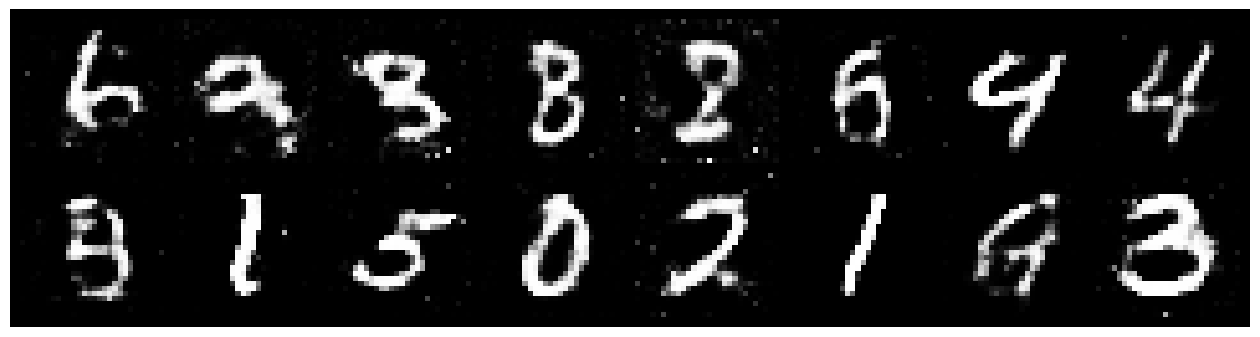

Epoch: [163/200], Batch Num: [599/600]
Discriminator Loss: 1.3339, Generator Loss: 0.7905
D(x): 0.5435, D(G(z)): 0.4779


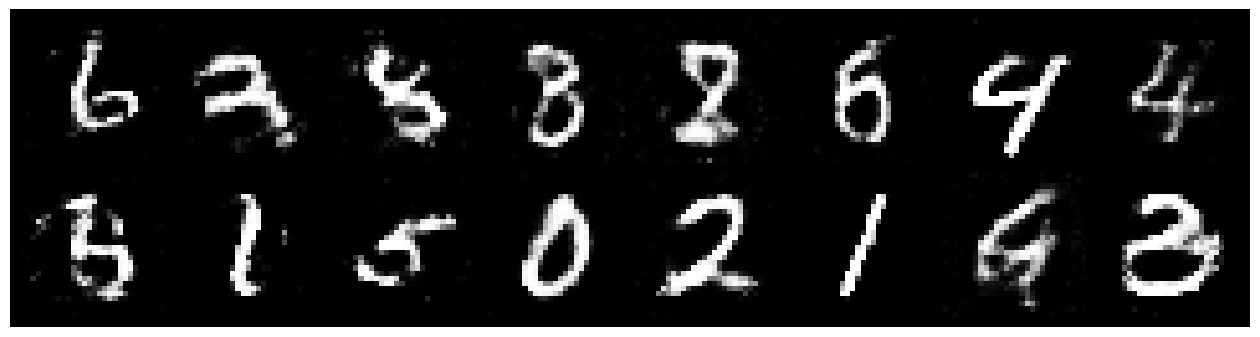

Epoch: [164/200], Batch Num: [599/600]
Discriminator Loss: 1.3393, Generator Loss: 0.7248
D(x): 0.5930, D(G(z)): 0.5210


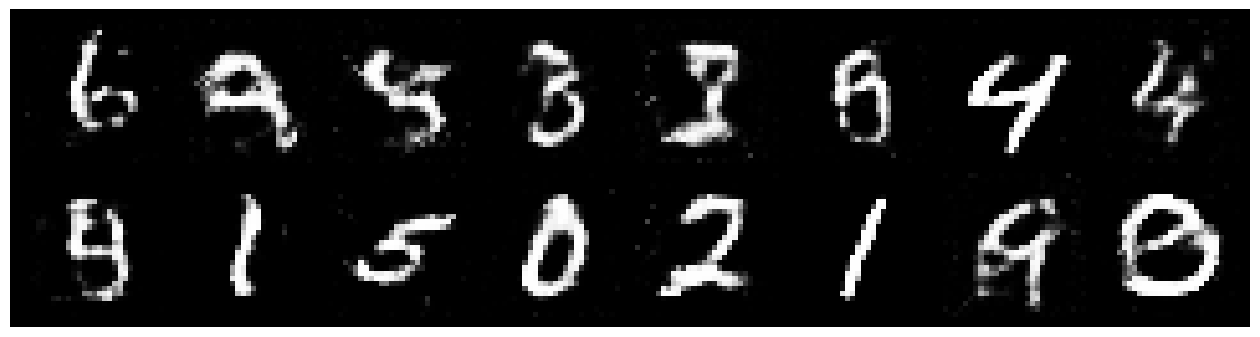

Epoch: [165/200], Batch Num: [599/600]
Discriminator Loss: 1.3521, Generator Loss: 0.9679
D(x): 0.5637, D(G(z)): 0.4879


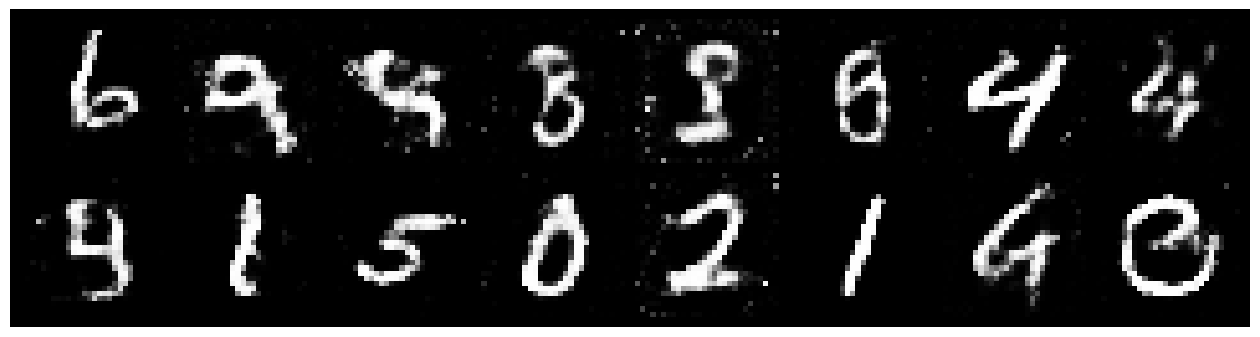

Epoch: [166/200], Batch Num: [599/600]
Discriminator Loss: 1.3715, Generator Loss: 0.8218
D(x): 0.5301, D(G(z)): 0.4709


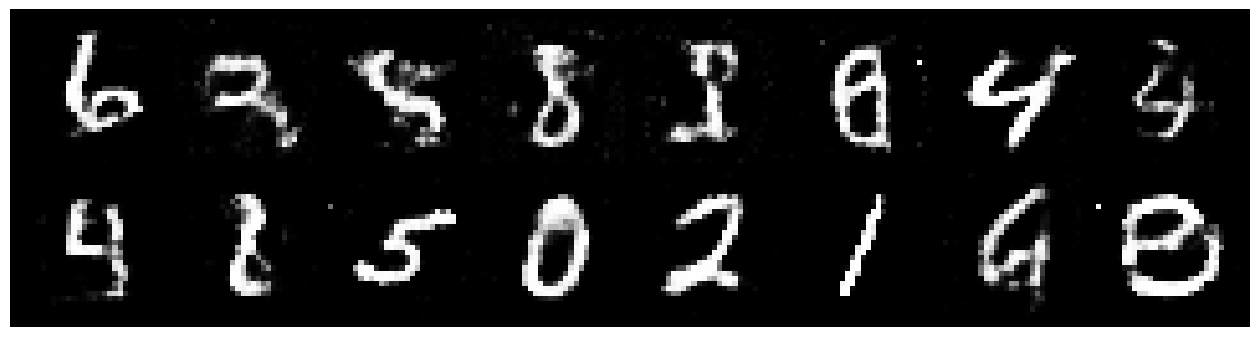

Epoch: [167/200], Batch Num: [599/600]
Discriminator Loss: 1.2659, Generator Loss: 0.8361
D(x): 0.5570, D(G(z)): 0.4596


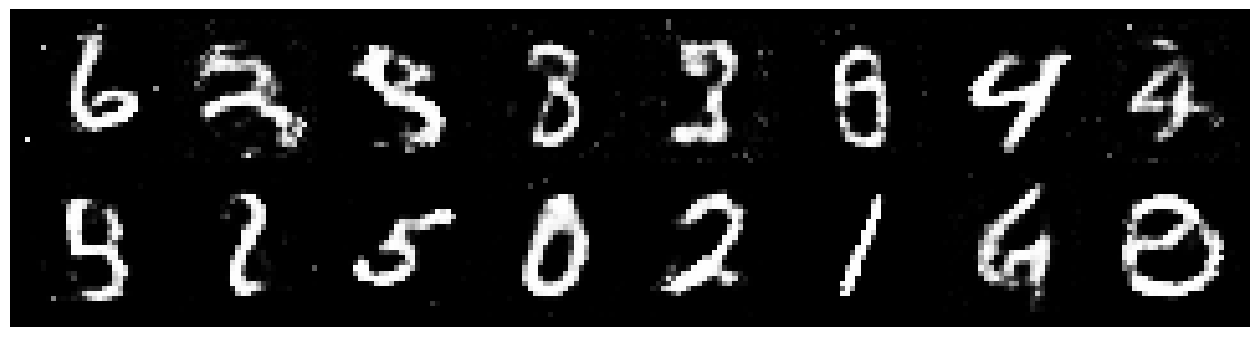

Epoch: [168/200], Batch Num: [599/600]
Discriminator Loss: 1.3148, Generator Loss: 0.8505
D(x): 0.5410, D(G(z)): 0.4661


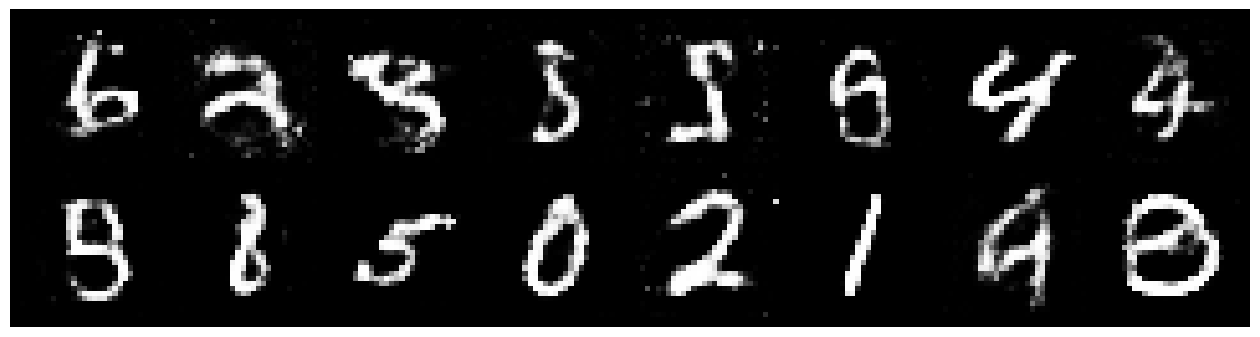

Epoch: [169/200], Batch Num: [599/600]
Discriminator Loss: 1.3670, Generator Loss: 0.9257
D(x): 0.5575, D(G(z)): 0.4727


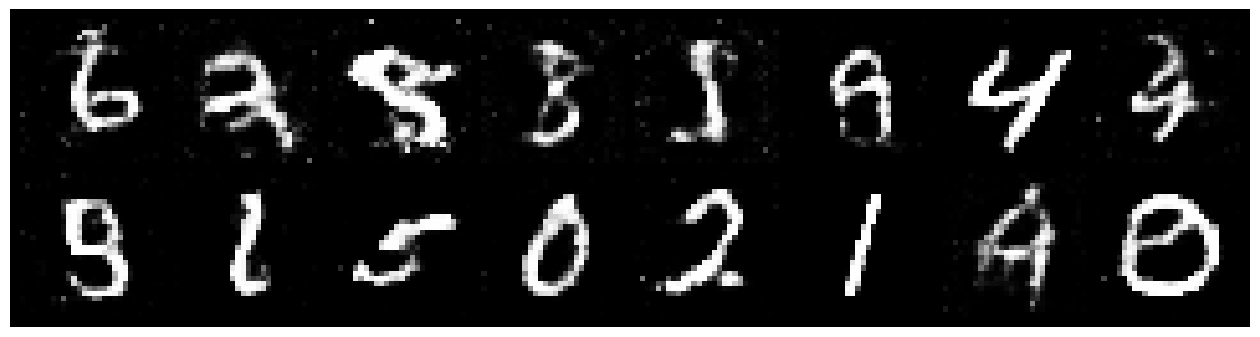

Epoch: [170/200], Batch Num: [599/600]
Discriminator Loss: 1.3621, Generator Loss: 0.8404
D(x): 0.5178, D(G(z)): 0.4479


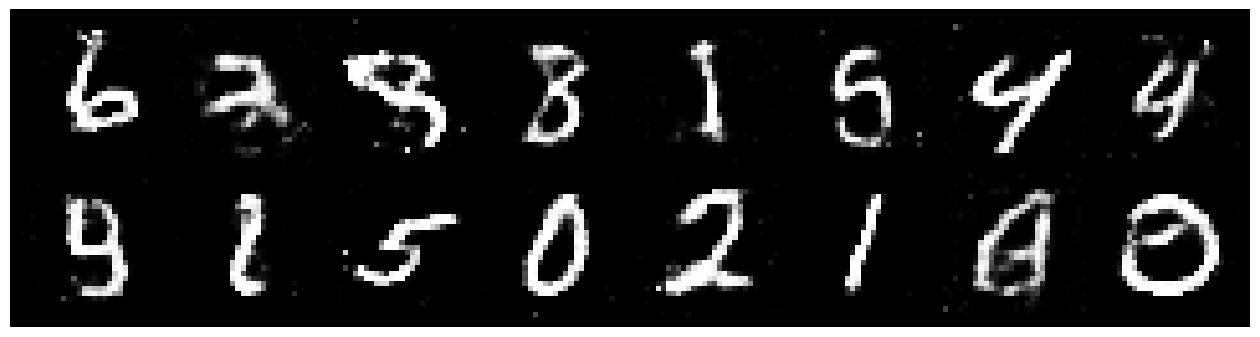

Epoch: [171/200], Batch Num: [599/600]
Discriminator Loss: 1.3038, Generator Loss: 0.9217
D(x): 0.5723, D(G(z)): 0.4623


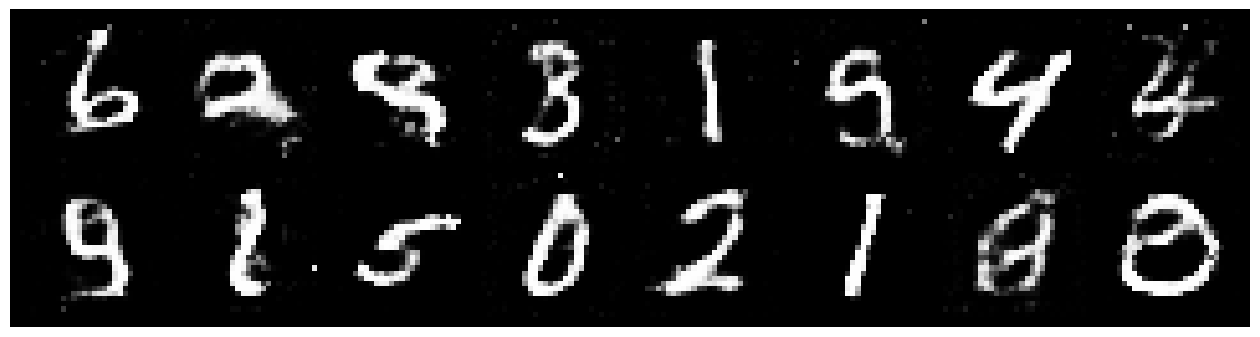

Epoch: [172/200], Batch Num: [599/600]
Discriminator Loss: 1.1989, Generator Loss: 0.8228
D(x): 0.5677, D(G(z)): 0.4149


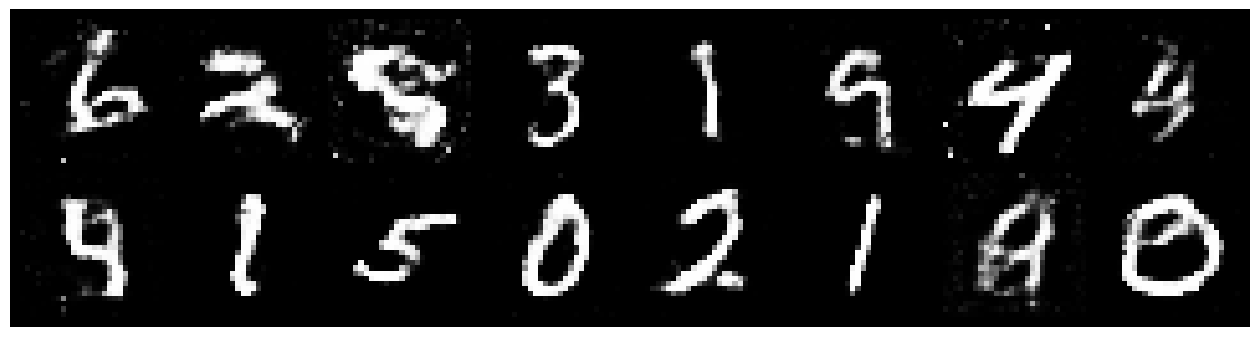

Epoch: [173/200], Batch Num: [599/600]
Discriminator Loss: 1.3459, Generator Loss: 0.8180
D(x): 0.5180, D(G(z)): 0.4619


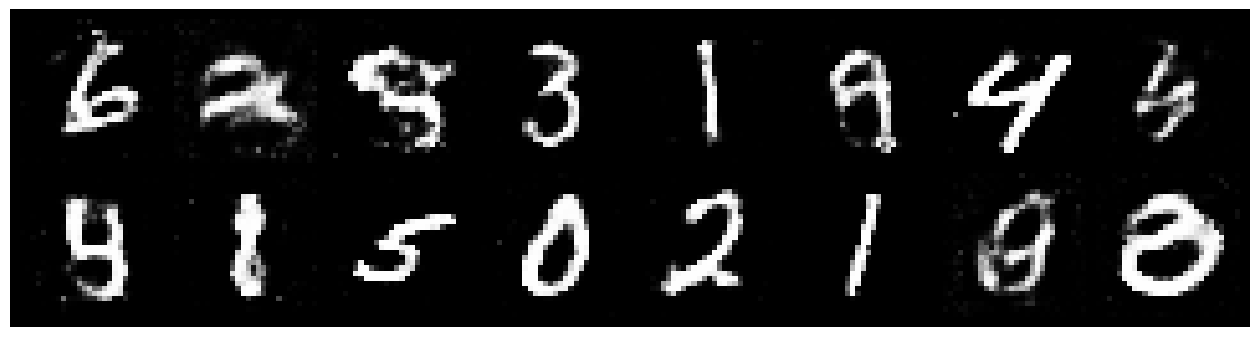

Epoch: [174/200], Batch Num: [599/600]
Discriminator Loss: 1.3093, Generator Loss: 0.8728
D(x): 0.5249, D(G(z)): 0.4235


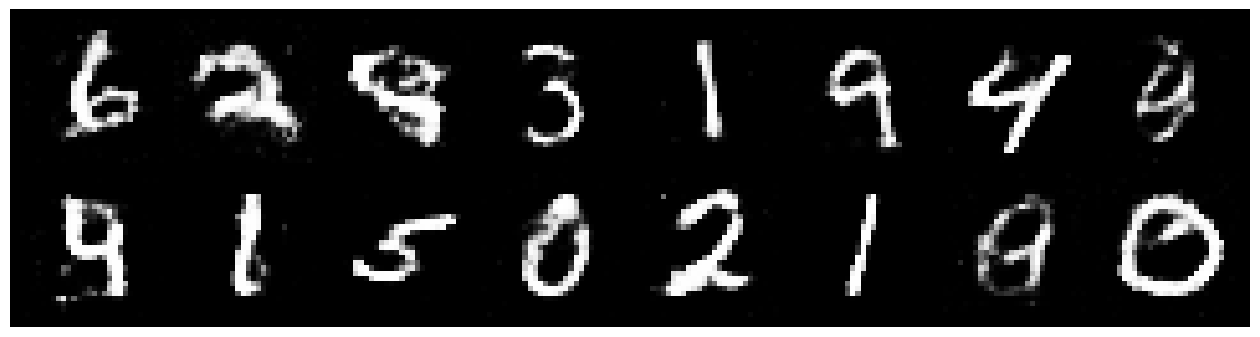

Epoch: [175/200], Batch Num: [599/600]
Discriminator Loss: 1.2937, Generator Loss: 0.8814
D(x): 0.5693, D(G(z)): 0.4708


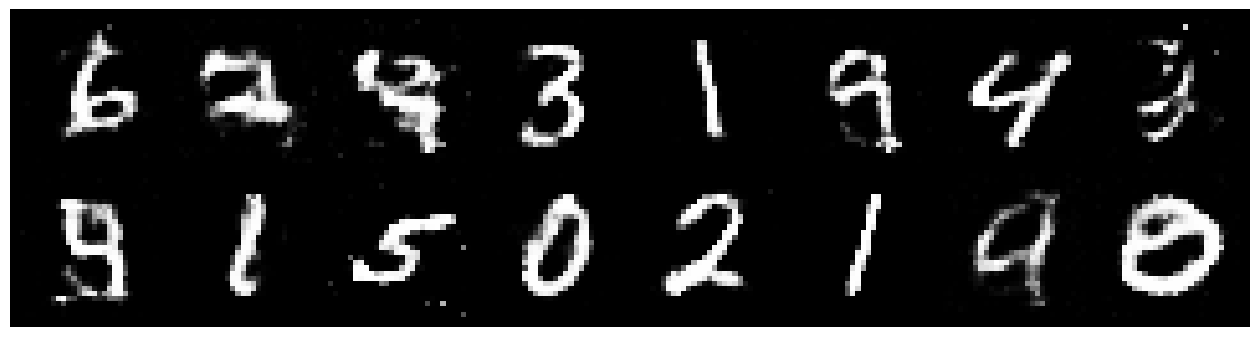

Epoch: [176/200], Batch Num: [599/600]
Discriminator Loss: 1.3253, Generator Loss: 0.8453
D(x): 0.5350, D(G(z)): 0.4648


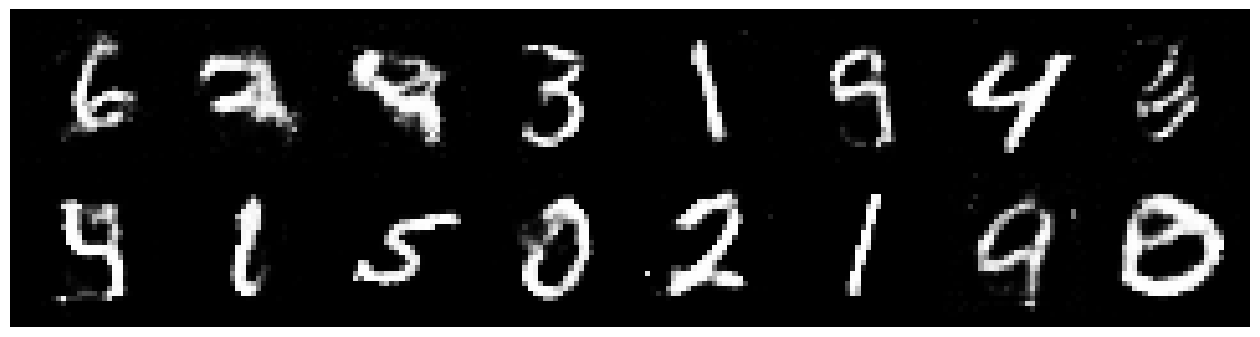

Epoch: [177/200], Batch Num: [599/600]
Discriminator Loss: 1.2472, Generator Loss: 0.9427
D(x): 0.5380, D(G(z)): 0.4233


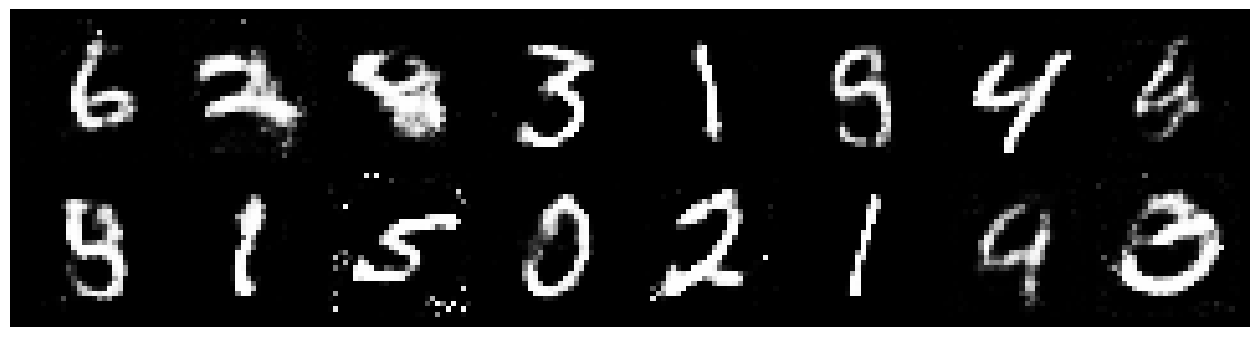

Epoch: [178/200], Batch Num: [599/600]
Discriminator Loss: 1.2775, Generator Loss: 0.9991
D(x): 0.5227, D(G(z)): 0.4262


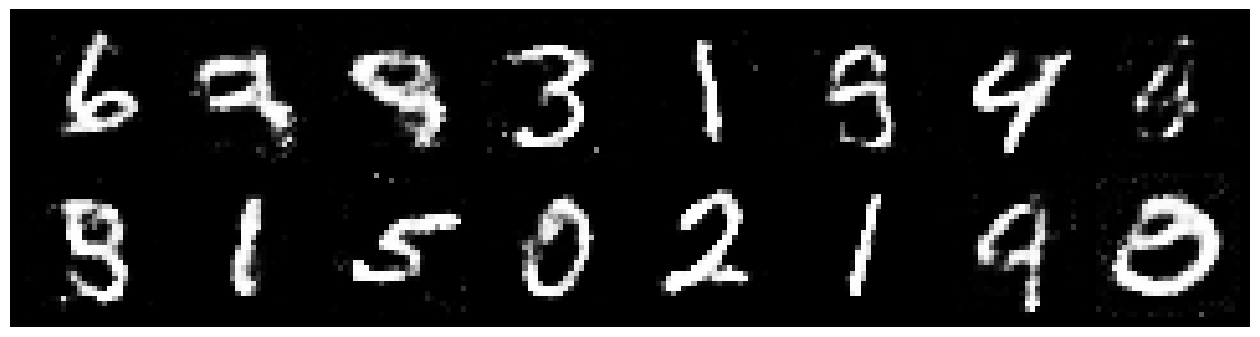

Epoch: [179/200], Batch Num: [599/600]
Discriminator Loss: 1.3256, Generator Loss: 0.9083
D(x): 0.5563, D(G(z)): 0.4644


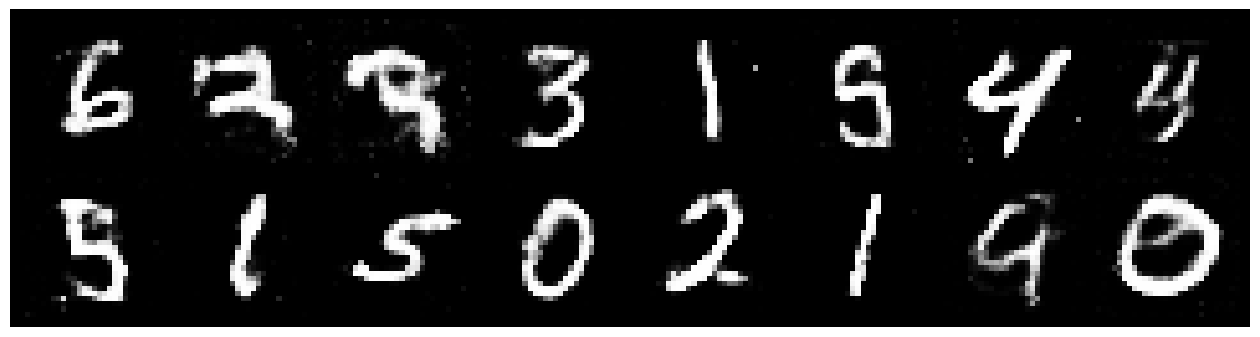

Epoch: [180/200], Batch Num: [599/600]
Discriminator Loss: 1.1858, Generator Loss: 0.8230
D(x): 0.6085, D(G(z)): 0.4505


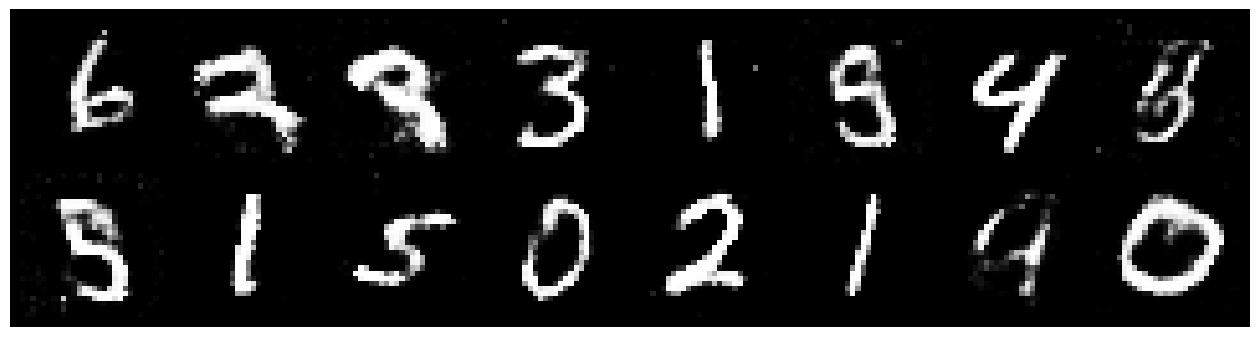

Epoch: [181/200], Batch Num: [599/600]
Discriminator Loss: 1.3055, Generator Loss: 0.9262
D(x): 0.5353, D(G(z)): 0.4585


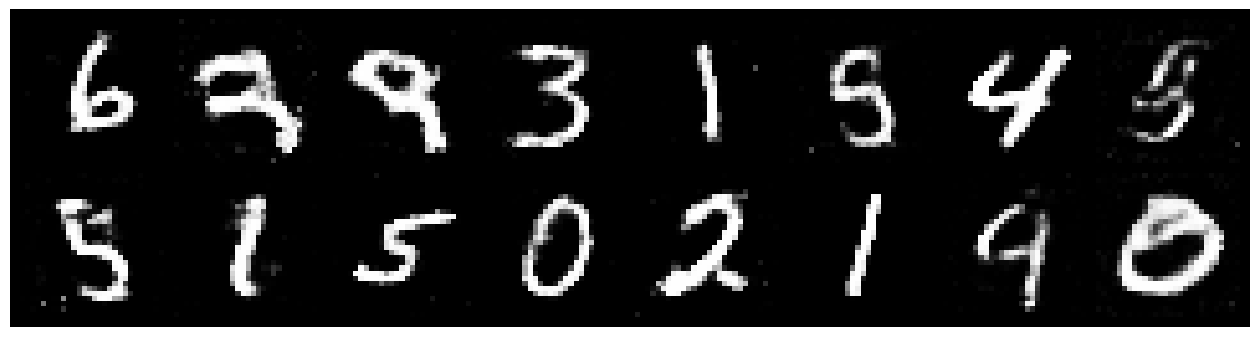

Epoch: [182/200], Batch Num: [599/600]
Discriminator Loss: 1.3273, Generator Loss: 0.9220
D(x): 0.5626, D(G(z)): 0.4843


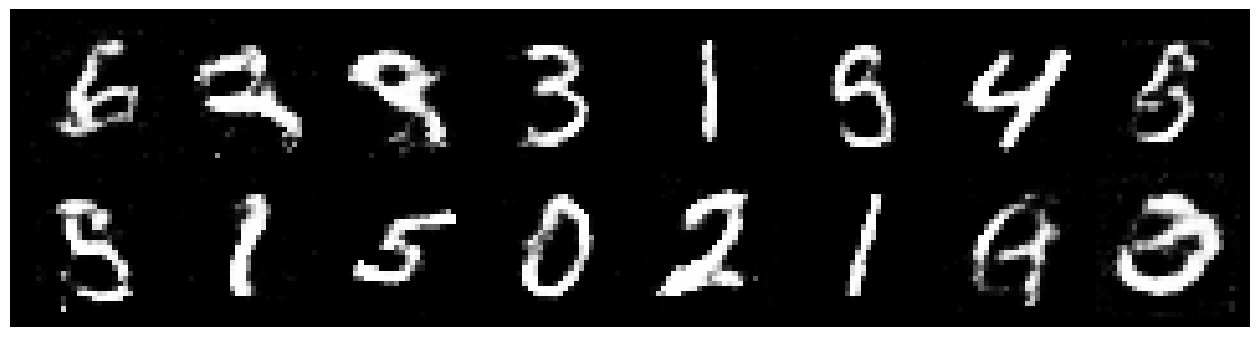

Epoch: [183/200], Batch Num: [599/600]
Discriminator Loss: 1.3072, Generator Loss: 0.8496
D(x): 0.5446, D(G(z)): 0.4522


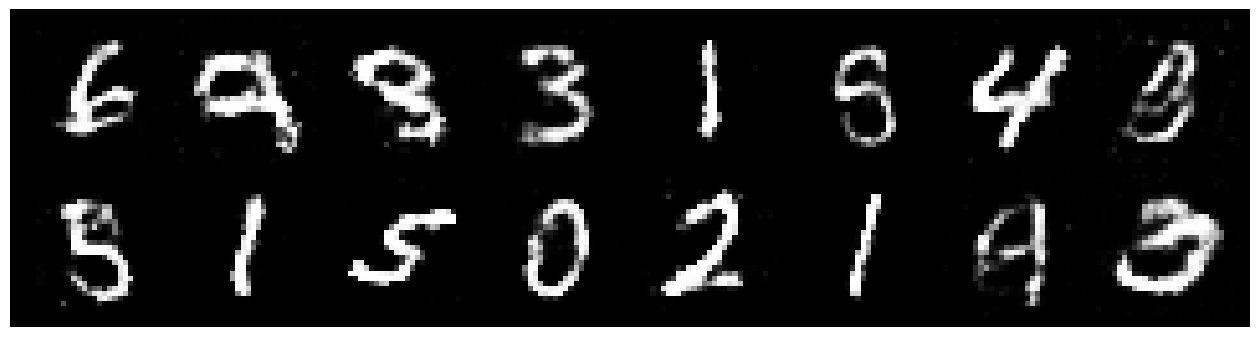

Epoch: [184/200], Batch Num: [599/600]
Discriminator Loss: 1.3337, Generator Loss: 0.9402
D(x): 0.5082, D(G(z)): 0.4093


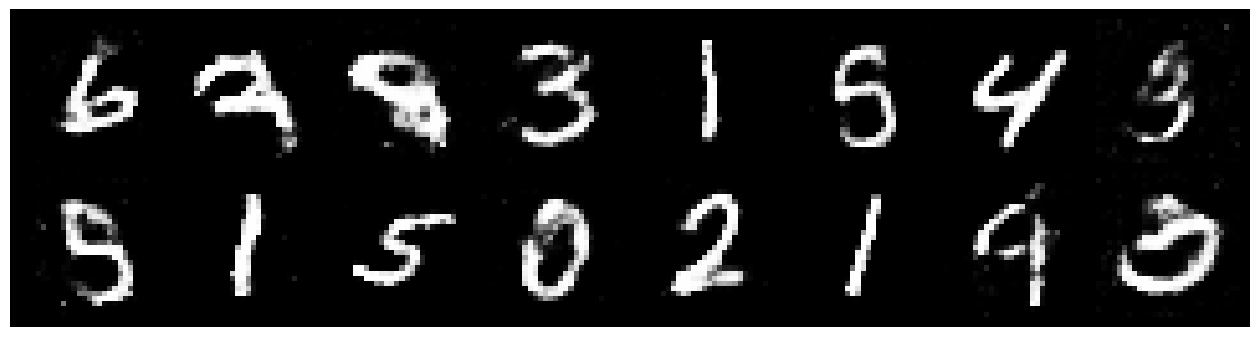

Epoch: [185/200], Batch Num: [599/600]
Discriminator Loss: 1.3337, Generator Loss: 0.6939
D(x): 0.5905, D(G(z)): 0.4982


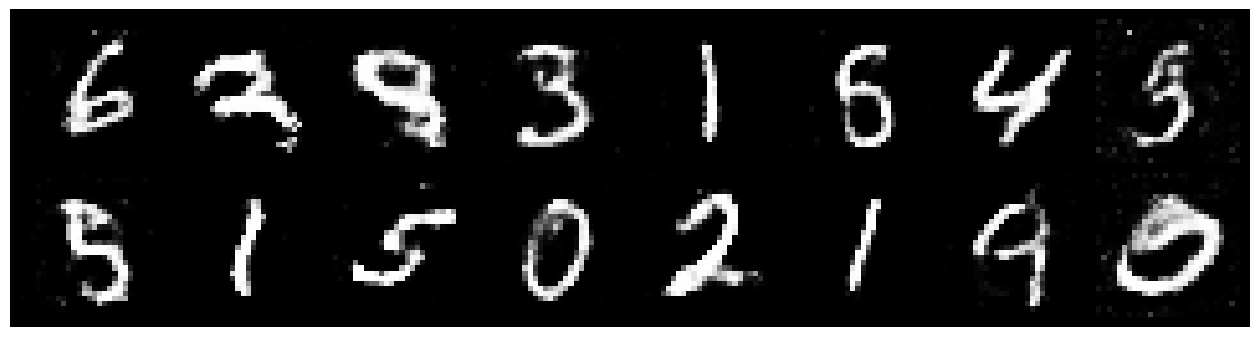

Epoch: [186/200], Batch Num: [599/600]
Discriminator Loss: 1.2690, Generator Loss: 0.9446
D(x): 0.5373, D(G(z)): 0.4321


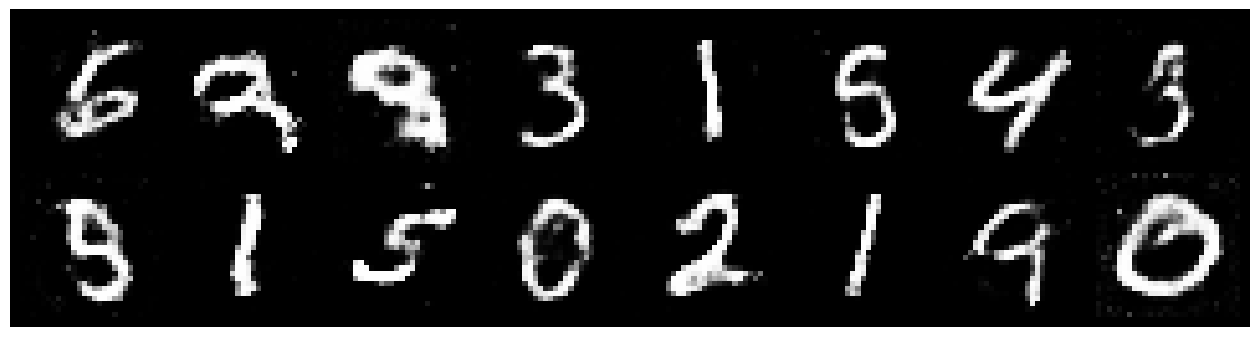

Epoch: [187/200], Batch Num: [599/600]
Discriminator Loss: 1.2490, Generator Loss: 0.8441
D(x): 0.5891, D(G(z)): 0.4631


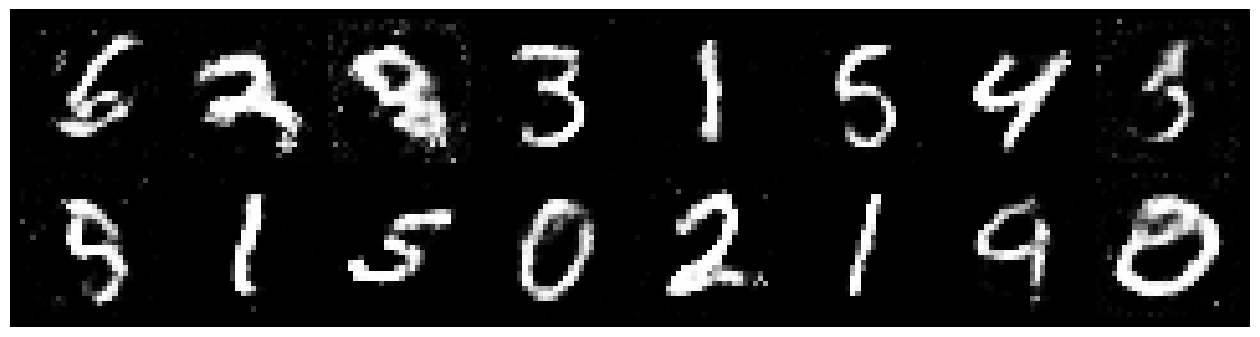

Epoch: [188/200], Batch Num: [599/600]
Discriminator Loss: 1.3127, Generator Loss: 0.8078
D(x): 0.5793, D(G(z)): 0.4886


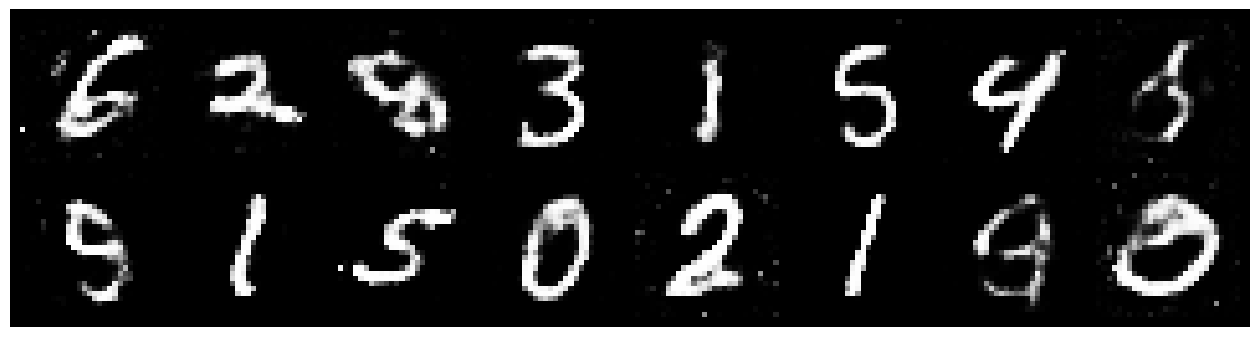

Epoch: [189/200], Batch Num: [599/600]
Discriminator Loss: 1.1753, Generator Loss: 1.0234
D(x): 0.5797, D(G(z)): 0.4111


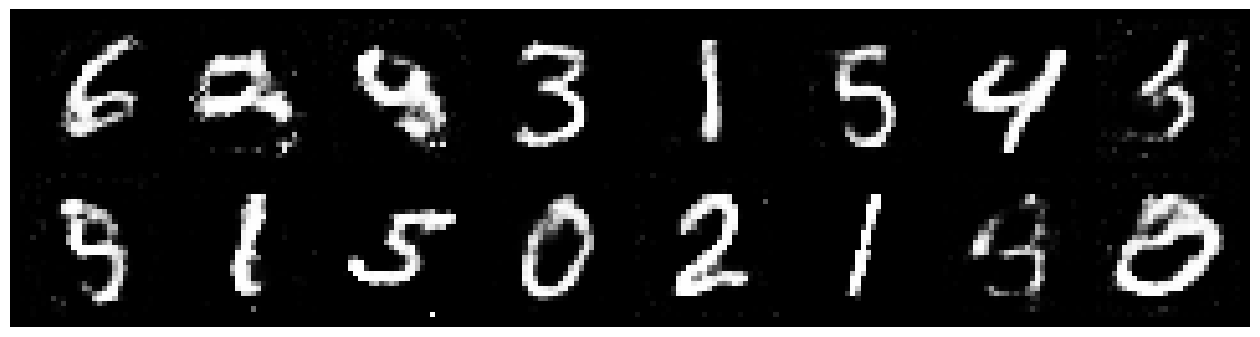

Epoch: [190/200], Batch Num: [599/600]
Discriminator Loss: 1.2954, Generator Loss: 0.9056
D(x): 0.5402, D(G(z)): 0.4422


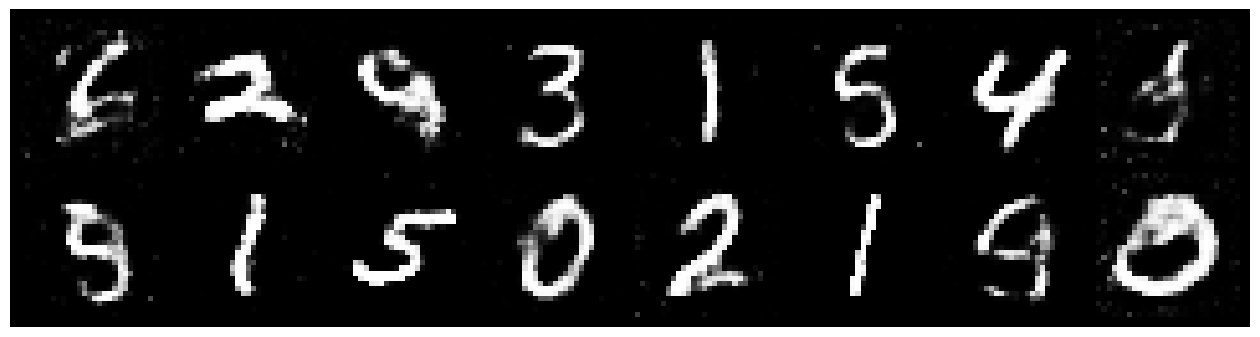

Epoch: [191/200], Batch Num: [599/600]
Discriminator Loss: 1.2221, Generator Loss: 0.9564
D(x): 0.5621, D(G(z)): 0.4189


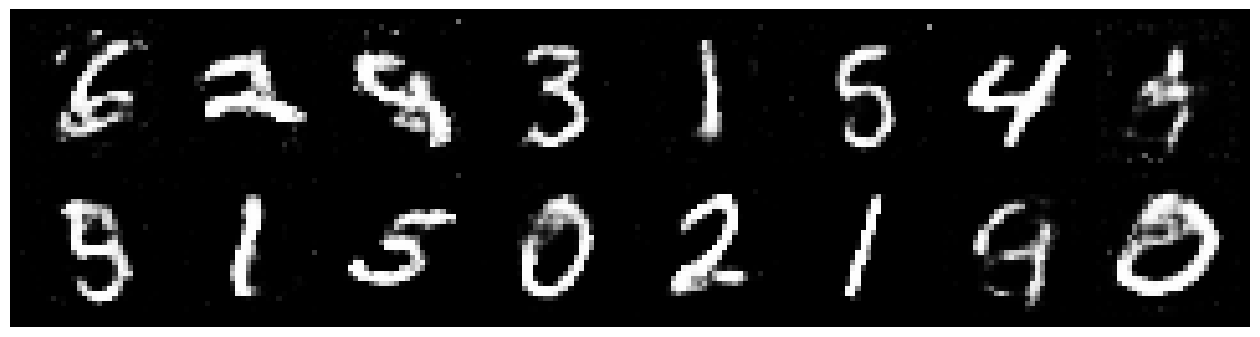

Epoch: [192/200], Batch Num: [599/600]
Discriminator Loss: 1.2656, Generator Loss: 0.8462
D(x): 0.5819, D(G(z)): 0.4614


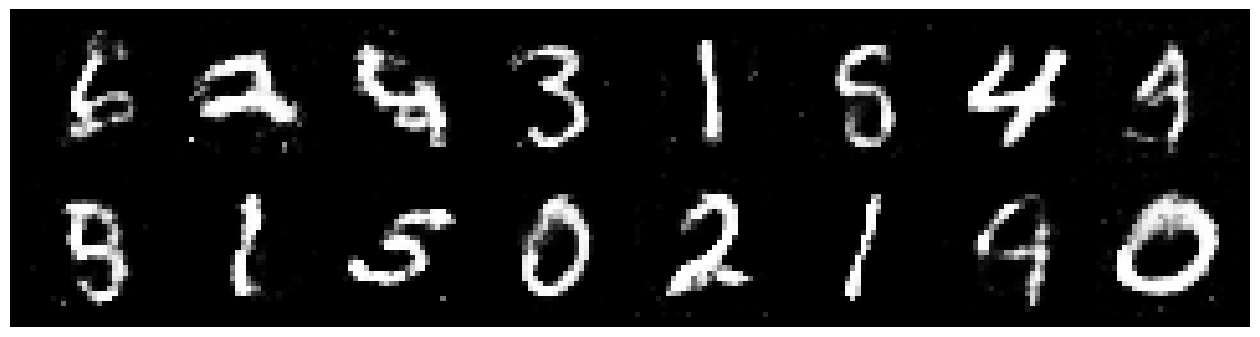

Epoch: [193/200], Batch Num: [599/600]
Discriminator Loss: 1.1376, Generator Loss: 0.9734
D(x): 0.5811, D(G(z)): 0.4034


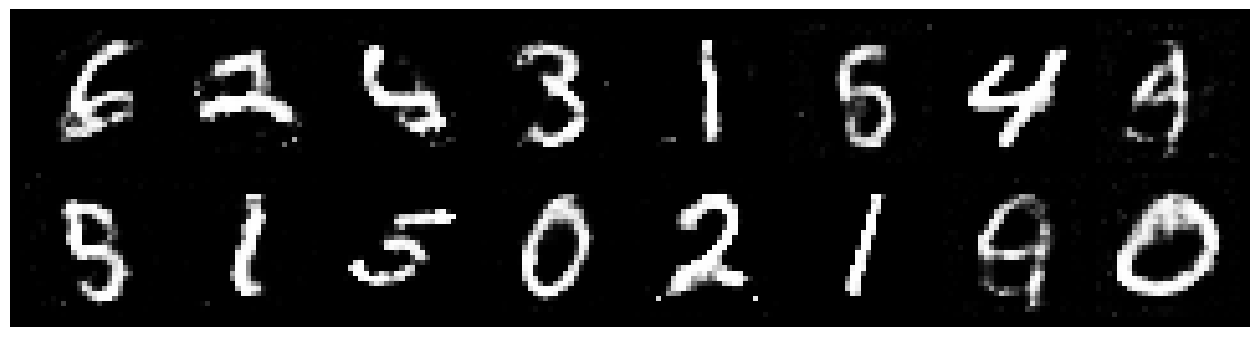

Epoch: [194/200], Batch Num: [599/600]
Discriminator Loss: 1.2893, Generator Loss: 0.8721
D(x): 0.5699, D(G(z)): 0.4609


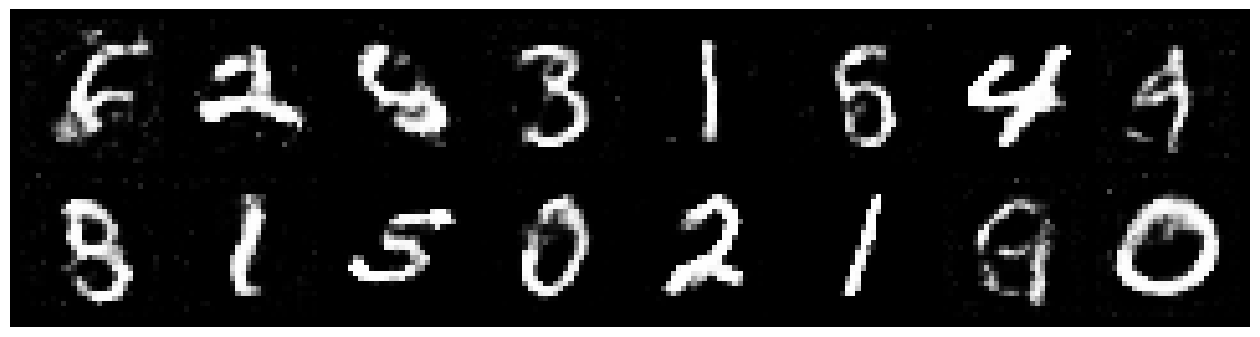

Epoch: [195/200], Batch Num: [599/600]
Discriminator Loss: 1.1237, Generator Loss: 1.0947
D(x): 0.6004, D(G(z)): 0.4020


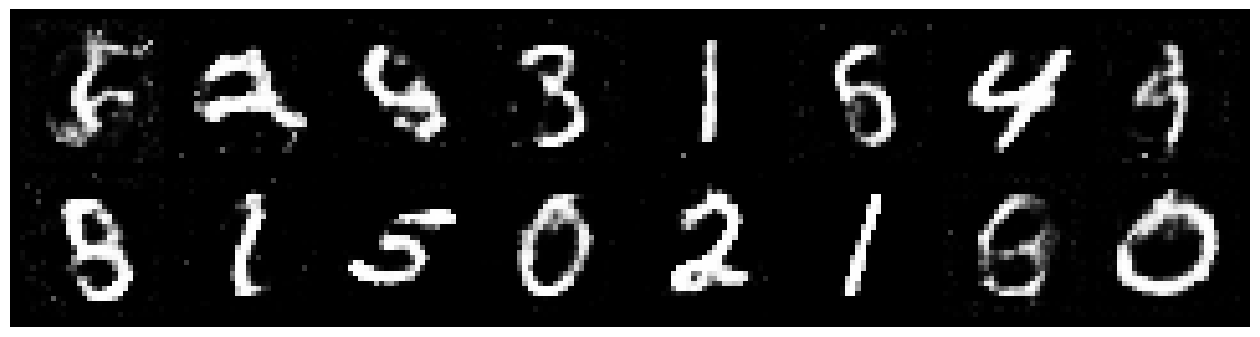

Epoch: [196/200], Batch Num: [599/600]
Discriminator Loss: 1.3546, Generator Loss: 0.8093
D(x): 0.5404, D(G(z)): 0.4648


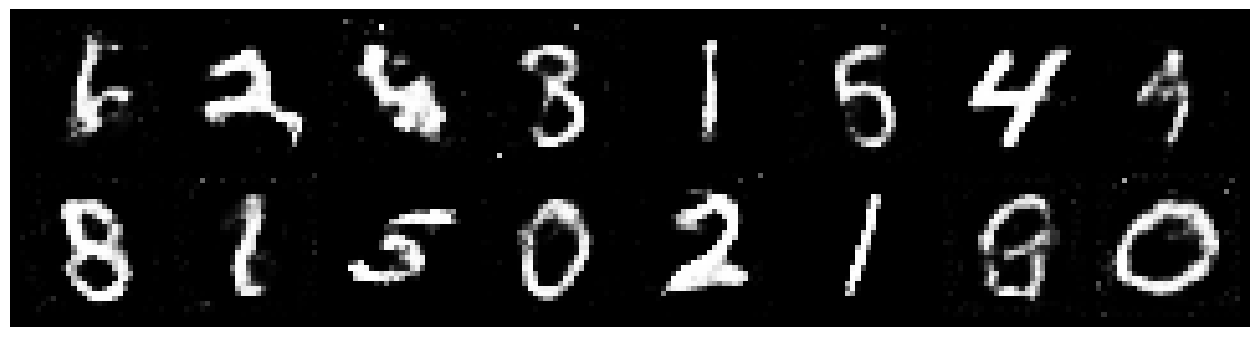

Epoch: [197/200], Batch Num: [599/600]
Discriminator Loss: 1.2386, Generator Loss: 0.9812
D(x): 0.5981, D(G(z)): 0.4502


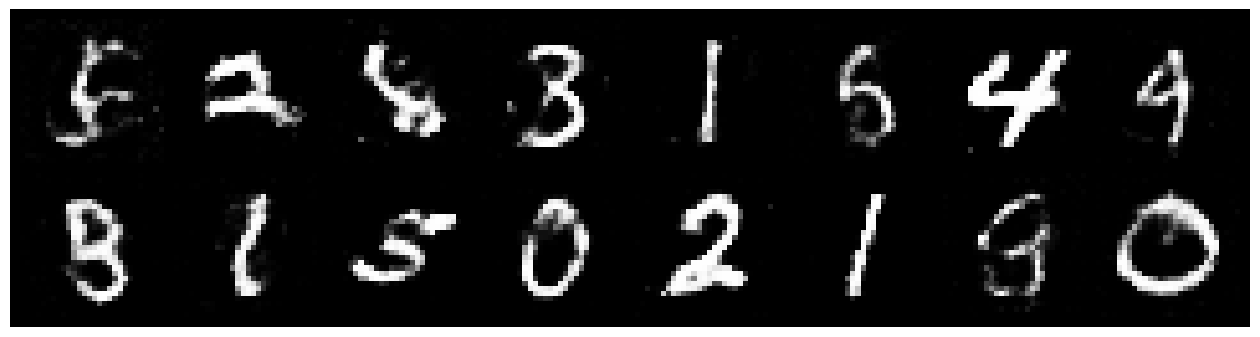

Epoch: [198/200], Batch Num: [599/600]
Discriminator Loss: 1.2358, Generator Loss: 0.9134
D(x): 0.5444, D(G(z)): 0.4291


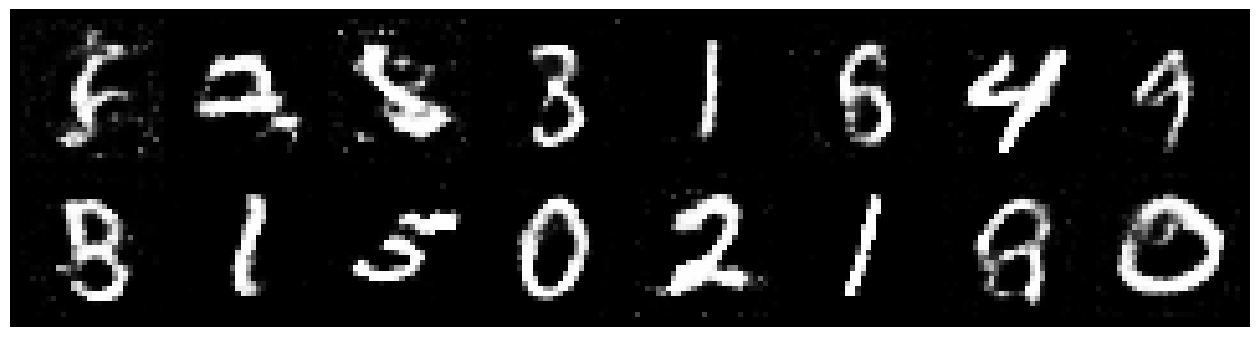

Epoch: [199/200], Batch Num: [599/600]
Discriminator Loss: 1.2868, Generator Loss: 0.7005
D(x): 0.5650, D(G(z)): 0.4635


In [59]:
# Create logger instance
logger = Logger(model_name='VGAN', data_name='MNIST')
# Total number of epochs to train
num_epochs = 200
for epoch in range(num_epochs):
    for n_batch, (real_batch,_) in enumerate(data_loader):
        N = real_batch.size(0)
        # 1. Train Discriminator
        real_data = Variable(images_to_vectors(real_batch))
        # Generate fake data and detach 
        # (so gradients are not calculated for generator)
        fake_data = generator(noise(N)).detach()
        # Train D
        d_error, d_pred_real, d_pred_fake = \
              train_discriminator(d_optimizer, real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        fake_data = generator(noise(N))
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        # Log batch error
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches

    test_images = vectors_to_images(generator(test_noise))
    test_images = test_images.data
    logger.log_images(
        test_images, num_test_samples, 
        epoch, n_batch, num_batches
    );
    # Display status Logs
    logger.display_status(
        epoch, num_epochs, n_batch, num_batches,
        d_error, g_error, d_pred_real, d_pred_fake
    )